# Plot 3D vectors on 3D axes - Simple Stereo Plot Animation

### Robert Cameron
### March 2016

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline
import JSAnimation
from JSAnimation import IPython_display
from matplotlib.animation import FuncAnimation

In [2]:
def Rx(phi):
    return np.array([[1, 0, 0],
                     [0, np.cos(phi), -np.sin(phi)],
                     [0, np.sin(phi), np.cos(phi)]])

def Ry(theta):
    return np.array([[np.cos(theta), 0, np.sin(theta)],
                     [0, 1, 0],
                     [-np.sin(theta), 0, np.cos(theta)]])

def Rz(psi):
    return np.array([[np.cos(psi), -np.sin(psi), 0],
                     [np.sin(psi), np.cos(psi), 0],
                     [0, 0, 1]])

In [3]:
# define ox0y0z0 axes
x0 = np.array([1,0,0])
y0 = np.array([0,1,0])
z0 = np.array([0,0,1])

# define Sun vector
sun = np.array([0.4,0.4,0.4])
sr = np.array([0.4,0.4,0.4])


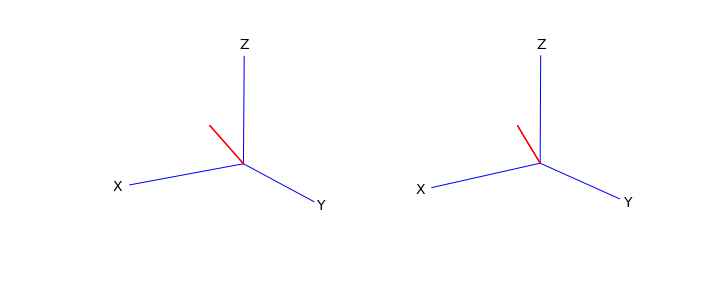
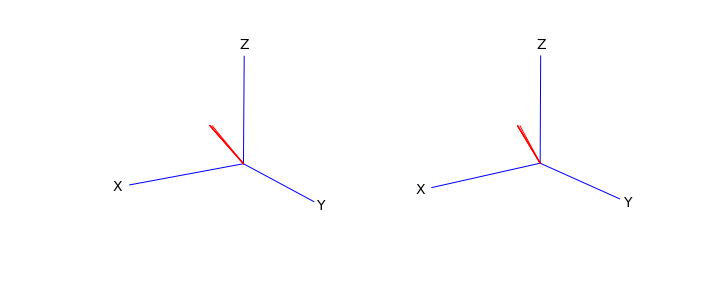
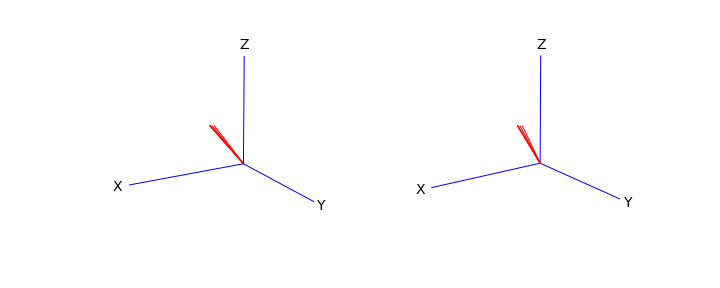
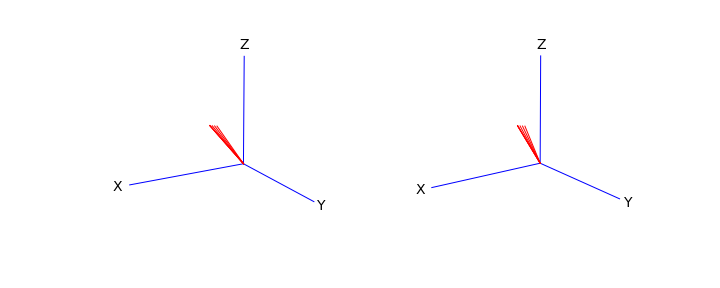
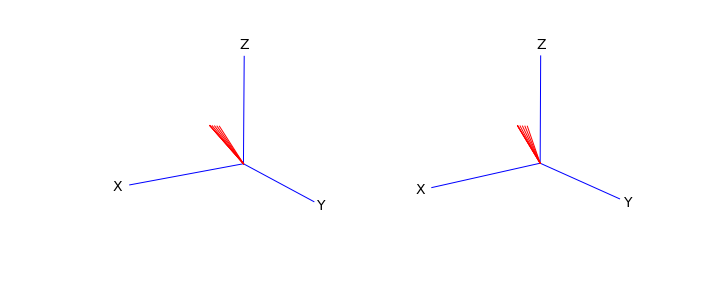
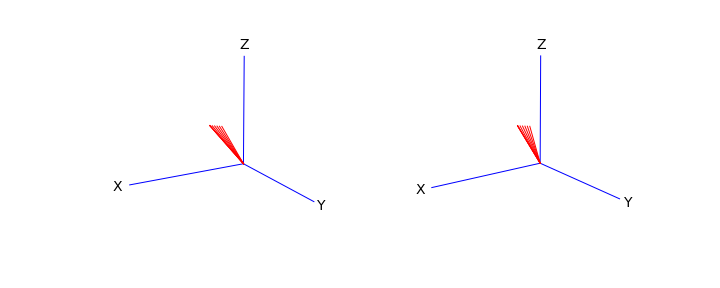
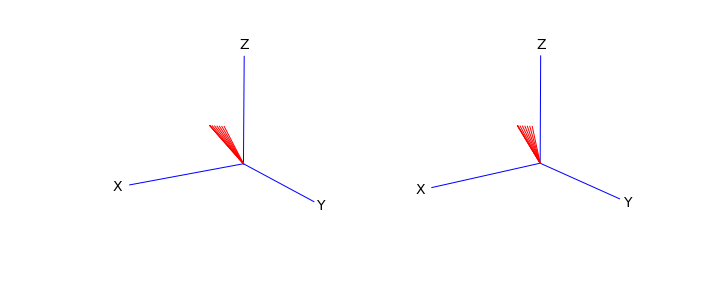
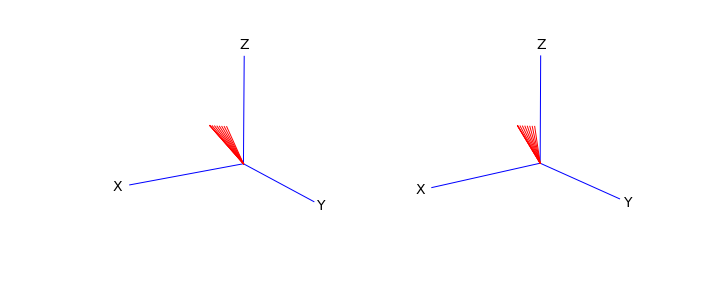
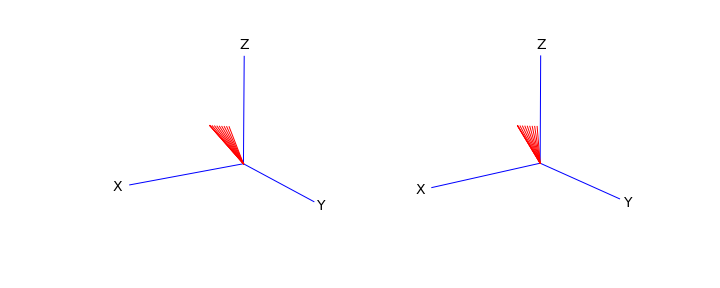
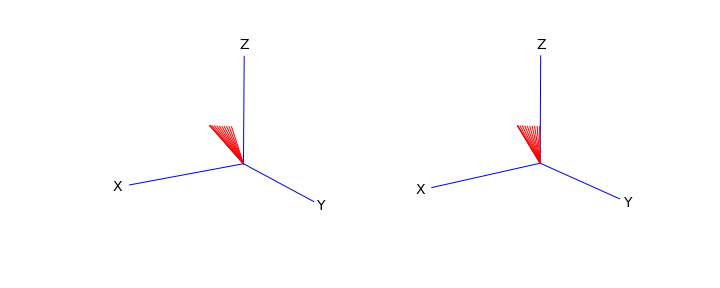
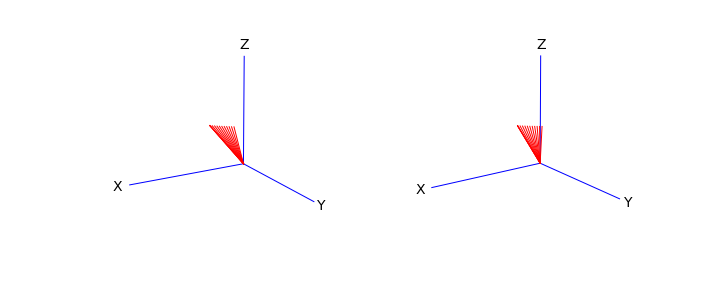
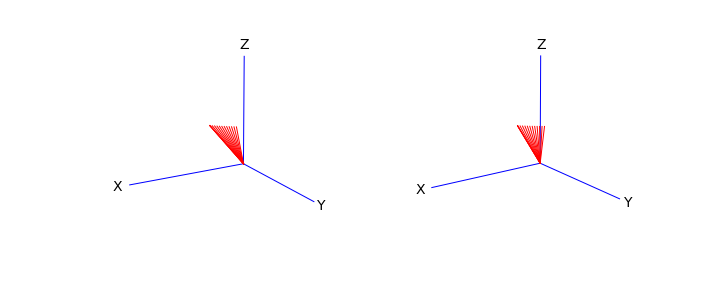
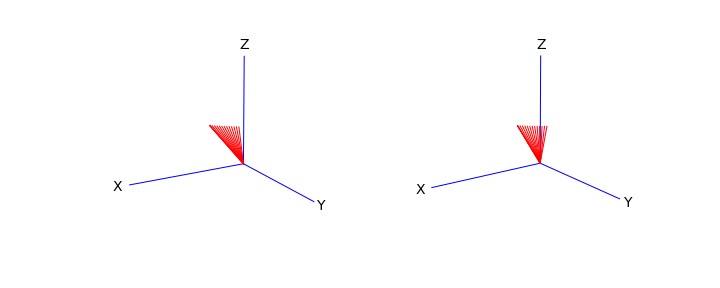
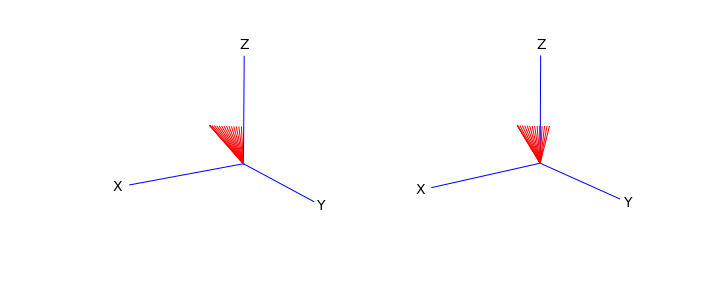
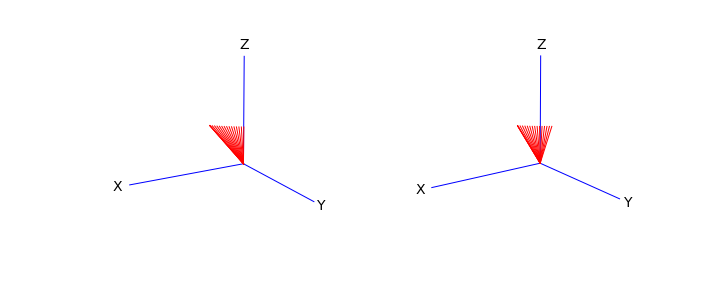
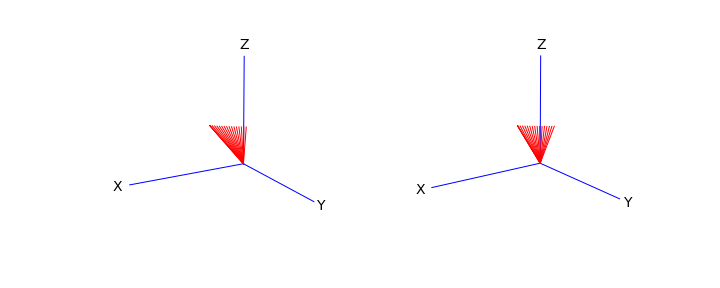
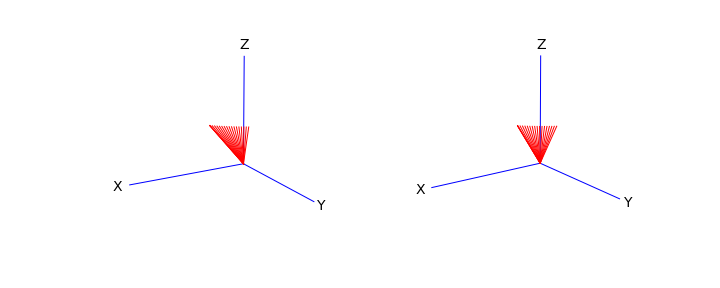
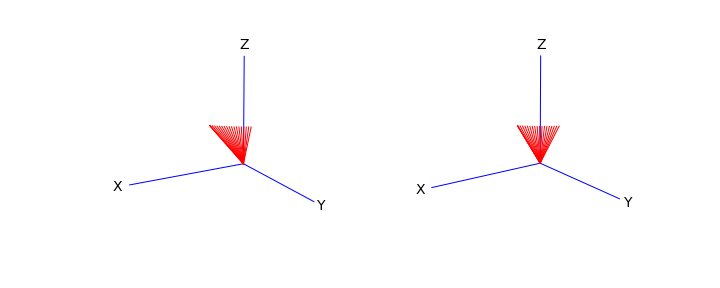
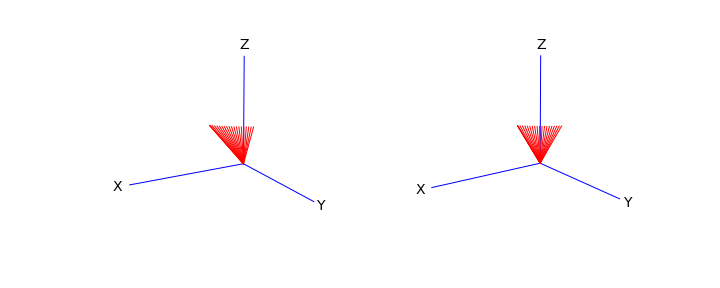
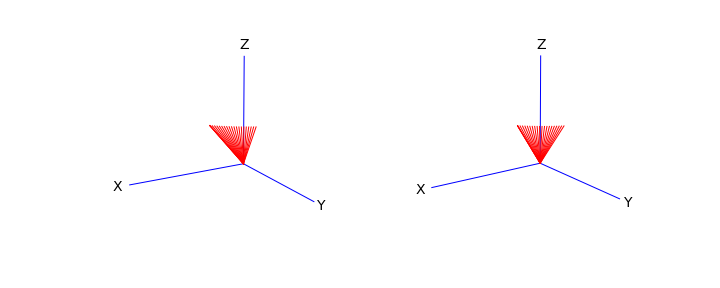
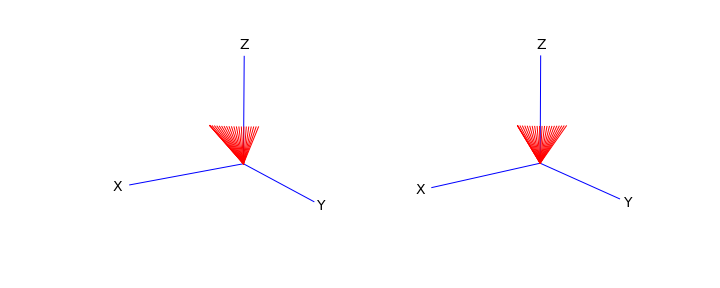
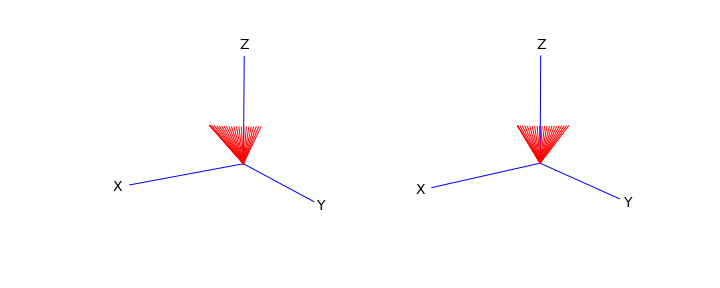
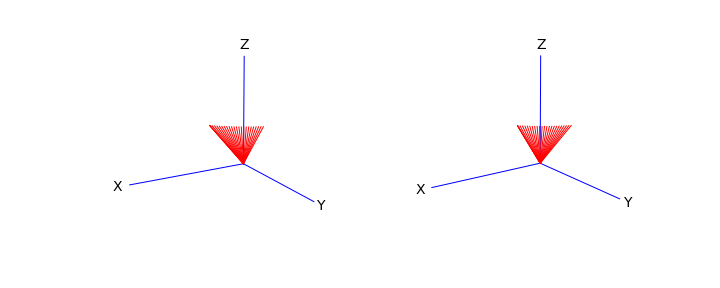
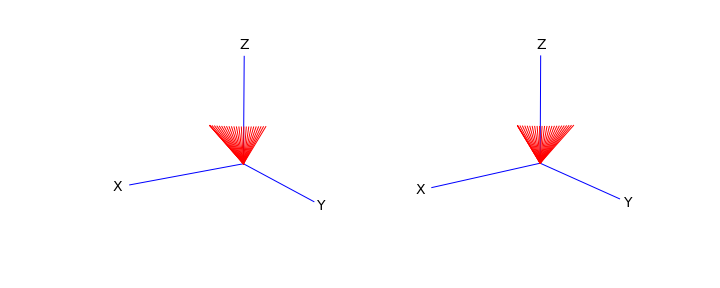
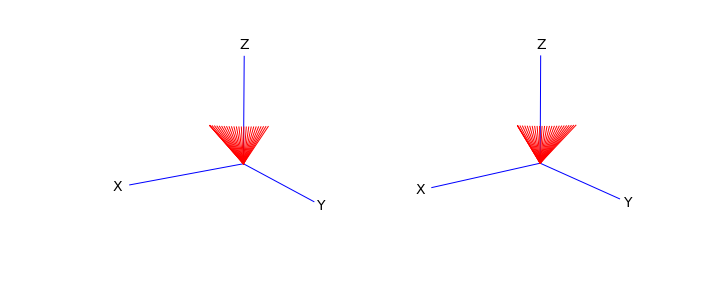
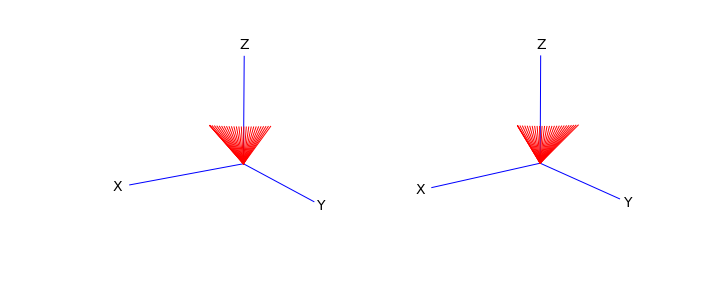
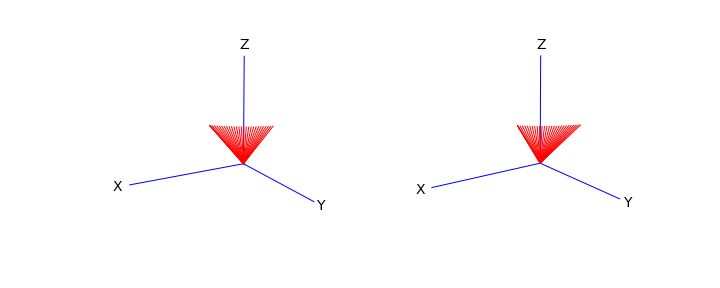
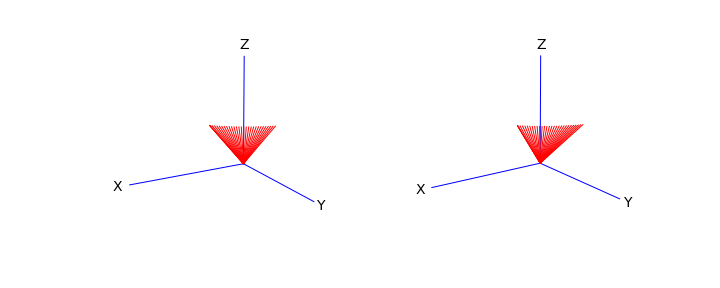
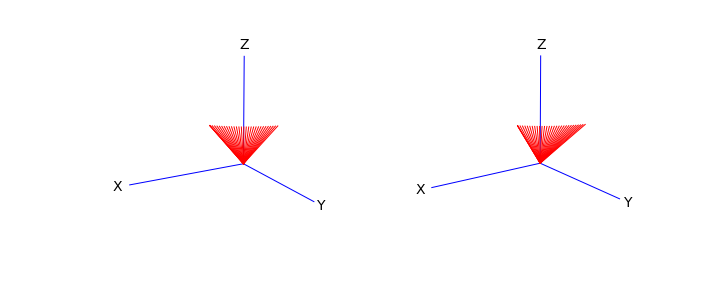
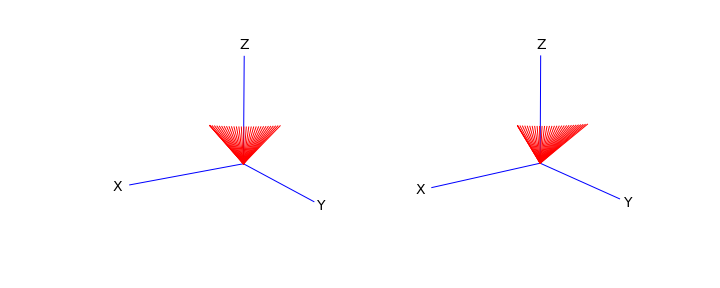
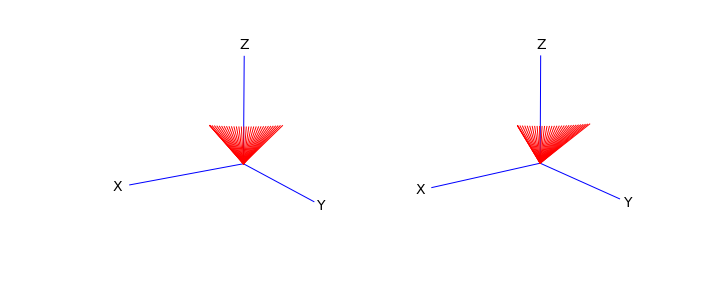
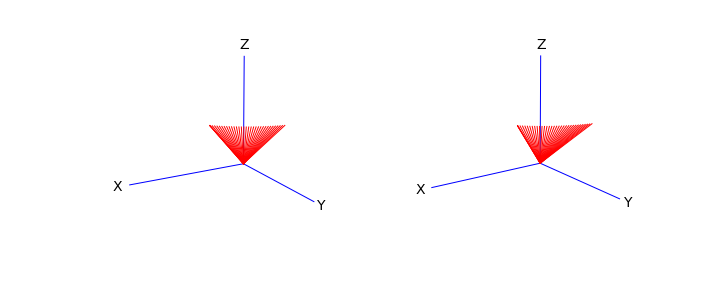
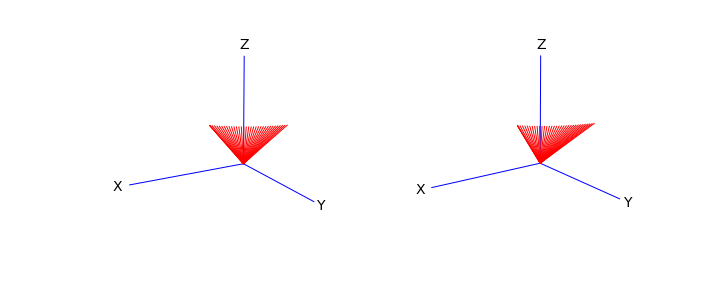
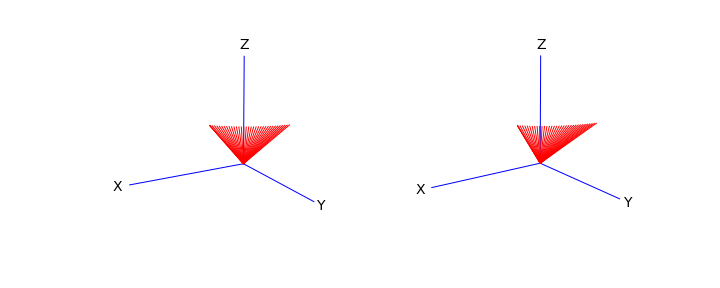
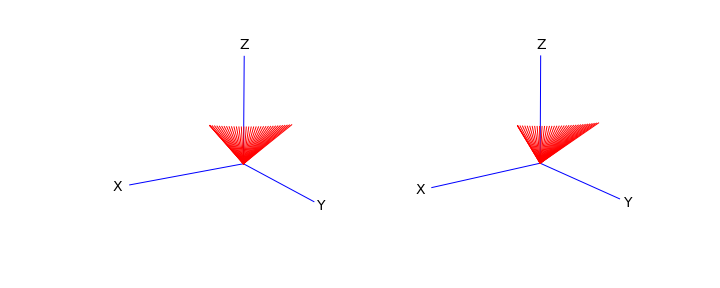
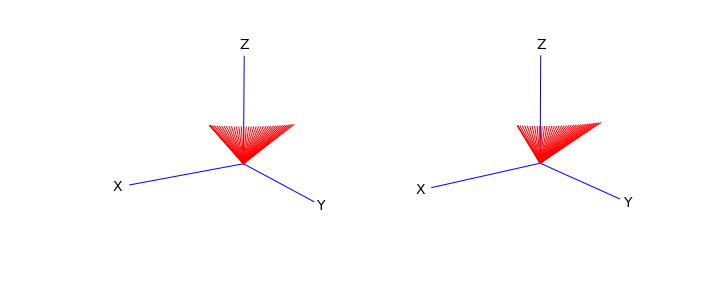
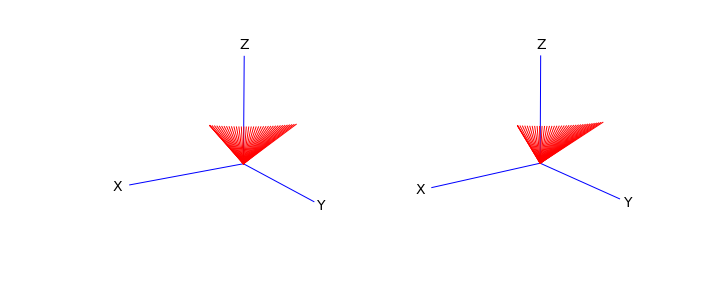
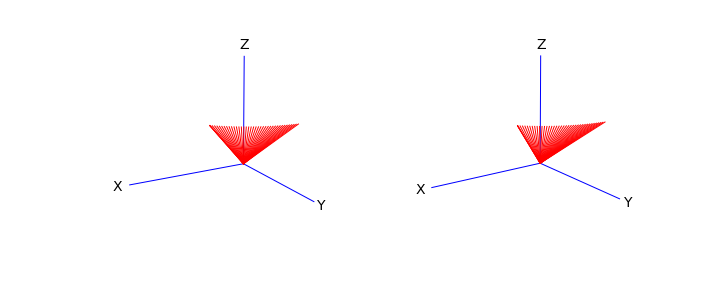
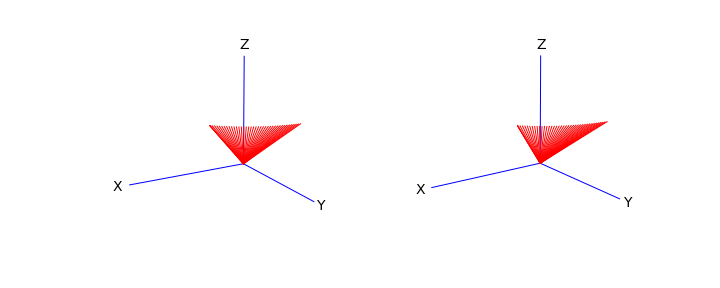
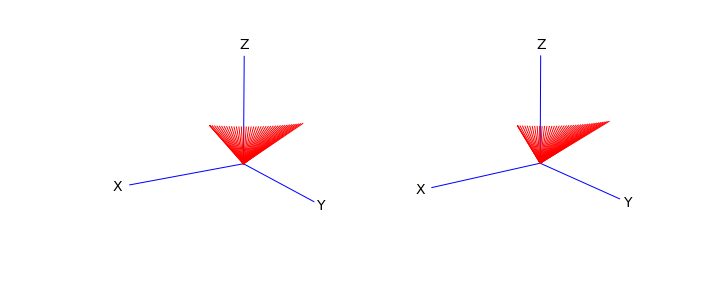
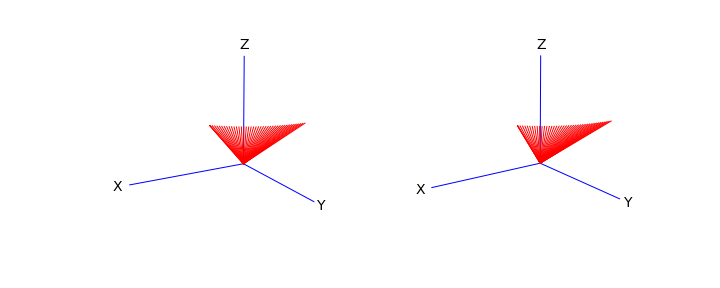
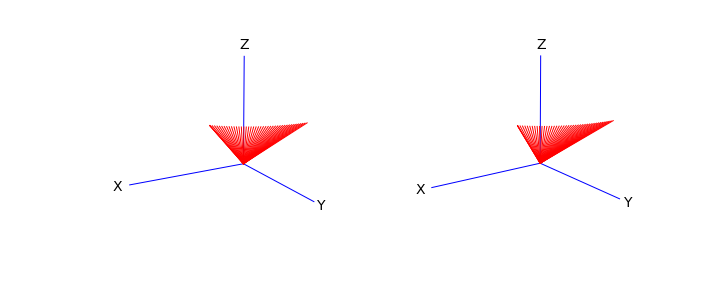
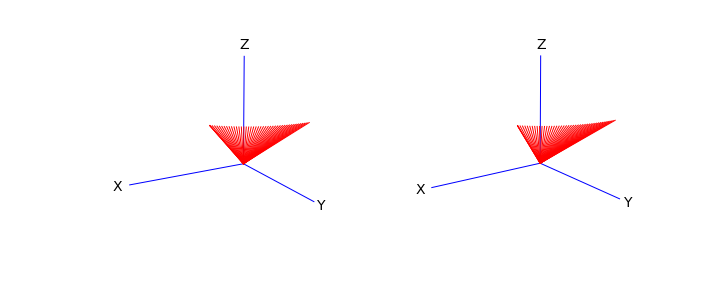
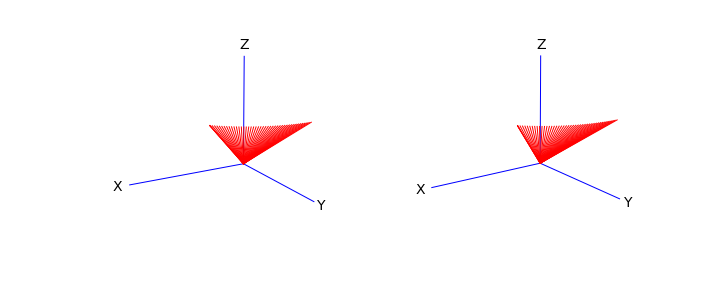
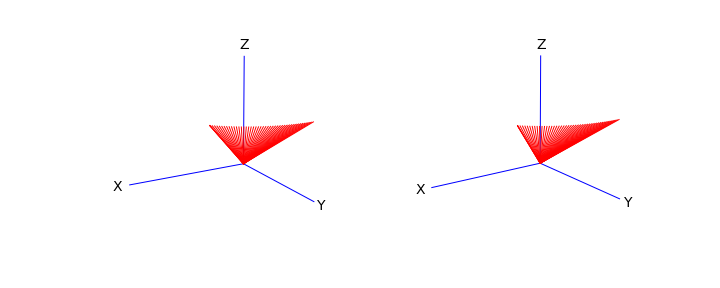
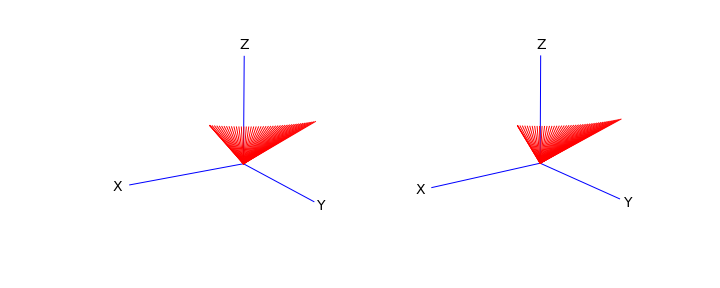
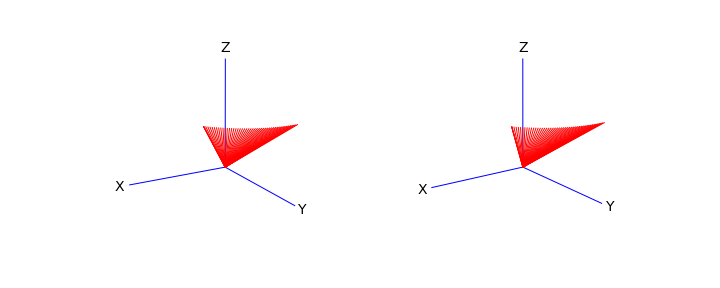
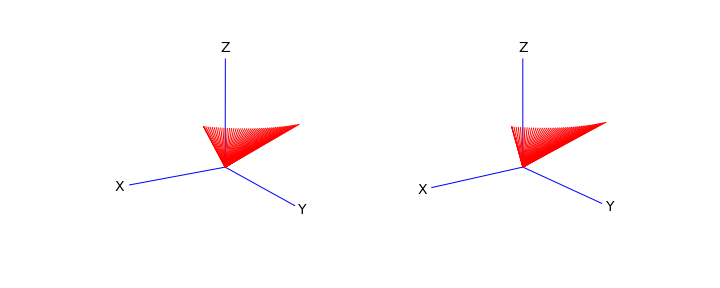
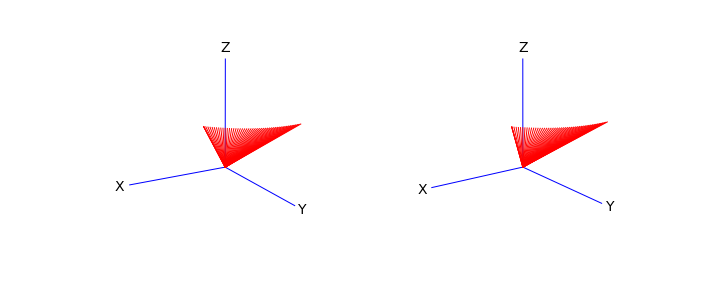
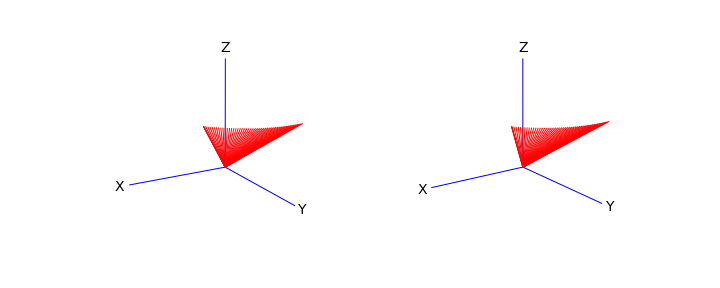
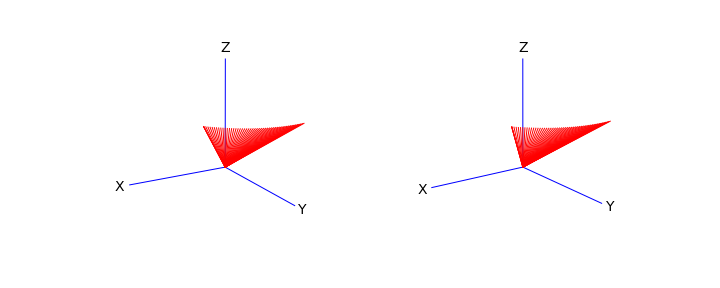
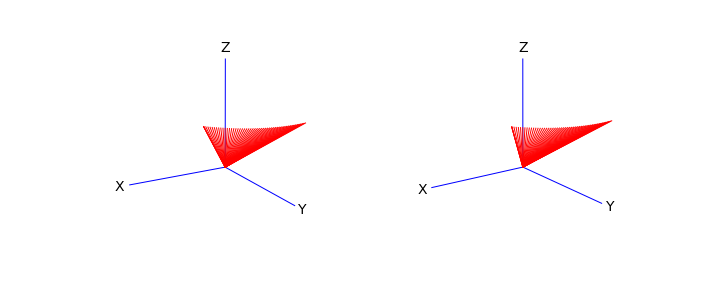
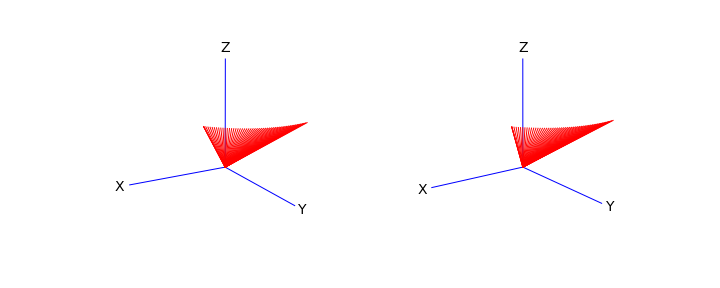
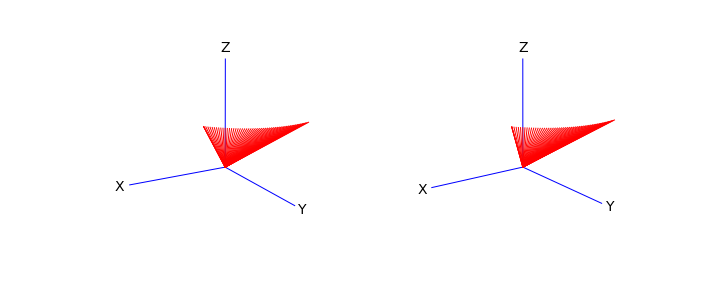
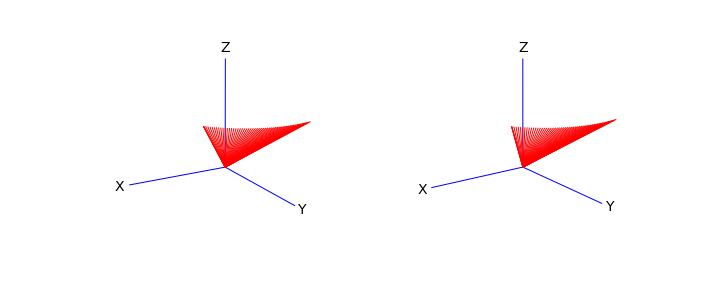
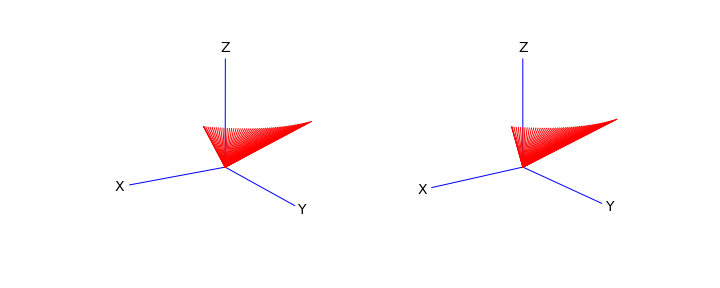
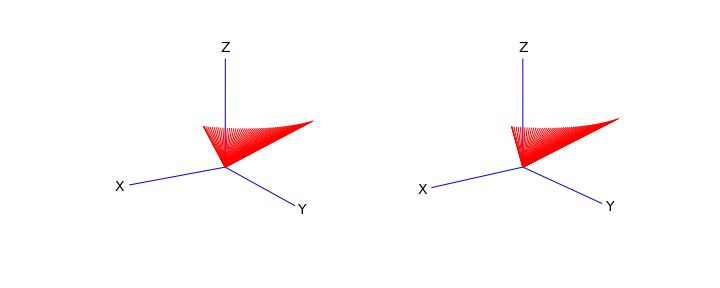
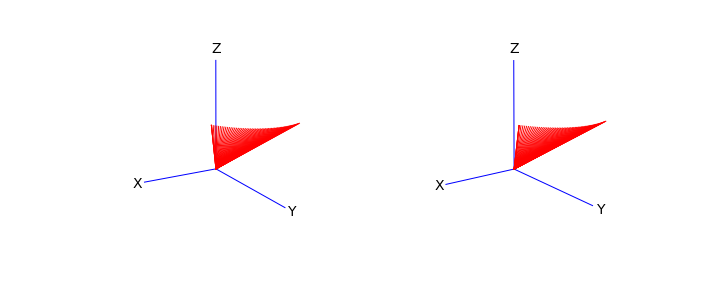
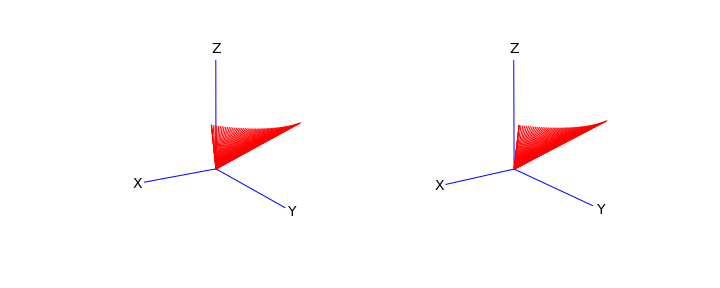
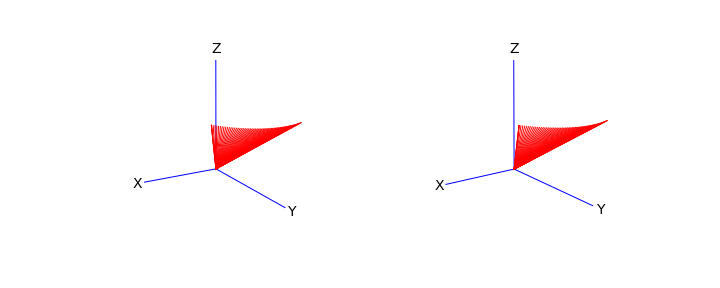
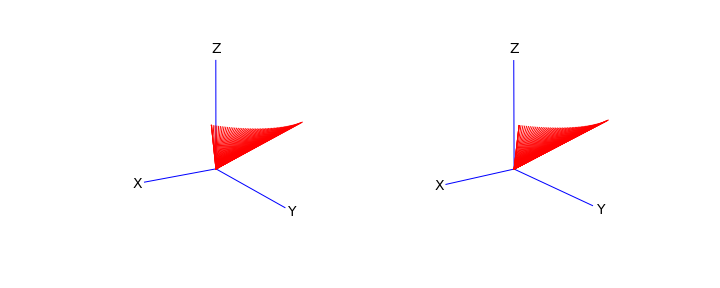
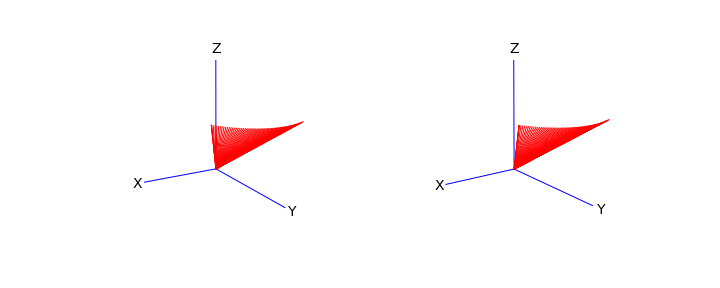
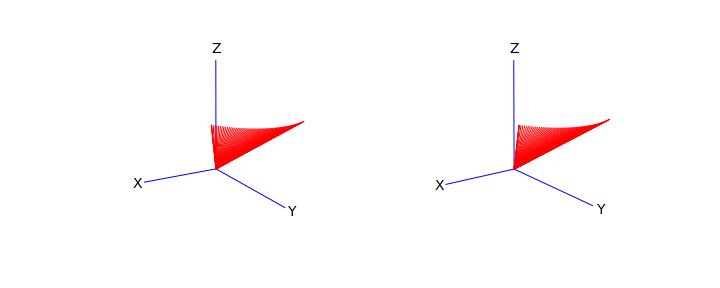
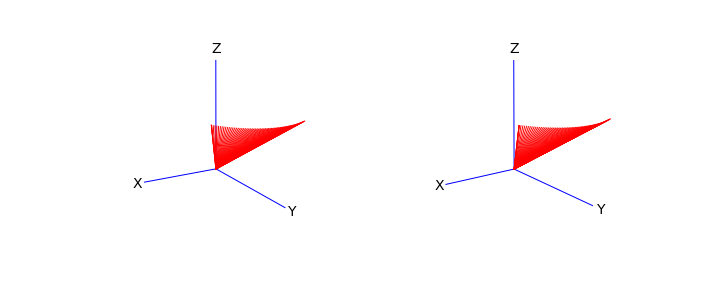
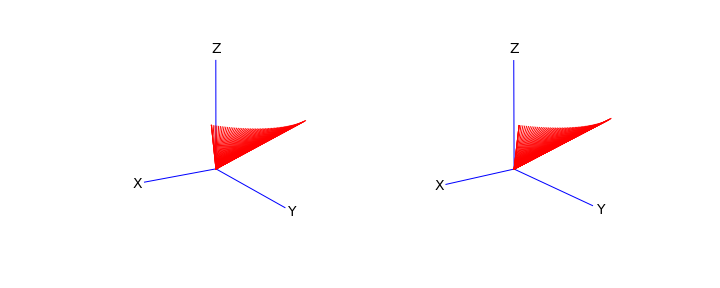
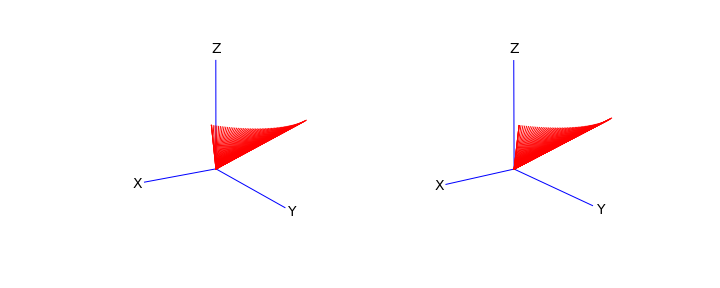
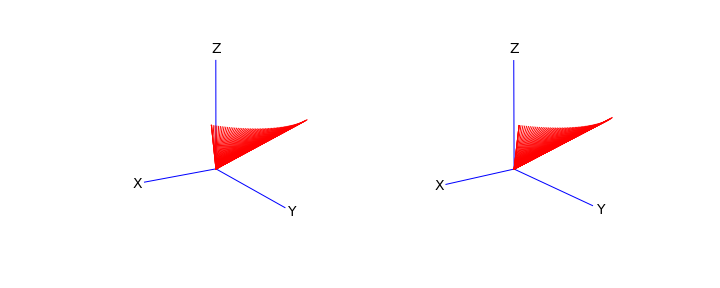
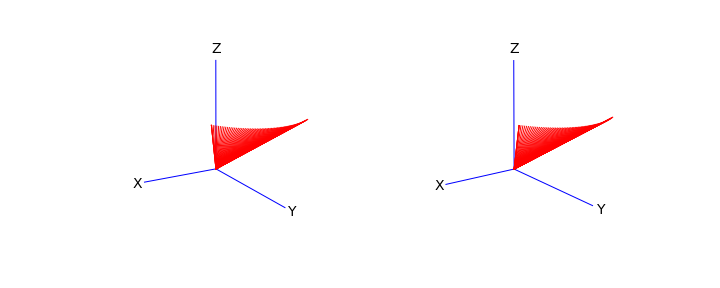
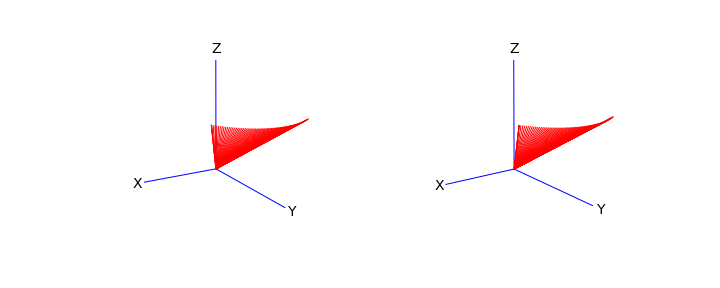
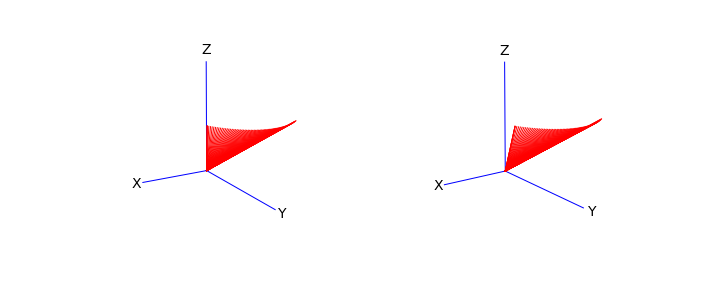
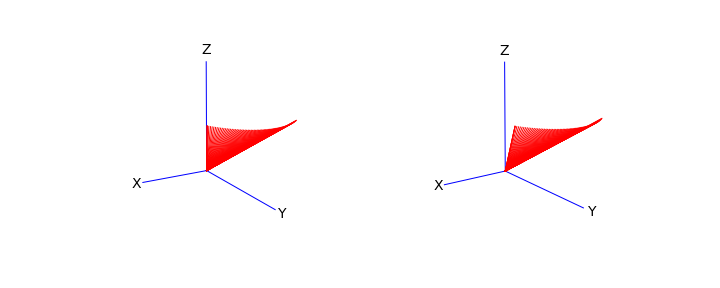
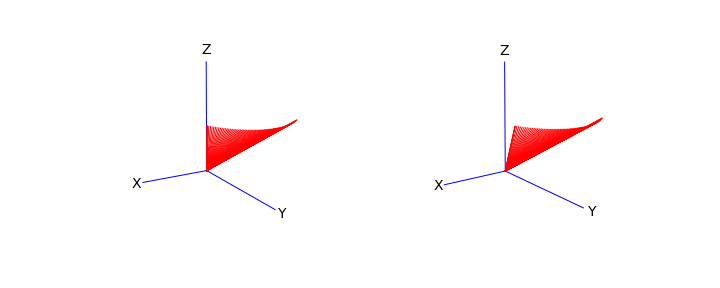
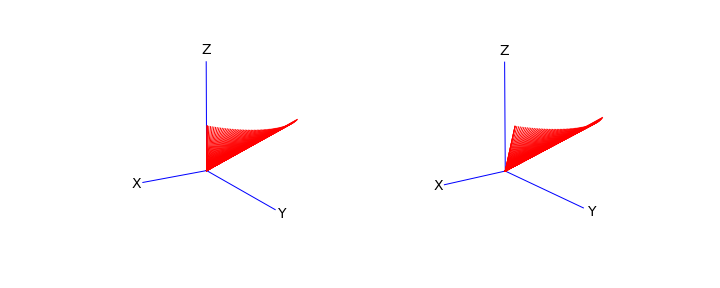
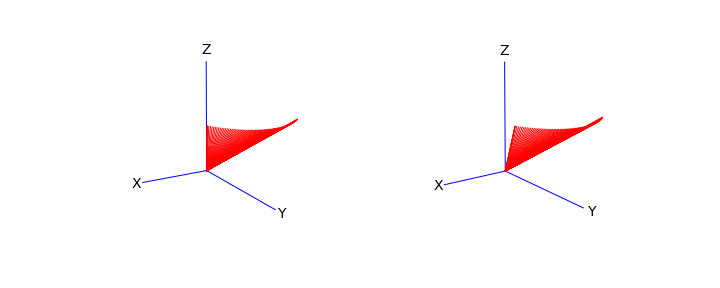
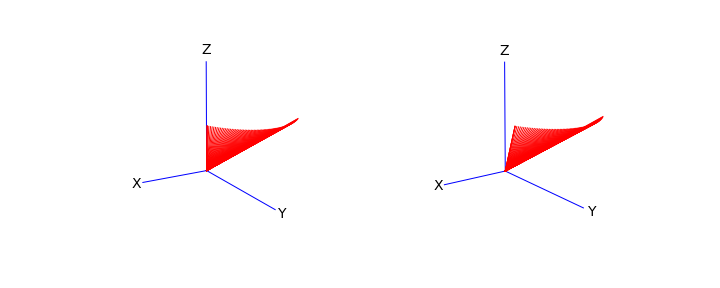
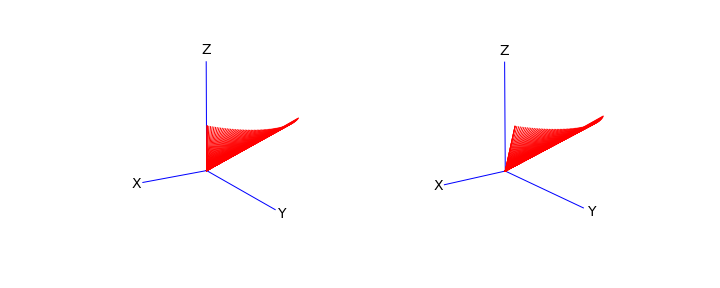
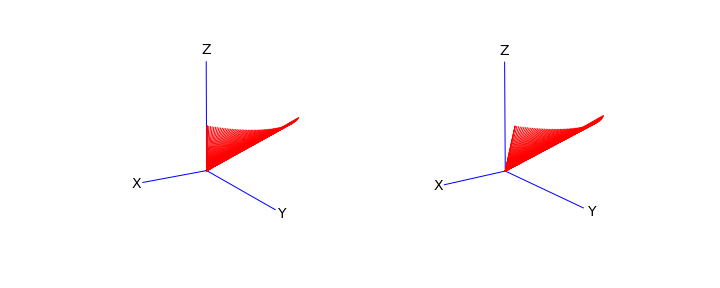
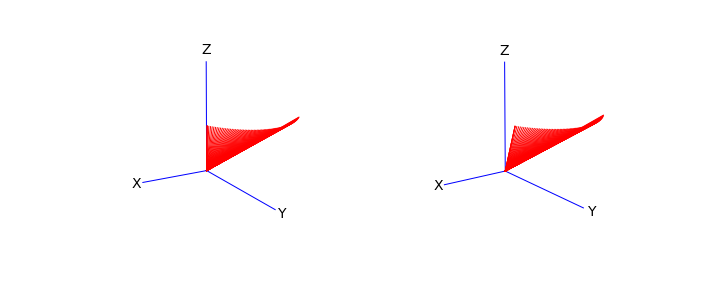
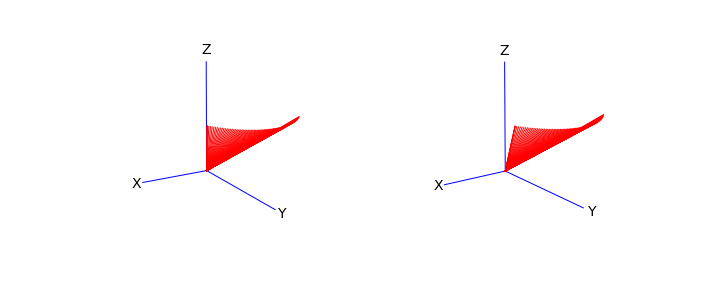
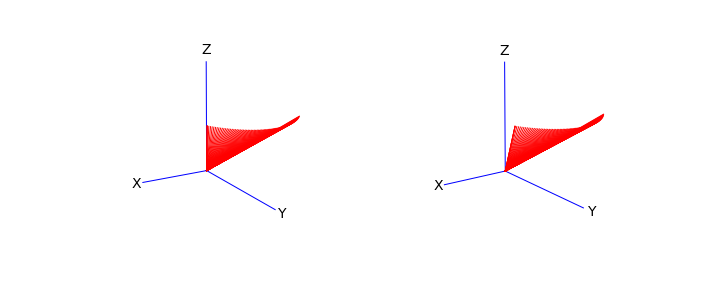
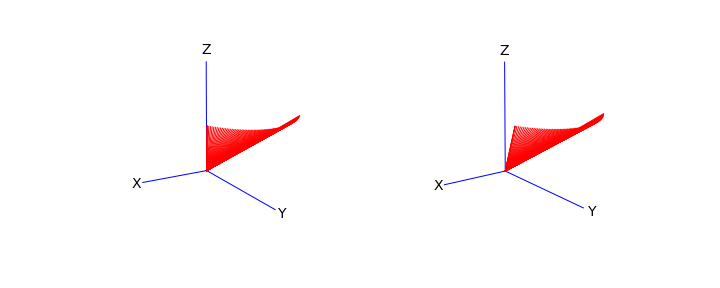
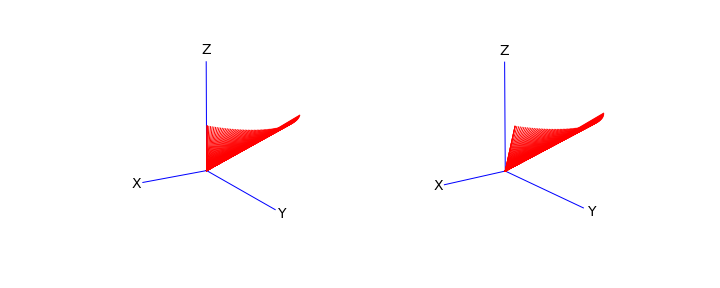
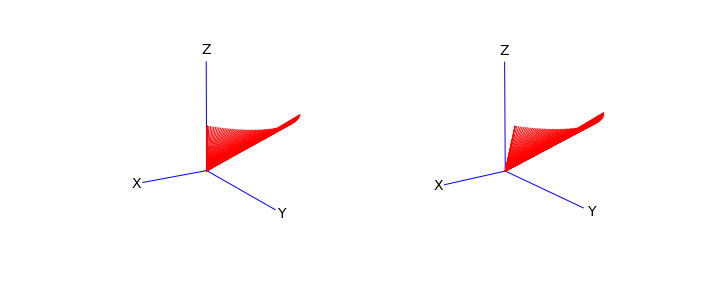
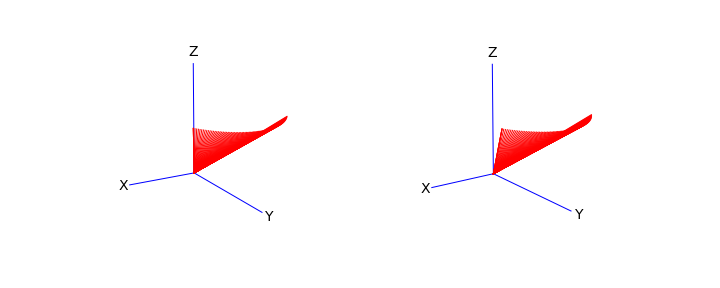
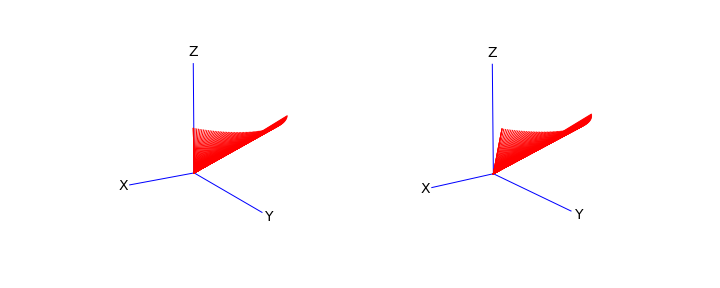
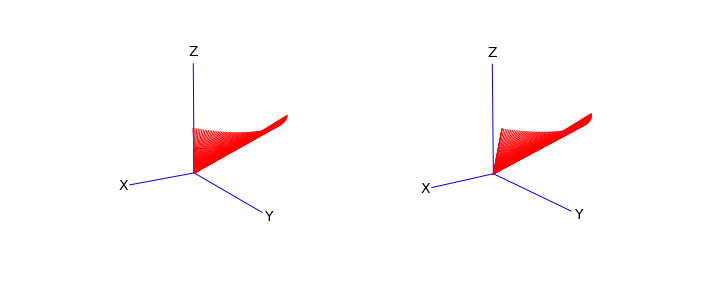
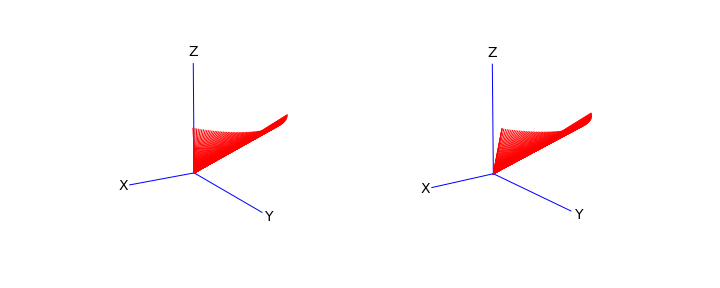
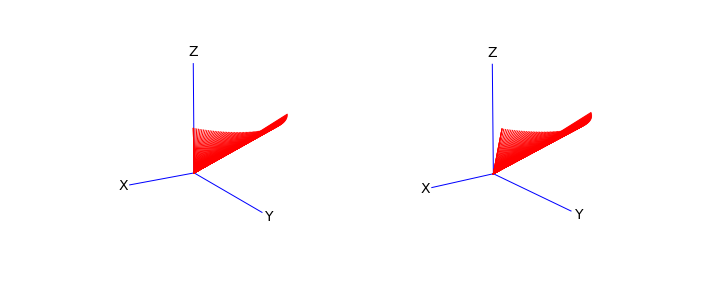
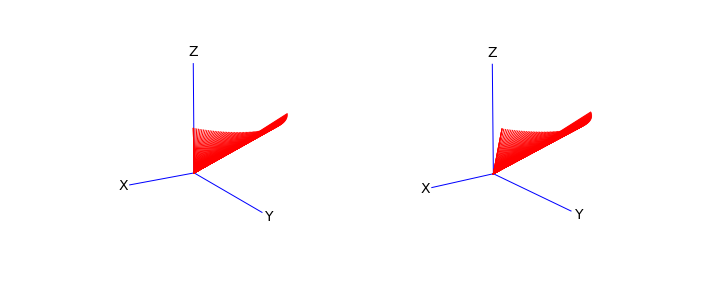
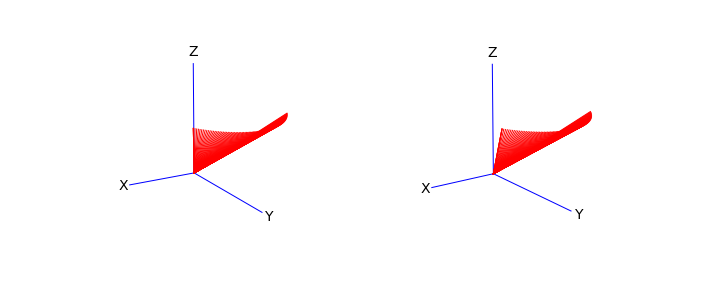
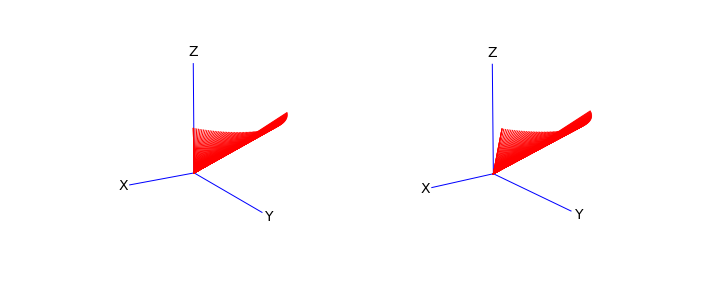
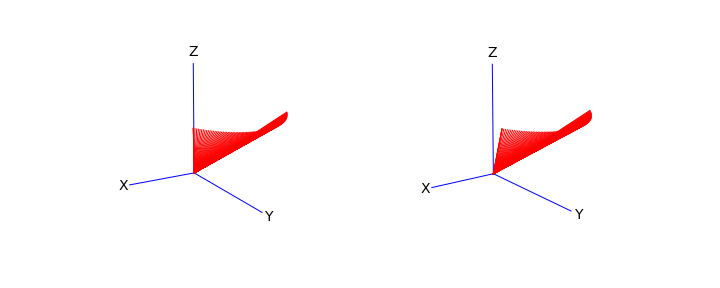
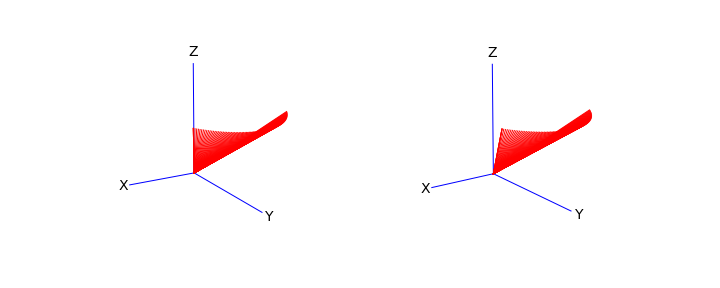
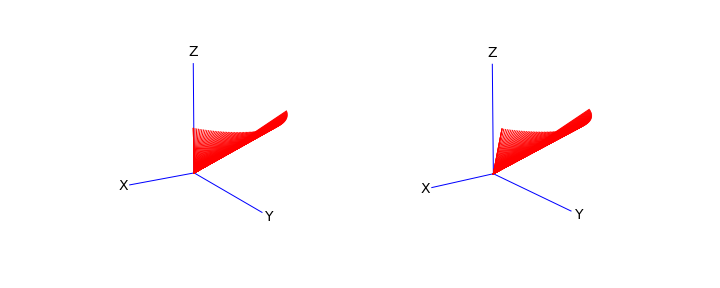
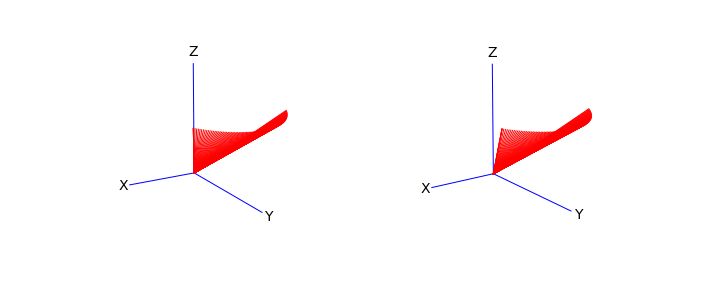
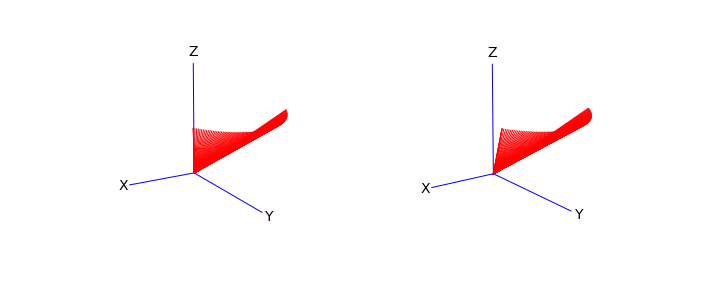
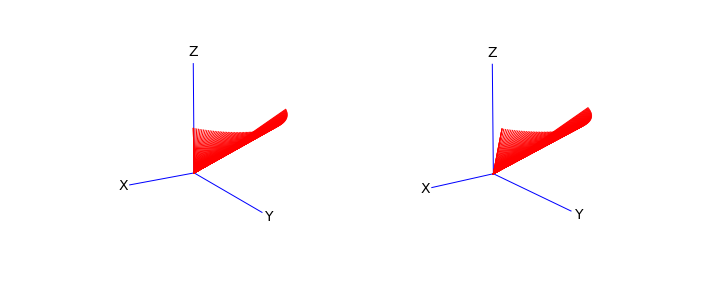
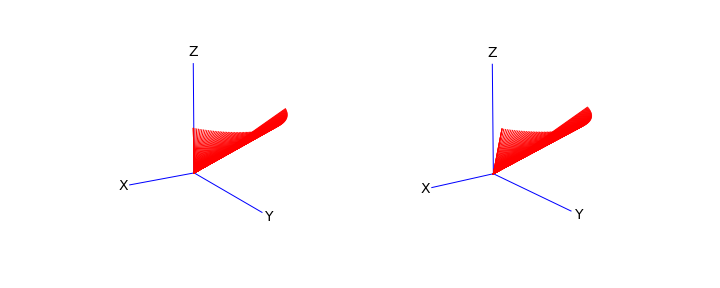
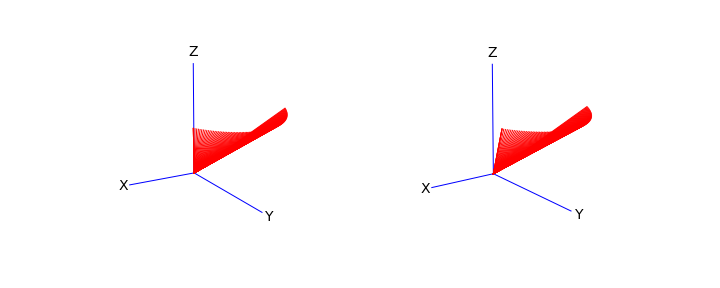
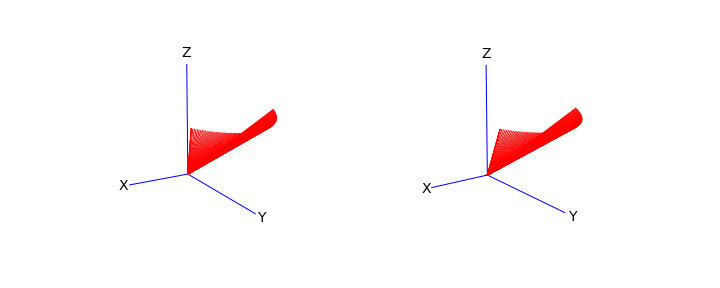
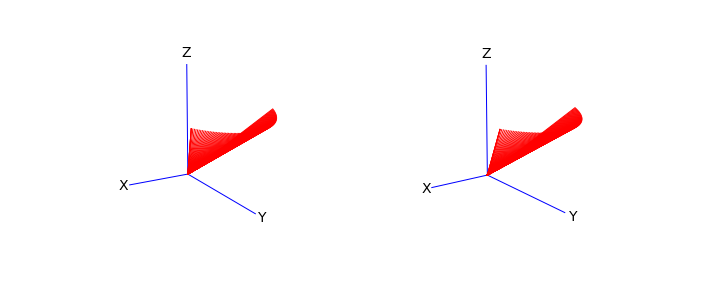
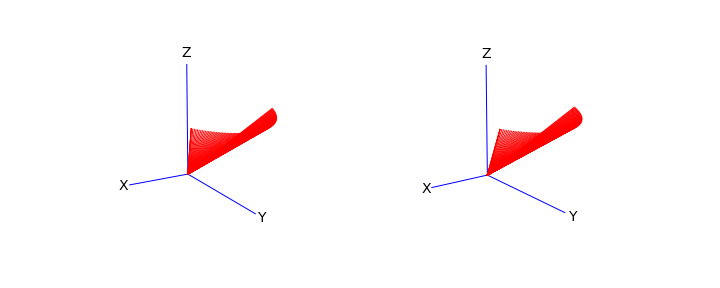
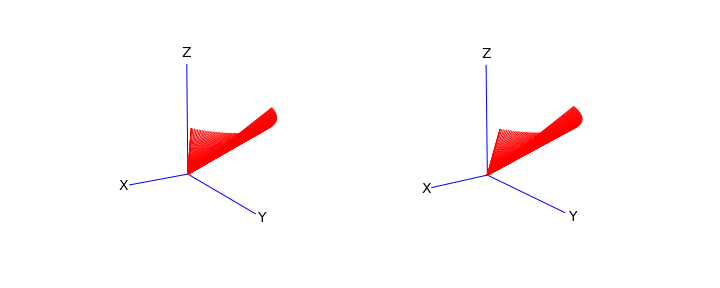
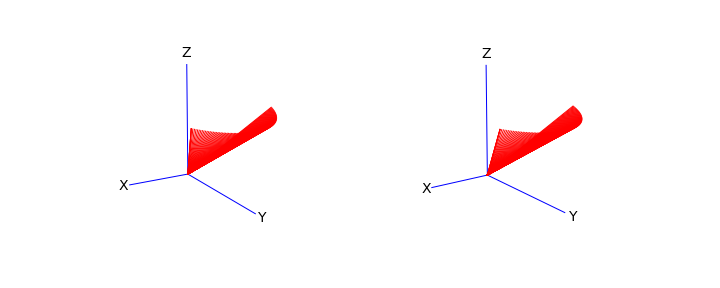
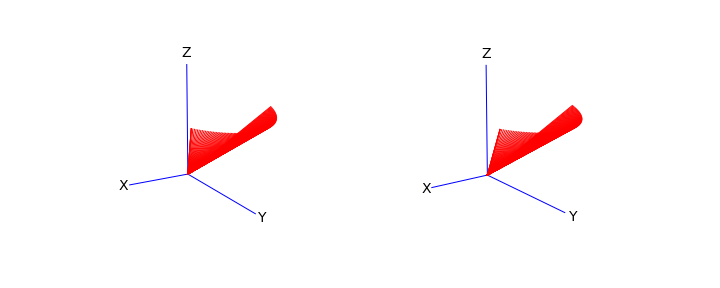
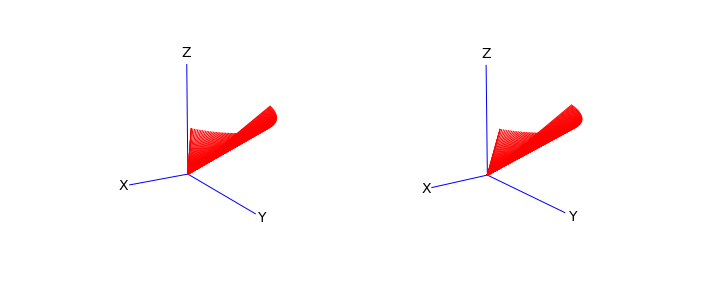
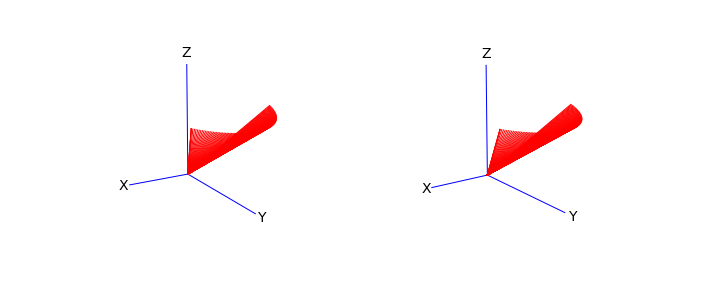
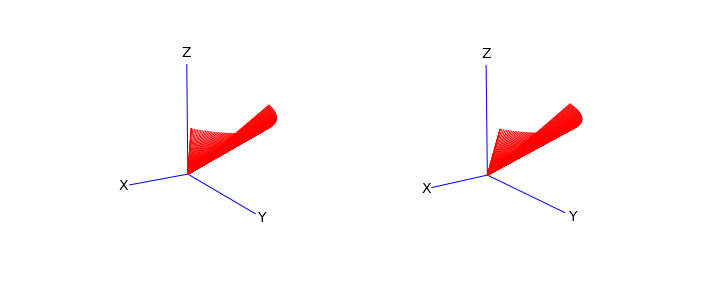
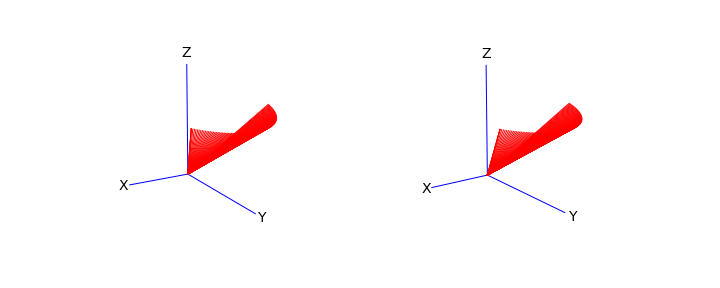
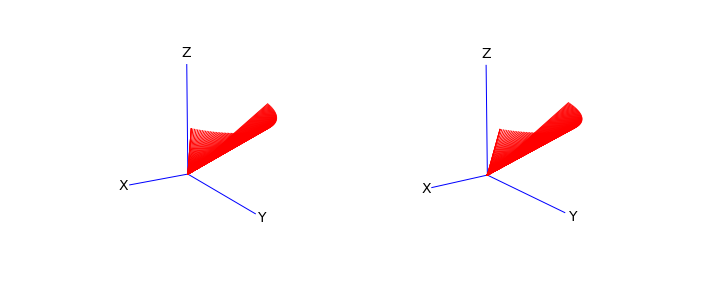
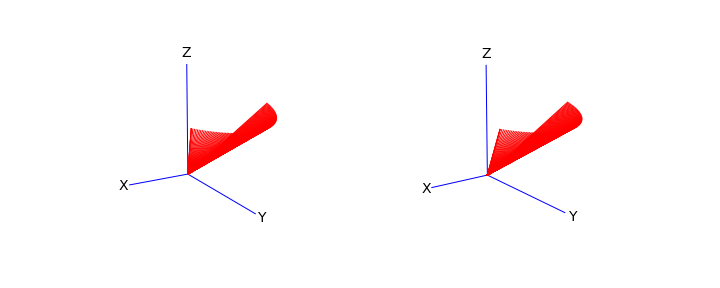
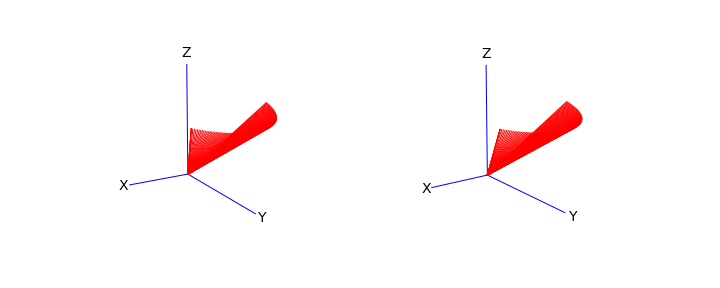
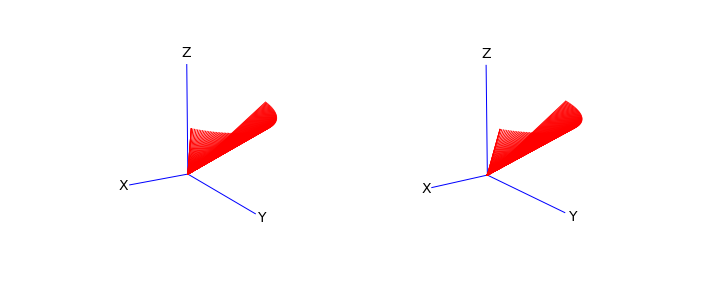
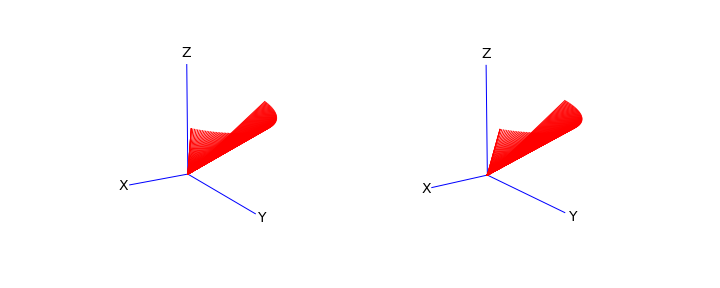
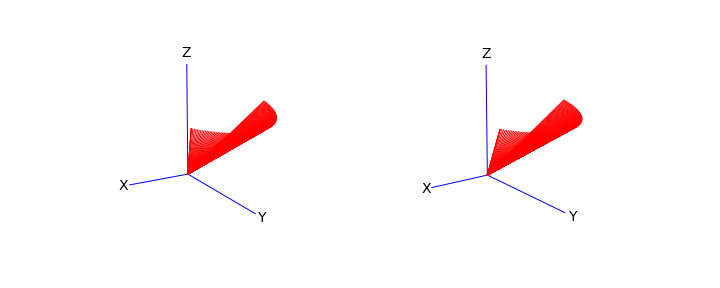
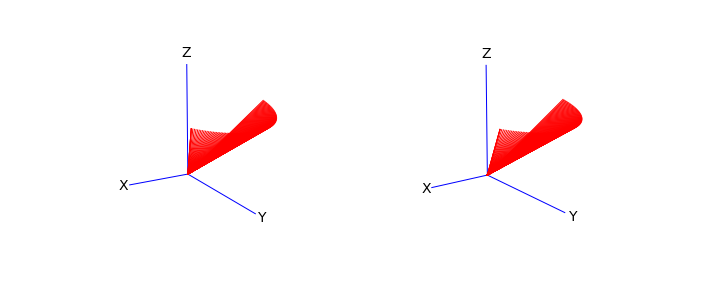
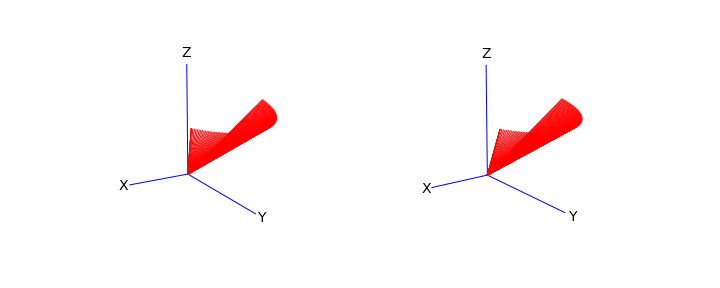
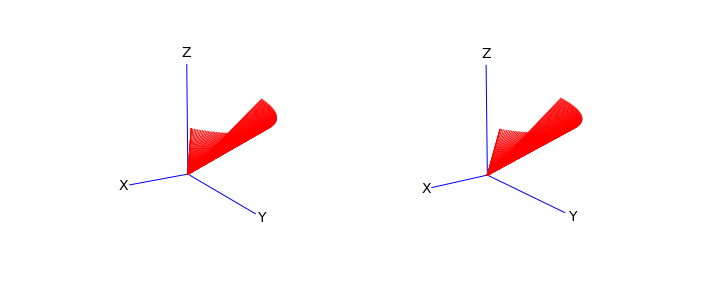
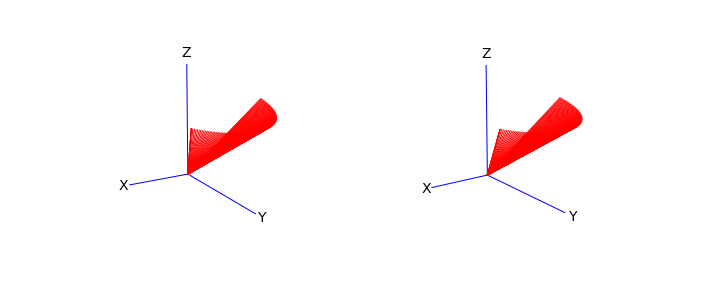
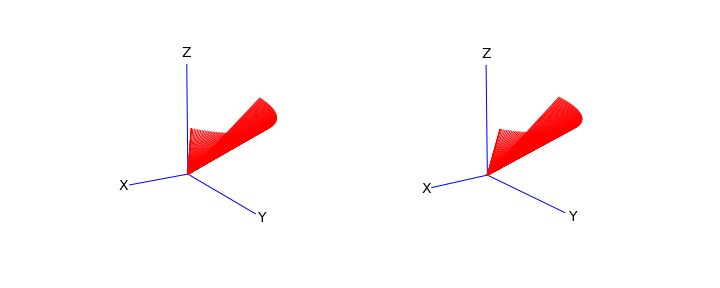
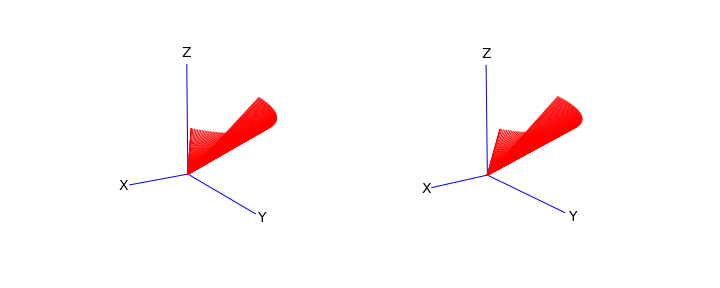
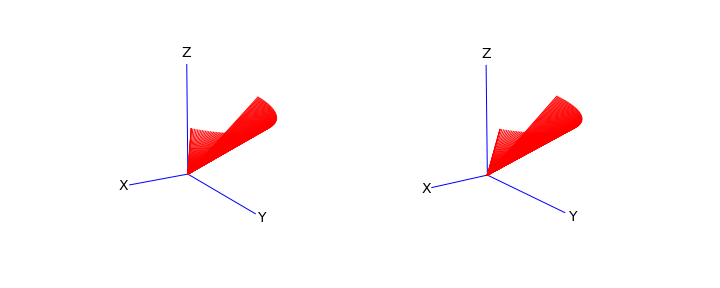
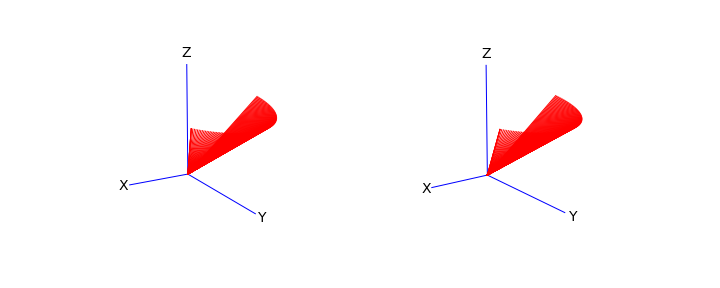
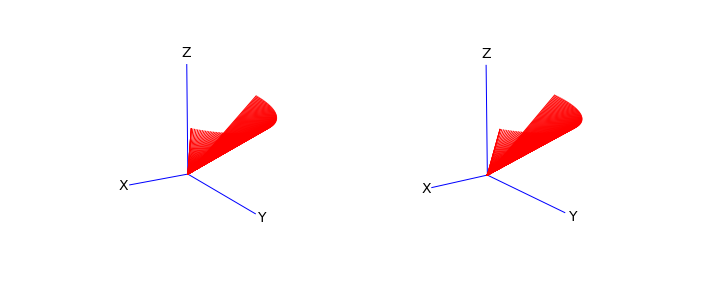
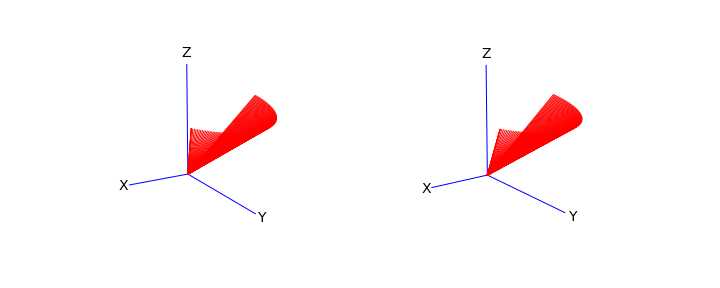
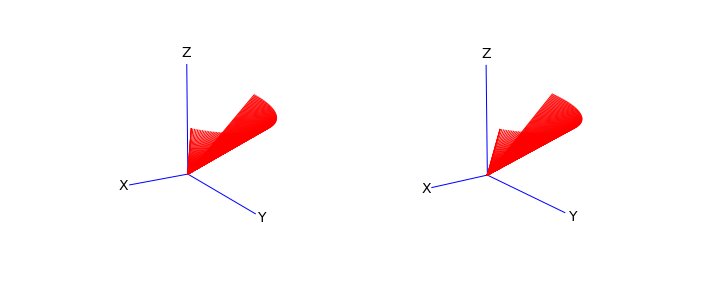
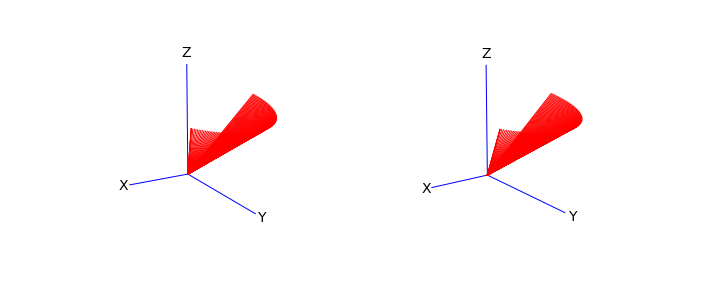
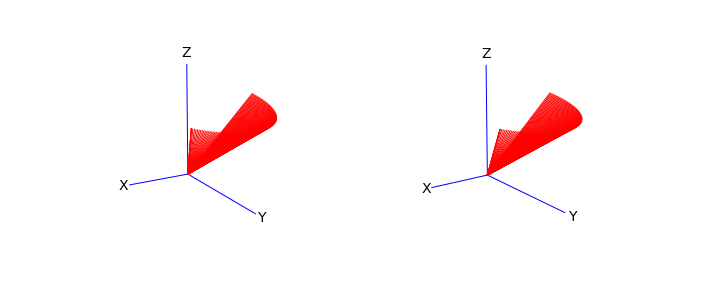
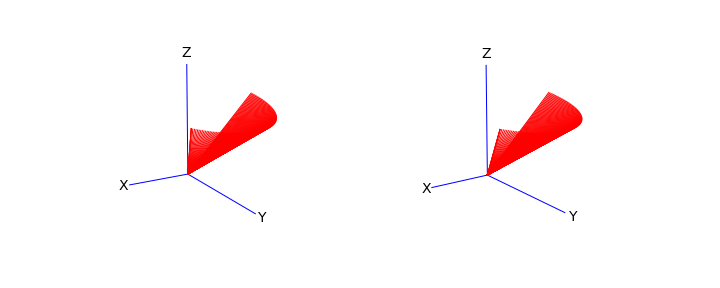
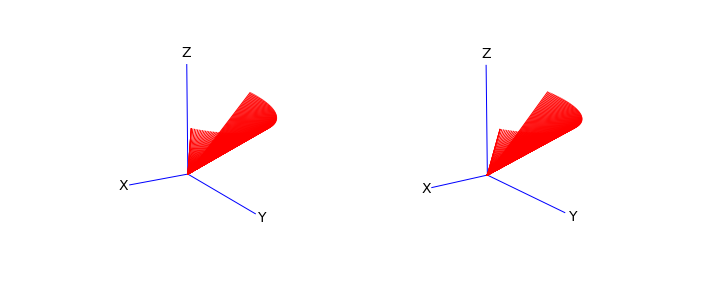
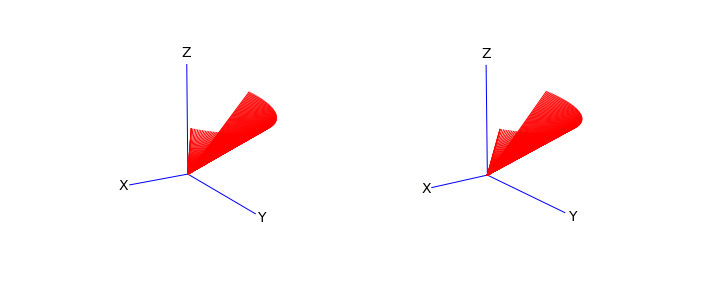
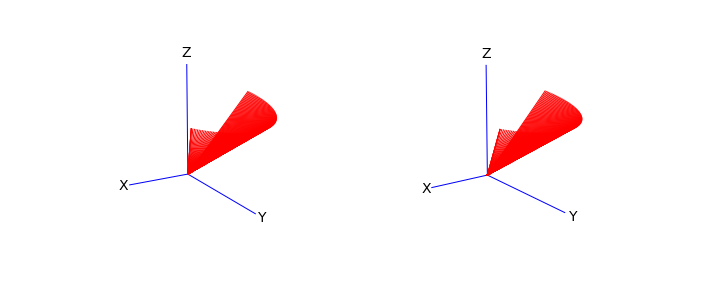
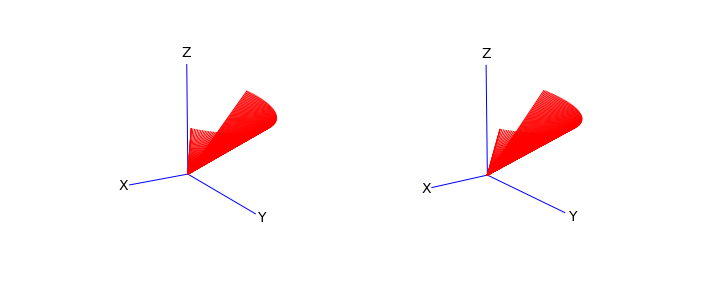
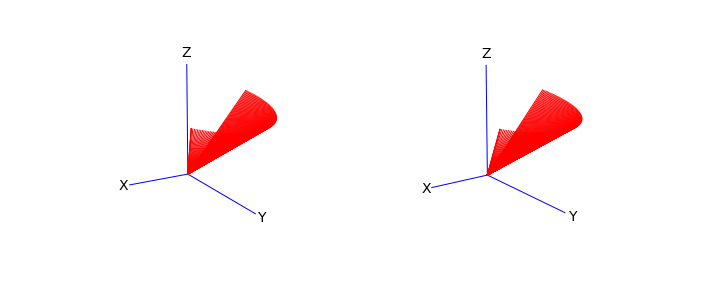
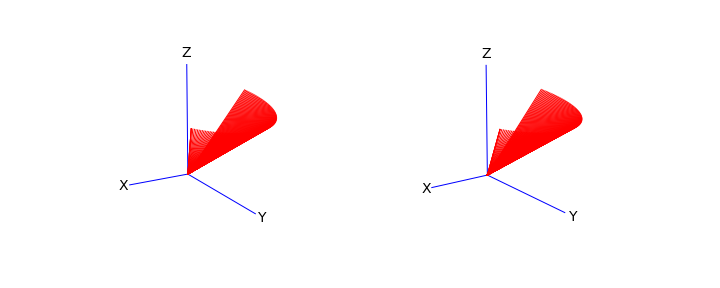
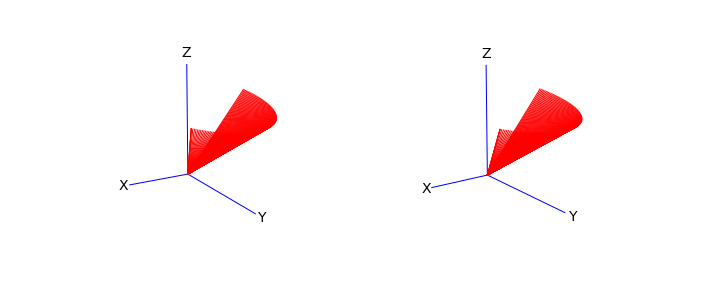
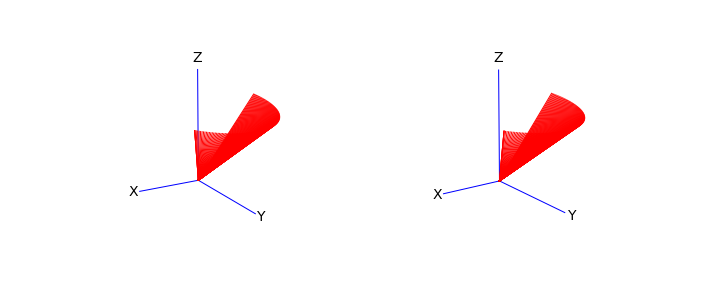
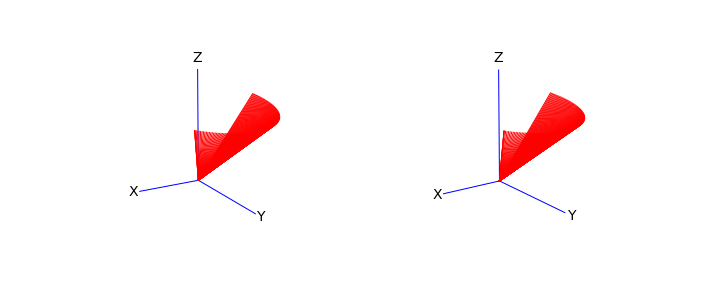
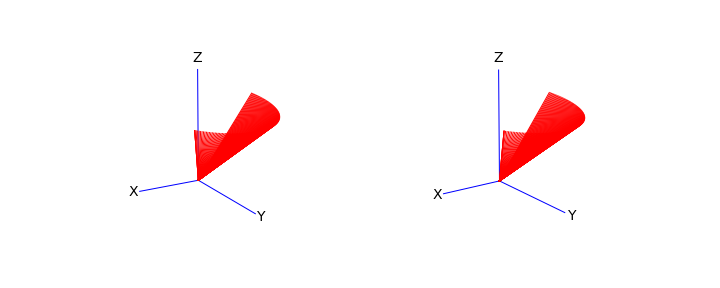
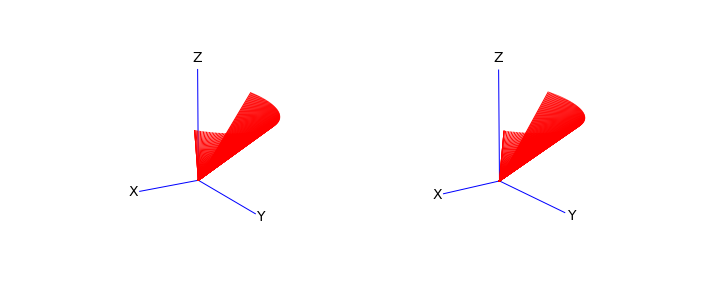
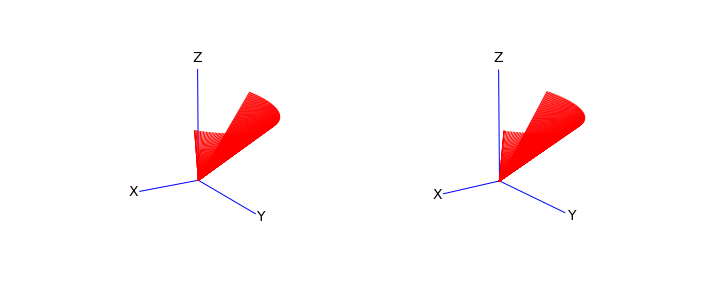
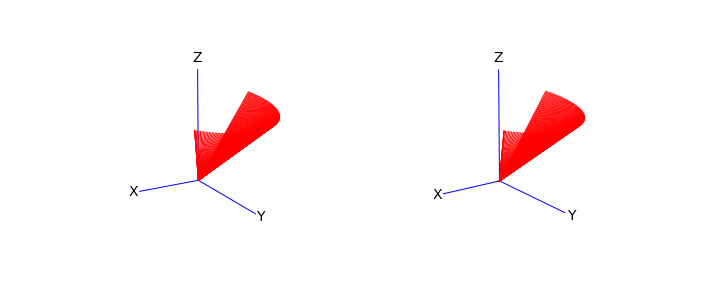
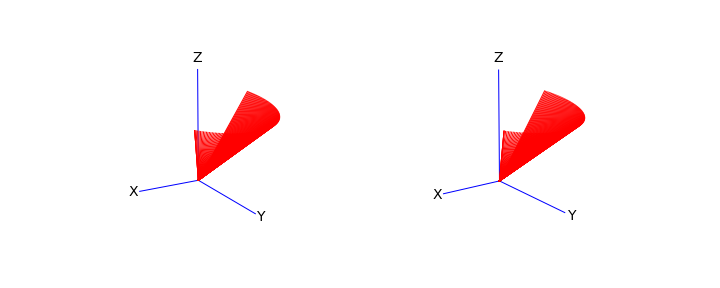
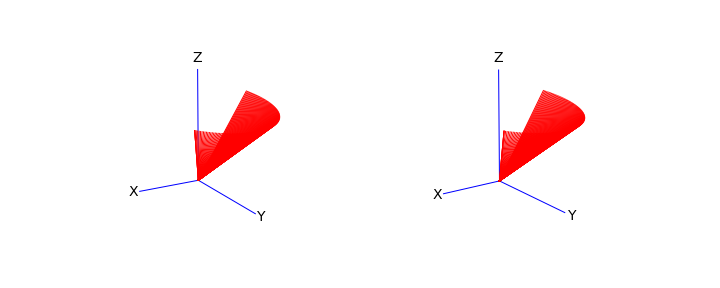
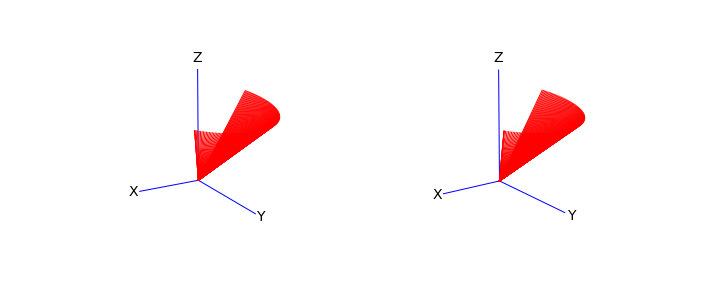
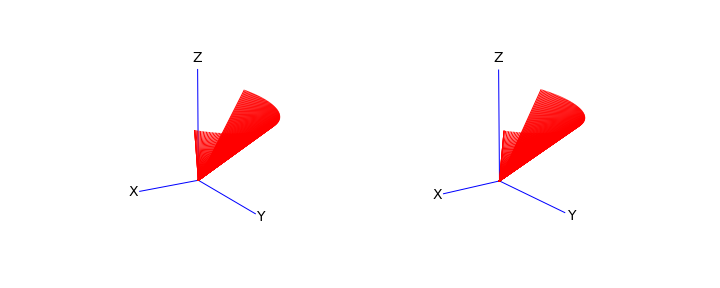
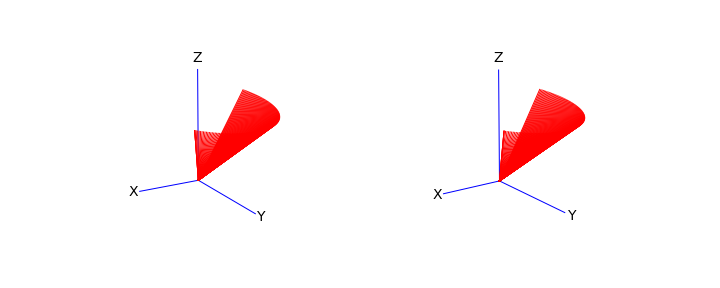
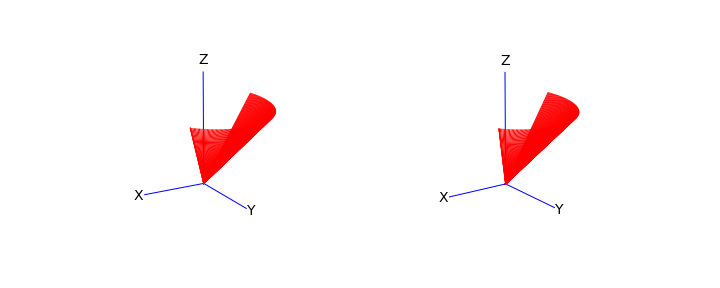
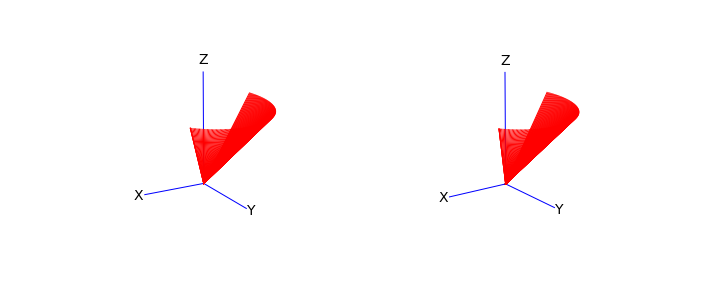
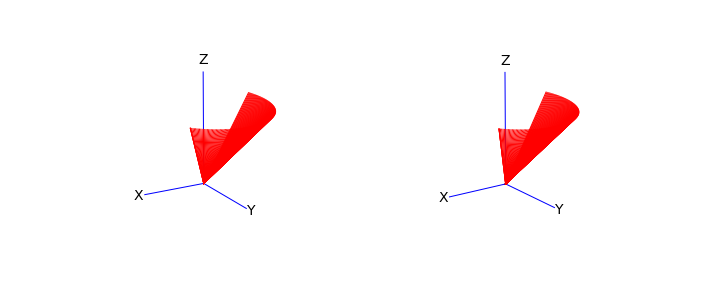
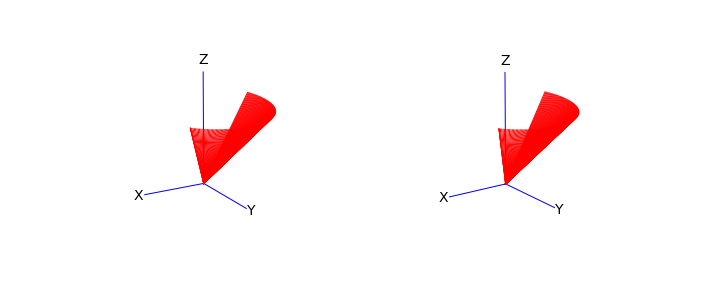
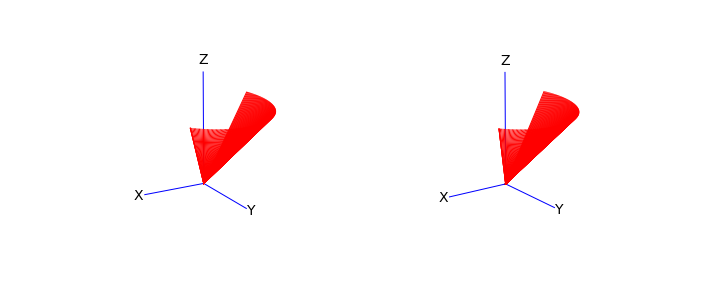
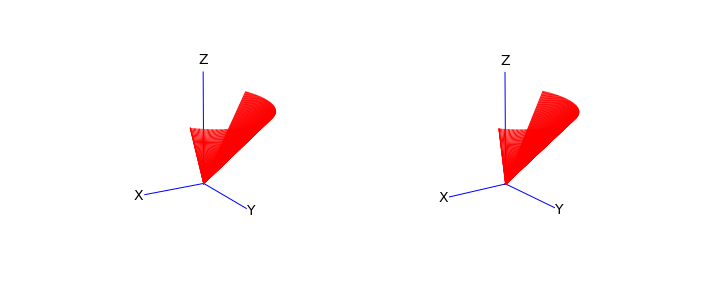
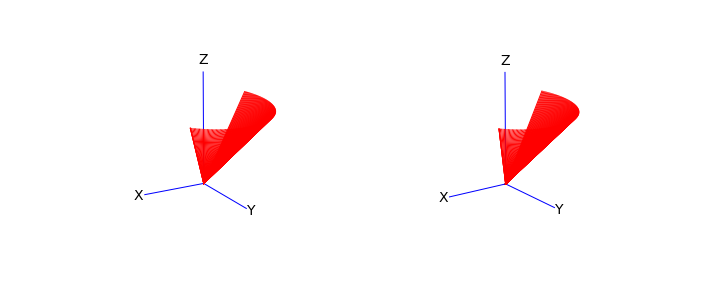
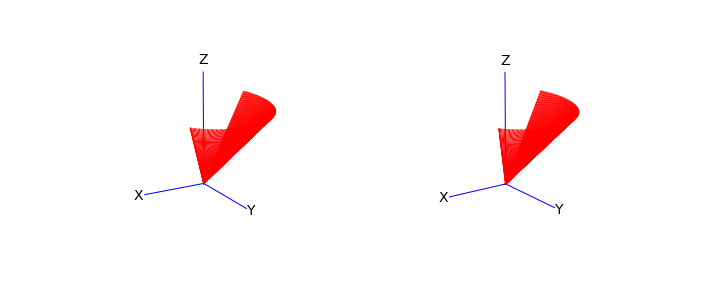
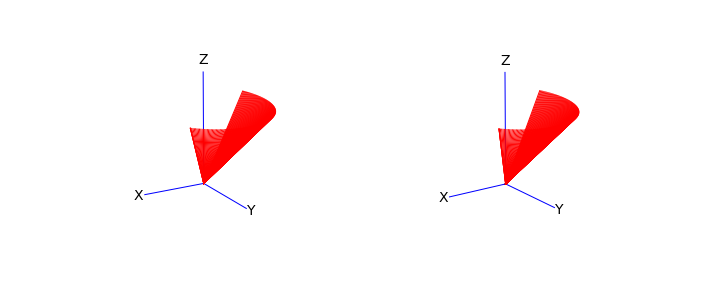
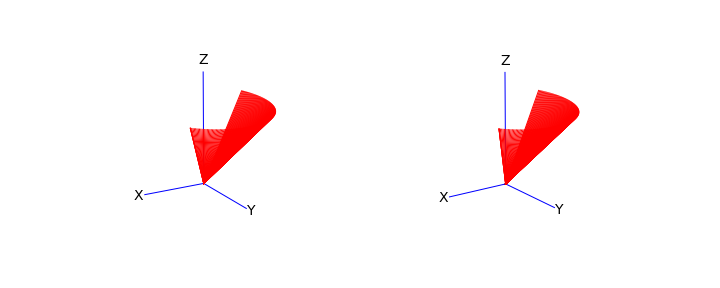
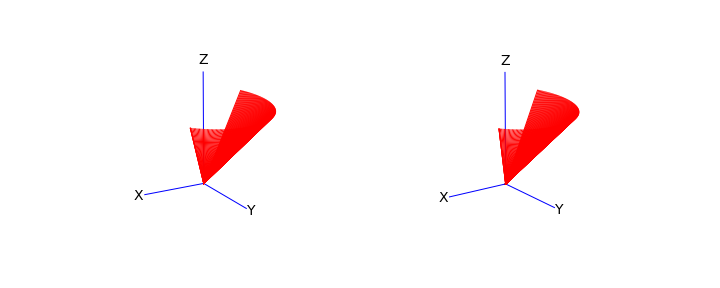
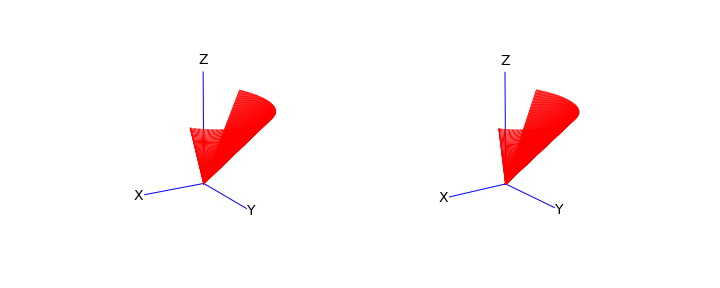
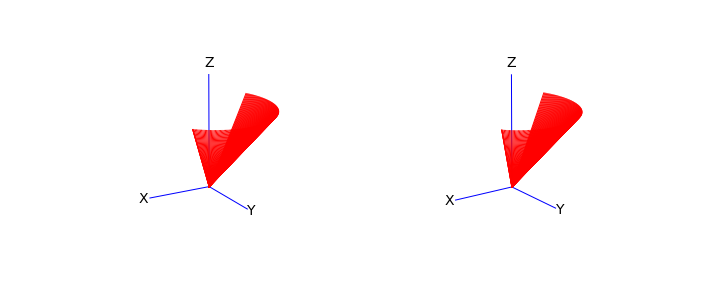
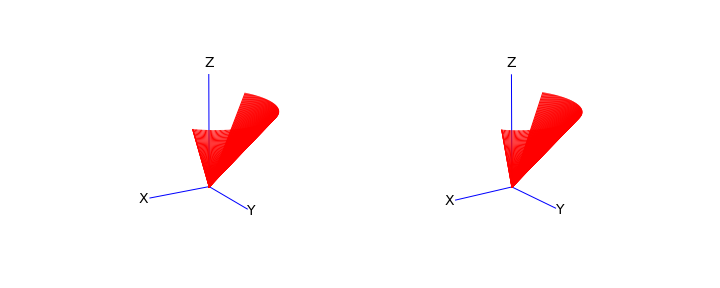
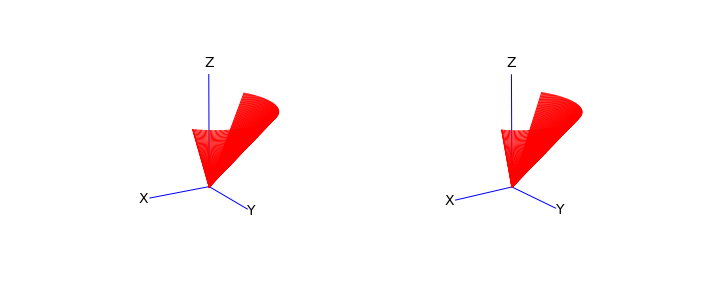
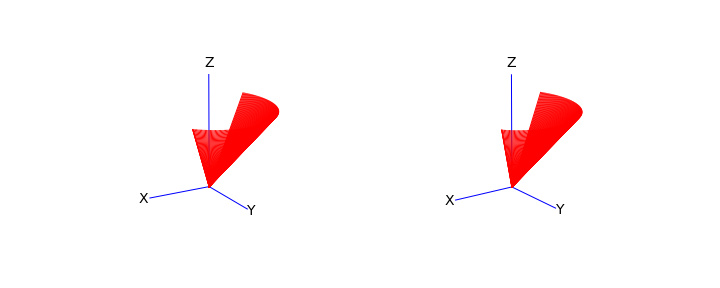
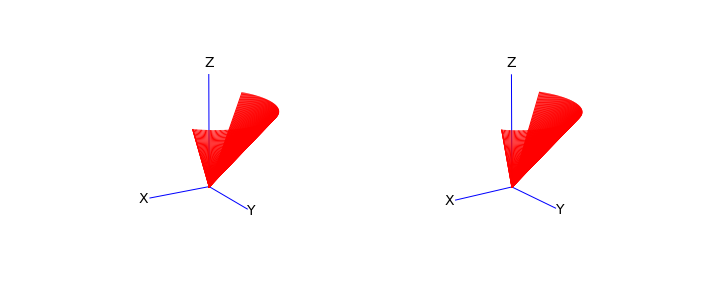
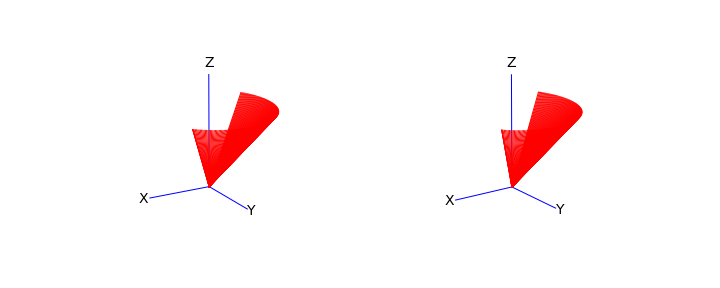
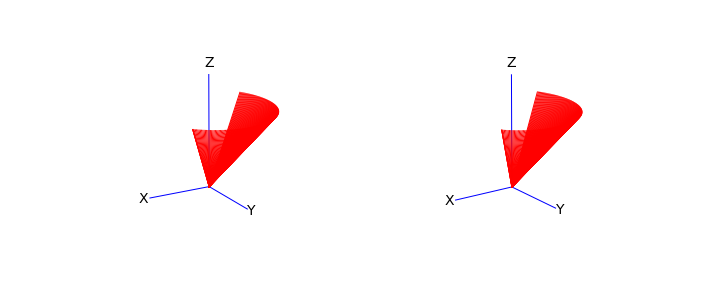
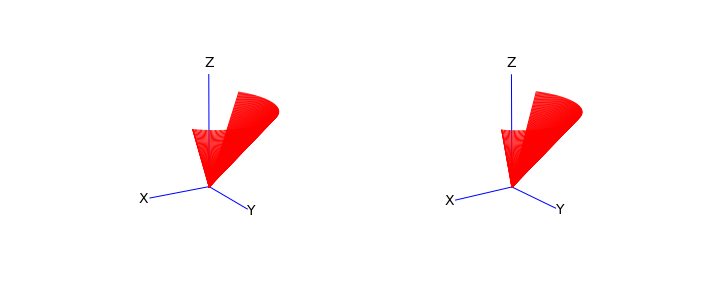
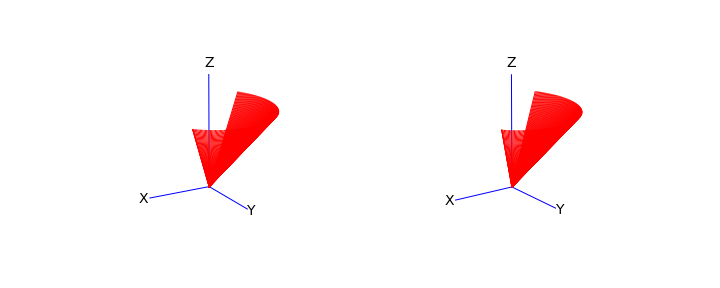
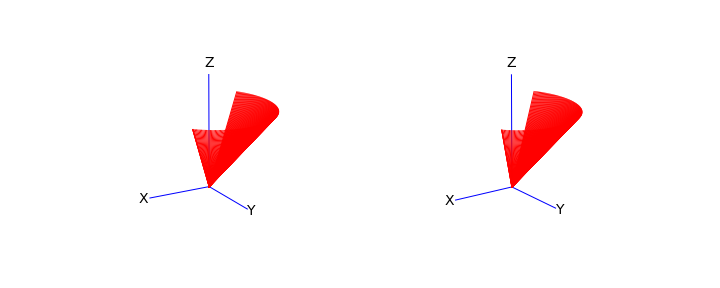
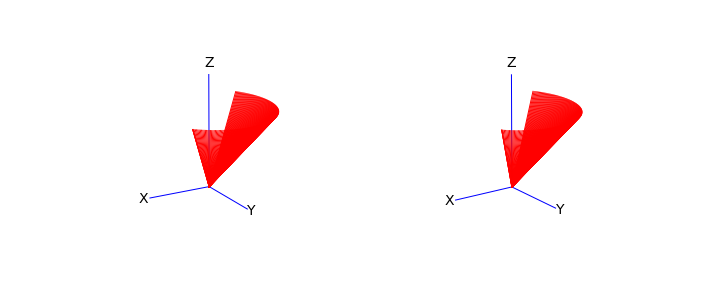
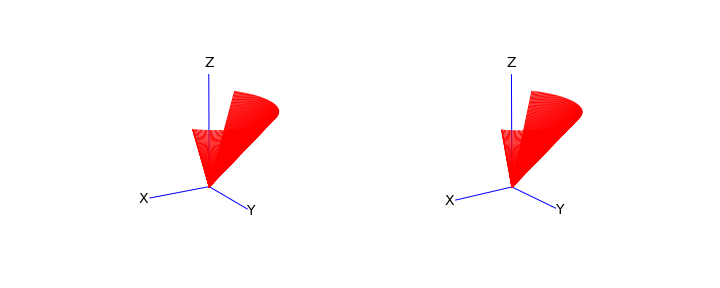
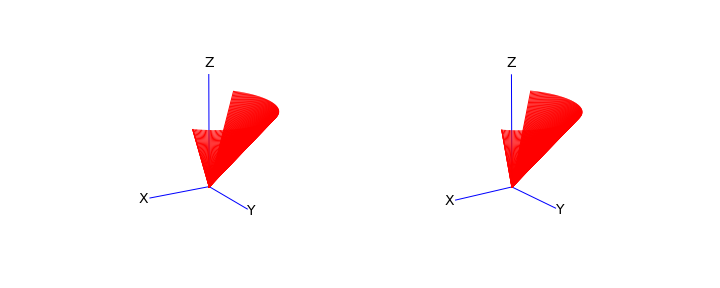
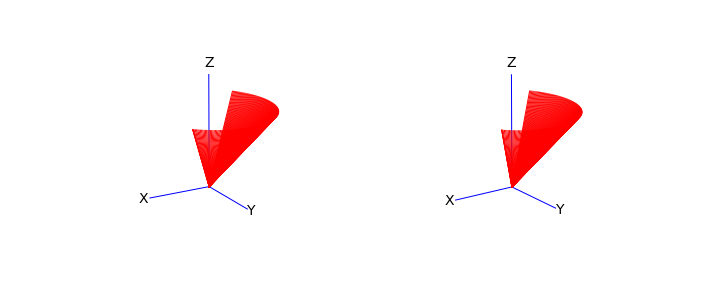
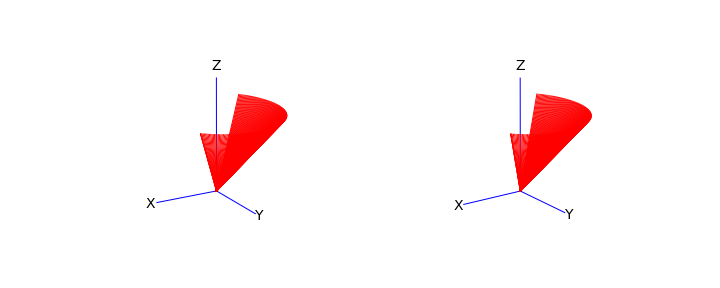
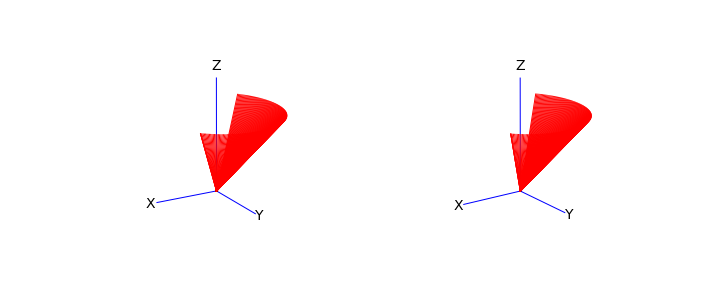
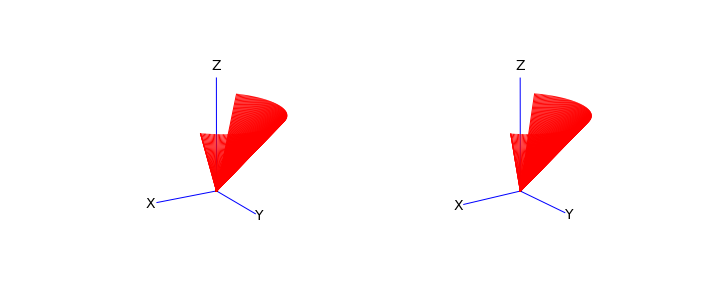
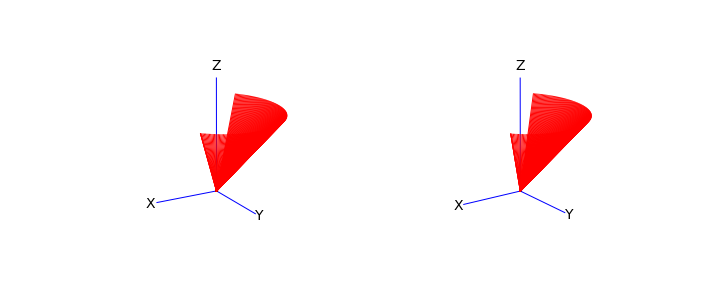
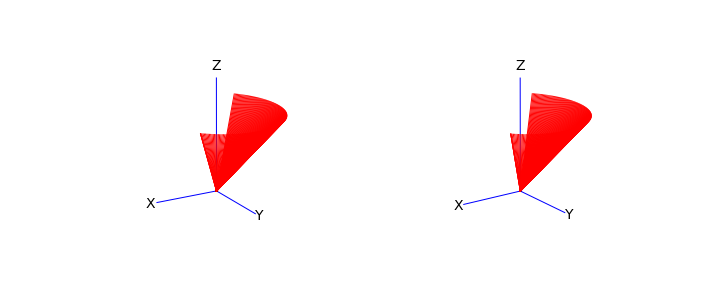
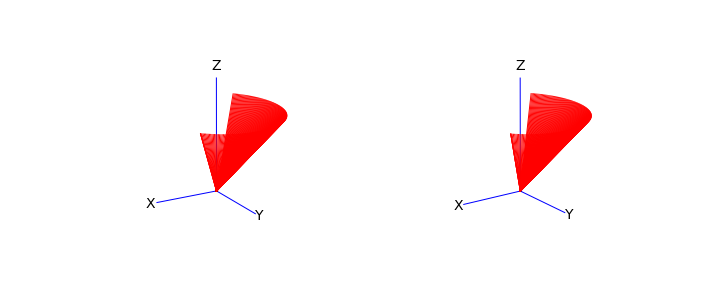
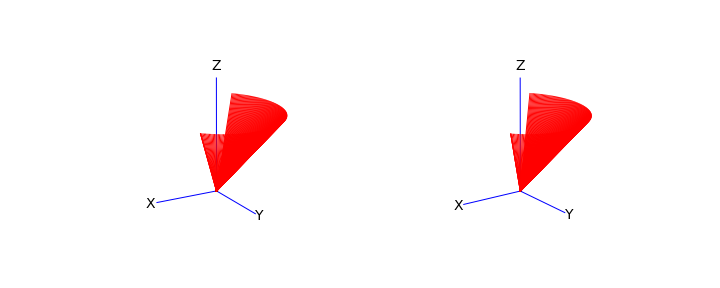
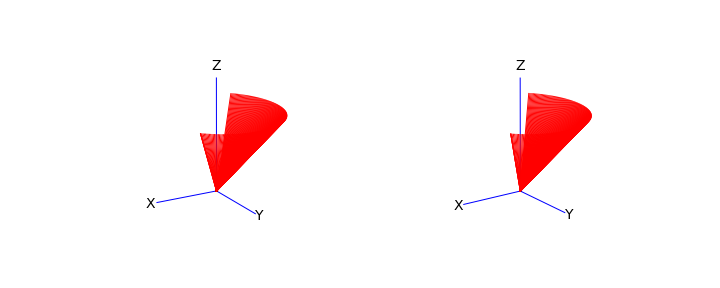
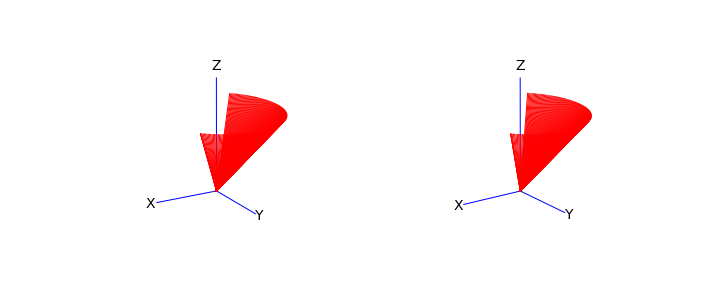
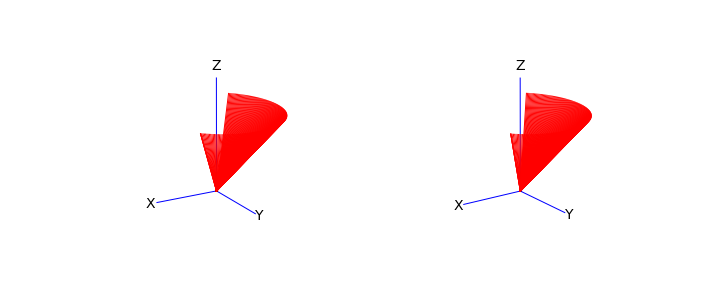
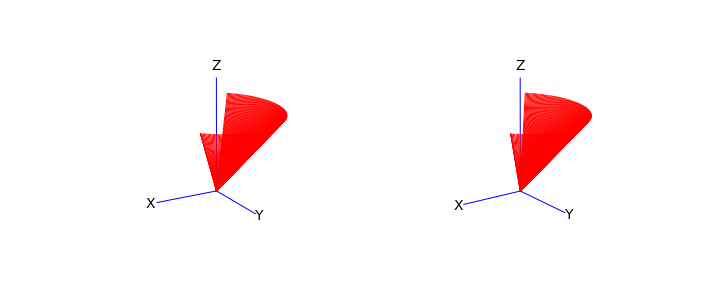
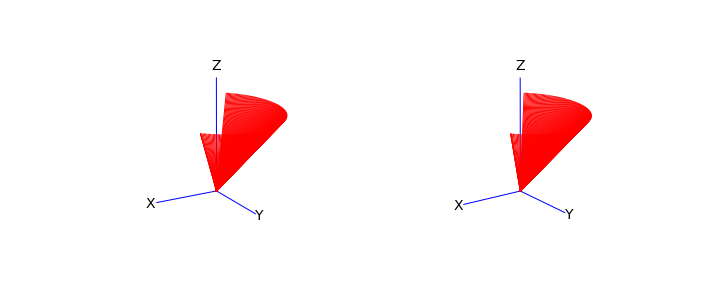
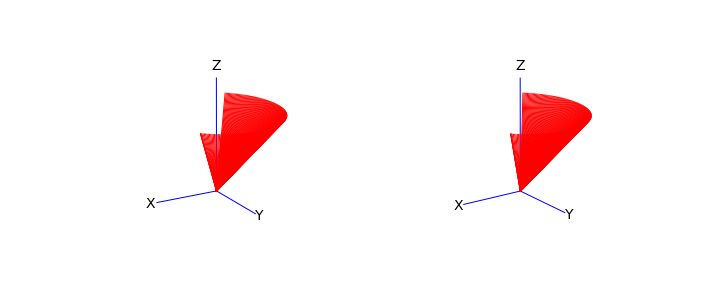
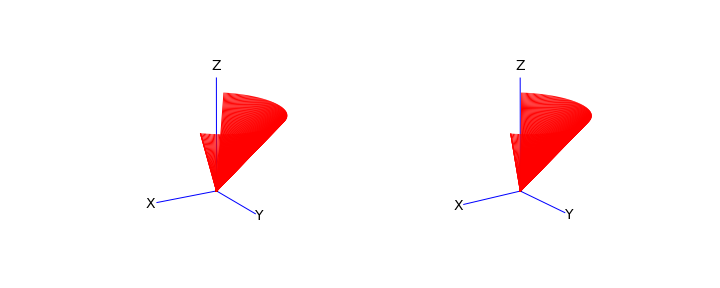
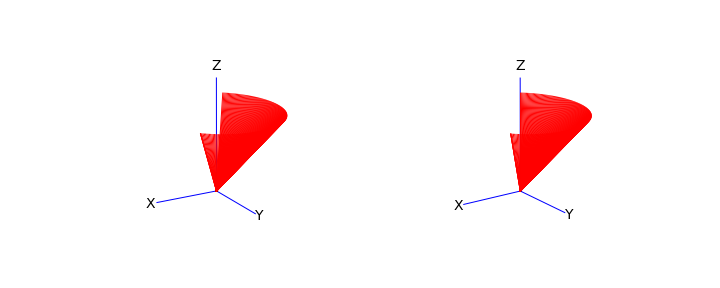
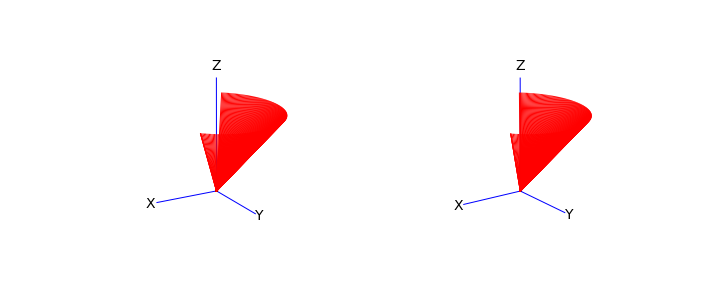
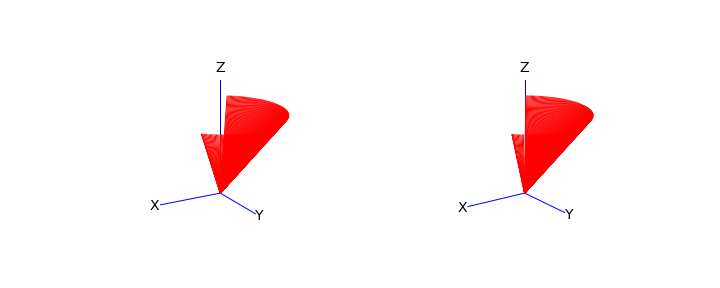
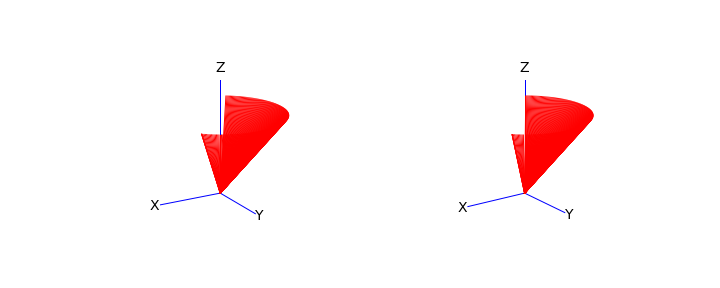
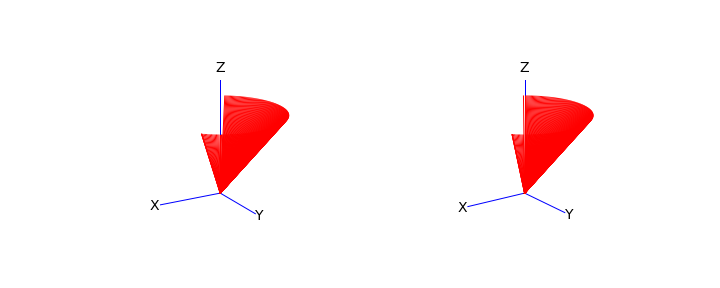
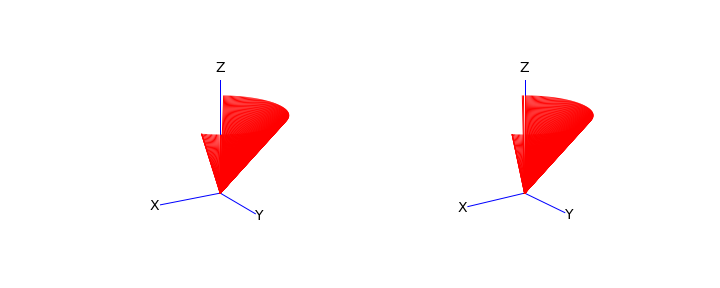
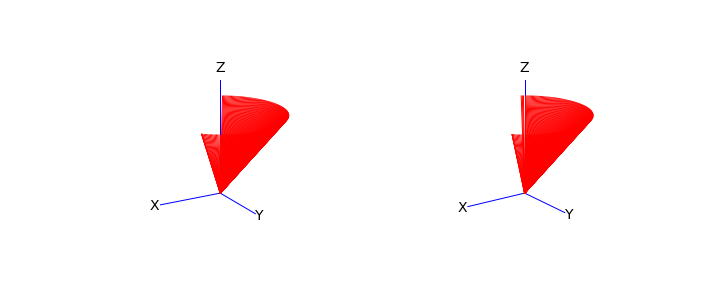
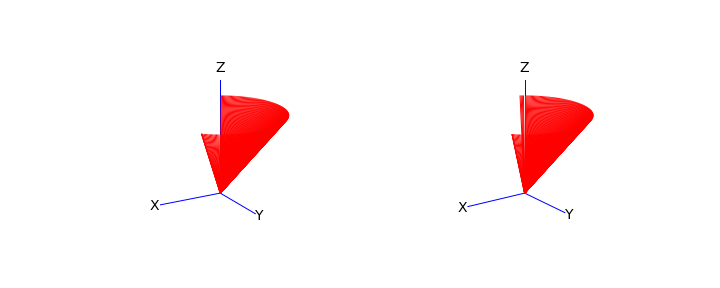
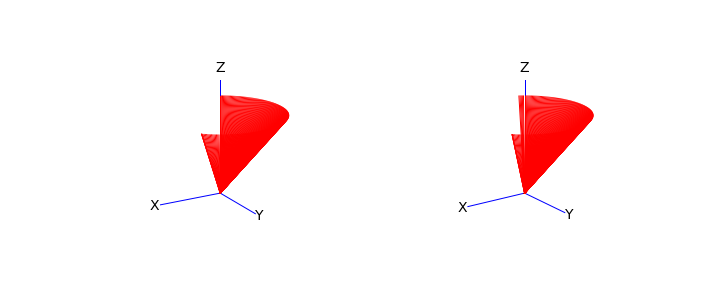
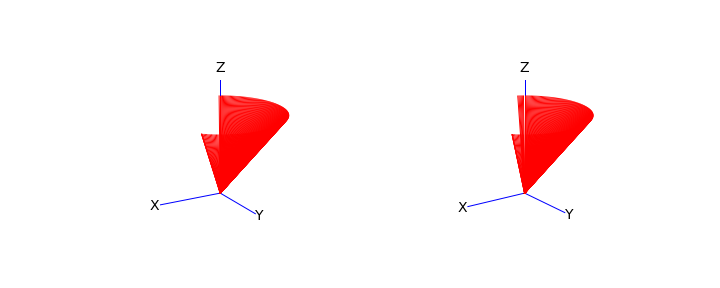
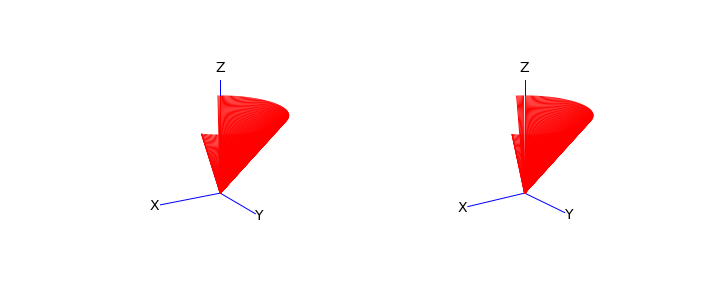
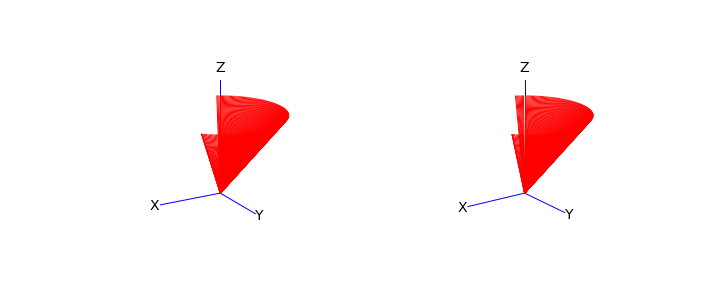
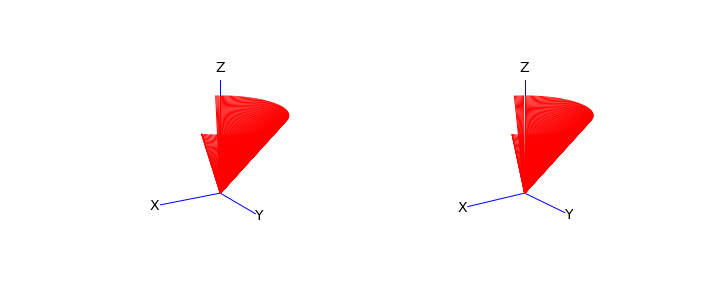
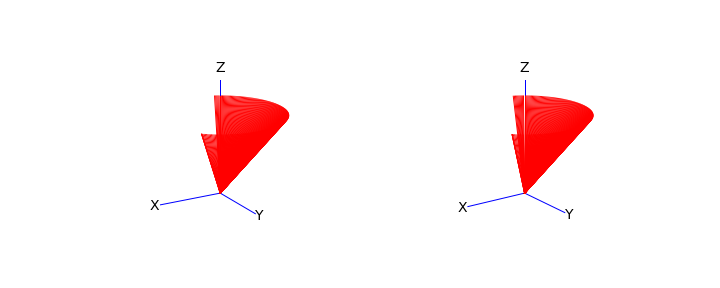
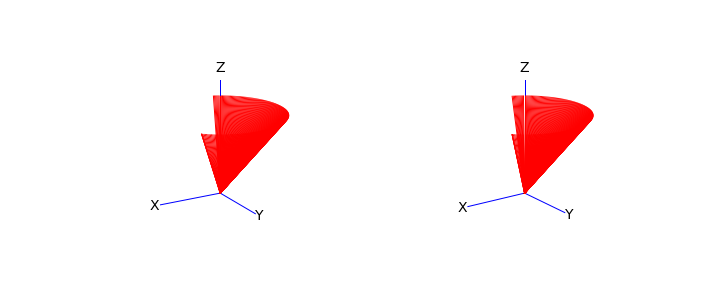
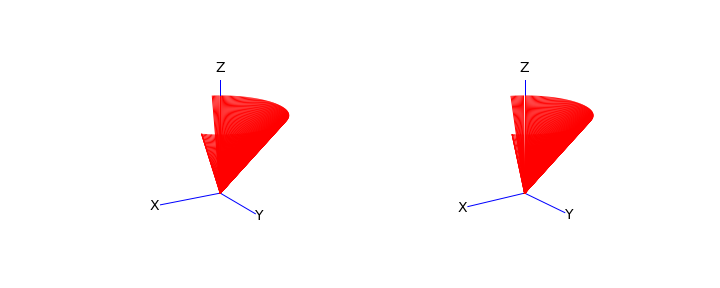
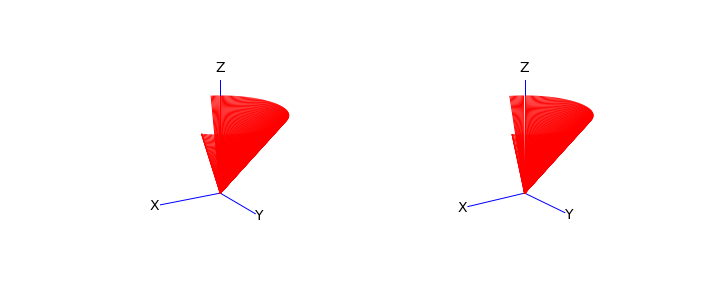
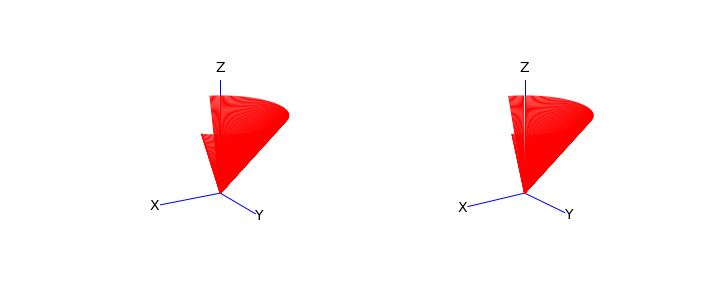
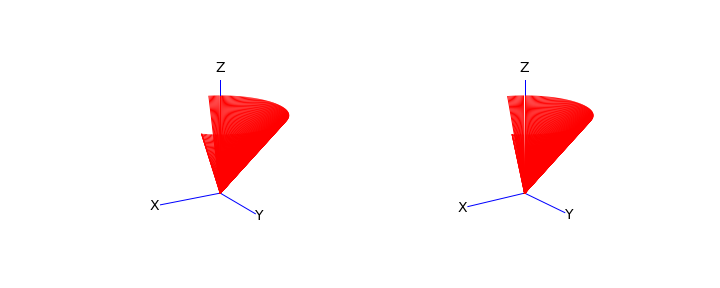
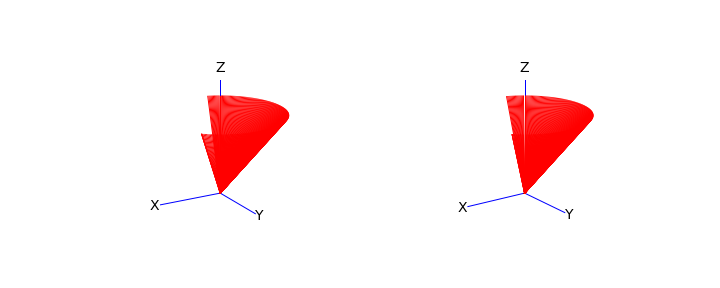
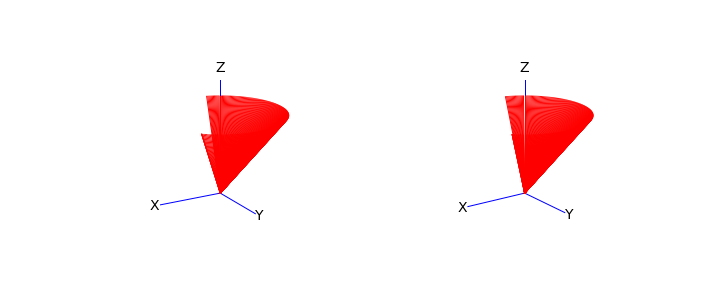
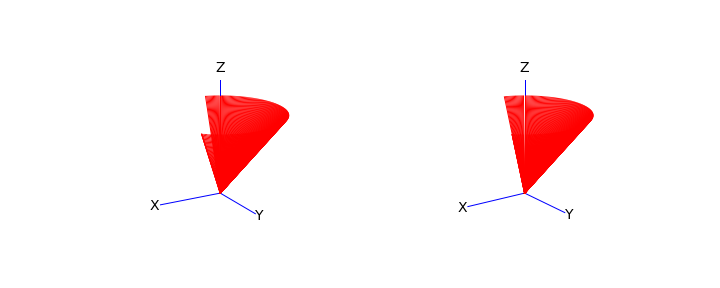
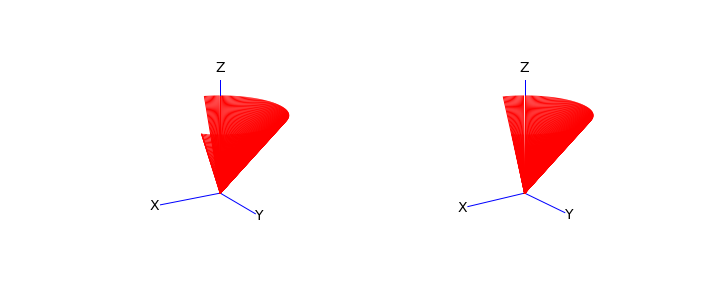
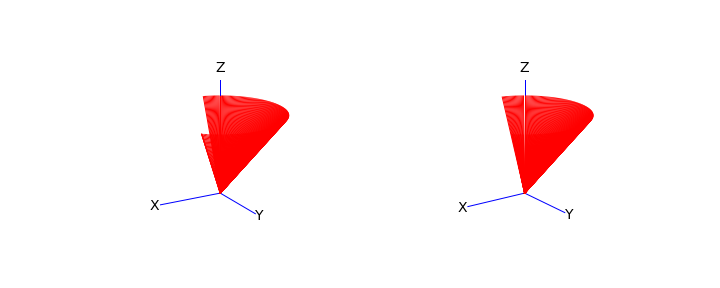
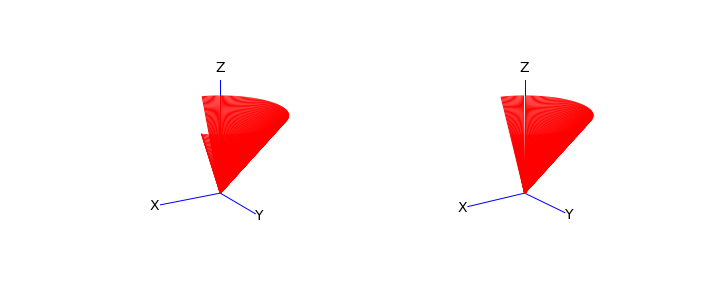
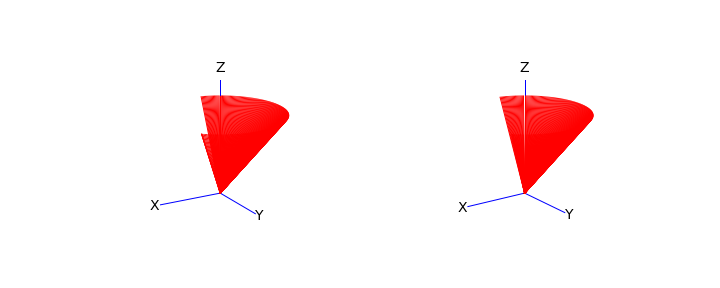
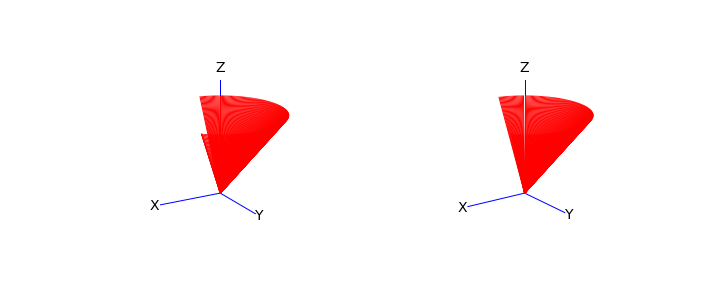
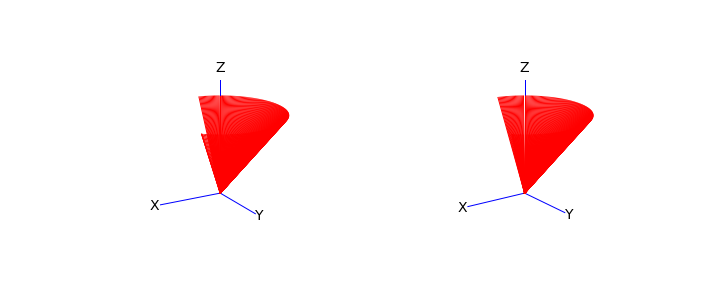
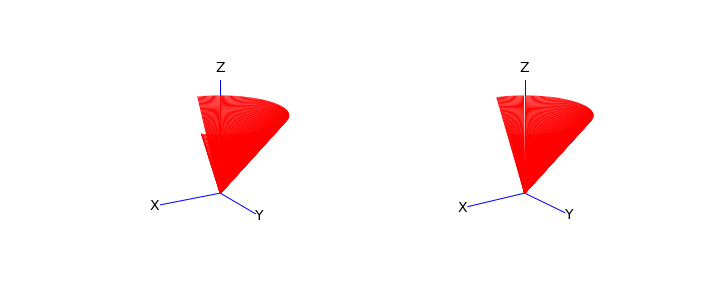
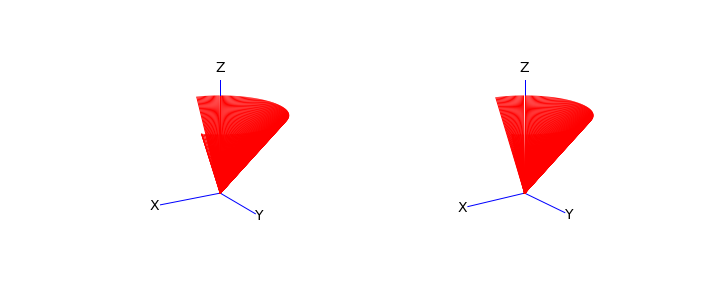
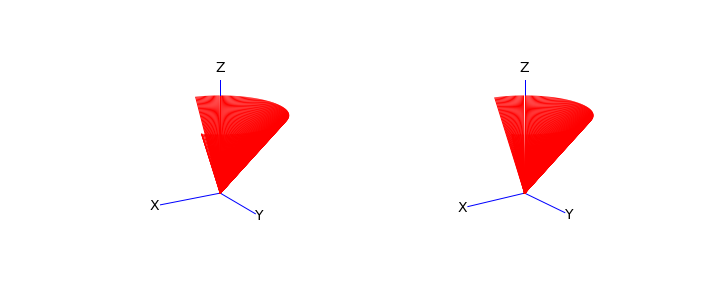
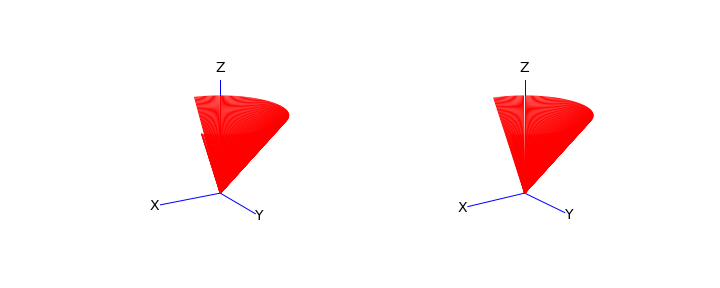
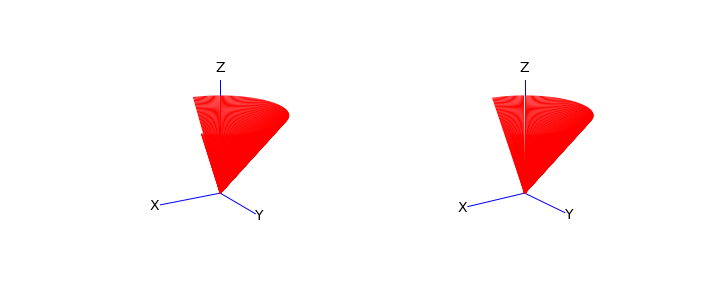
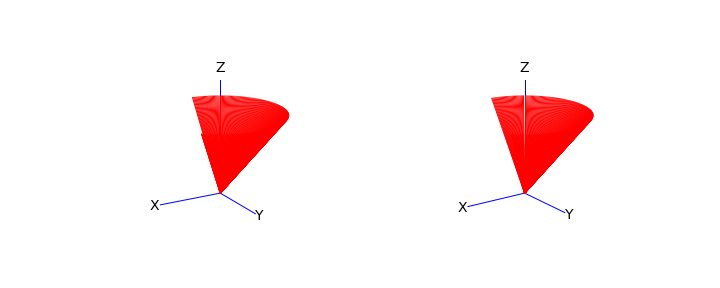
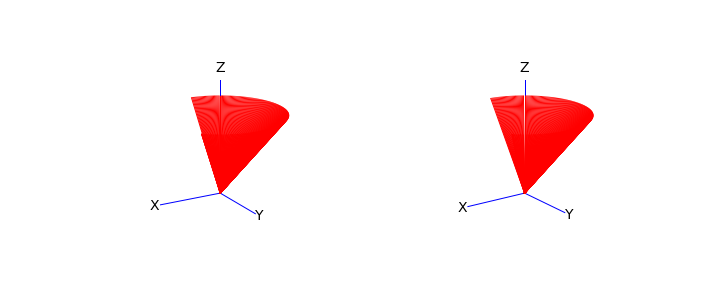
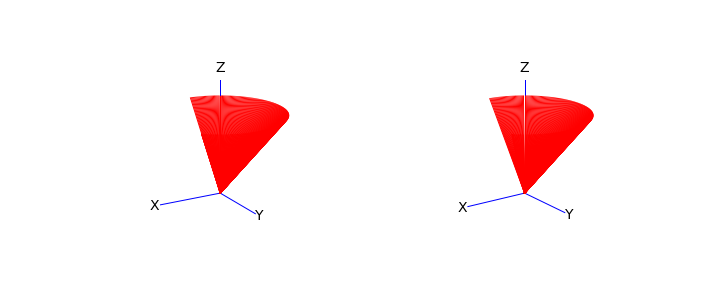
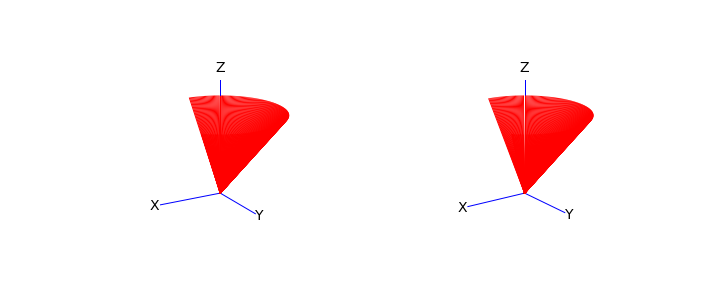
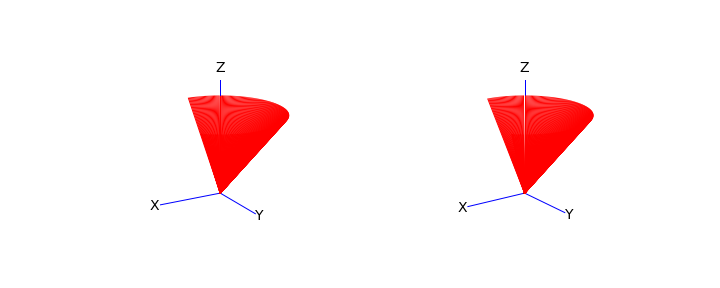
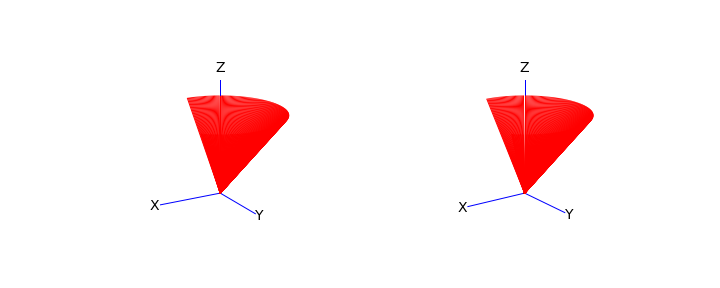
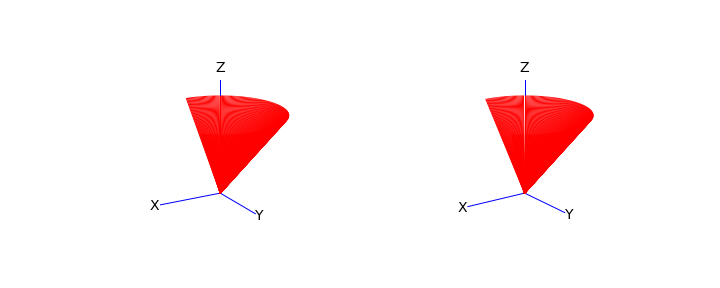
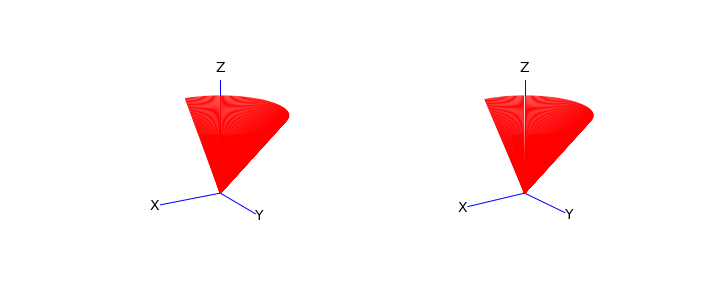
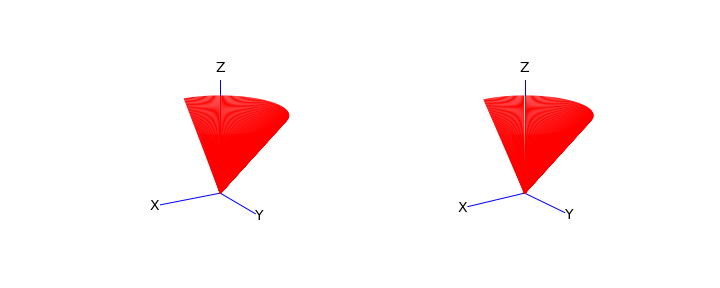
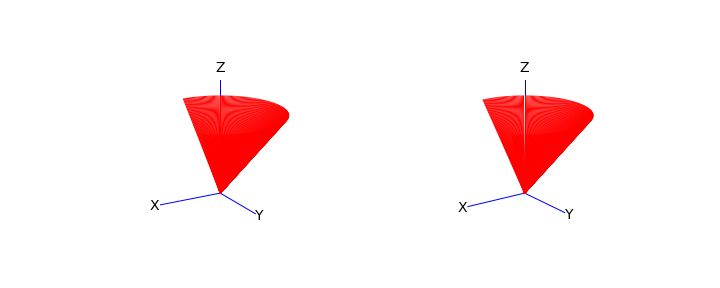
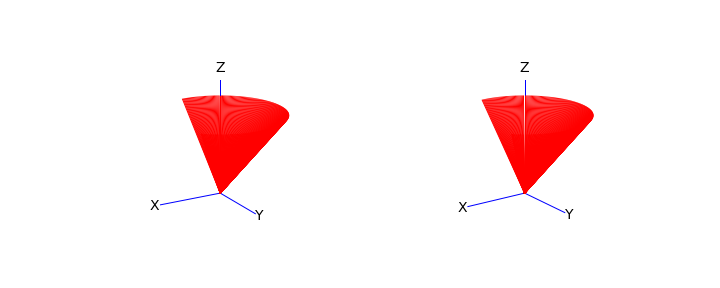
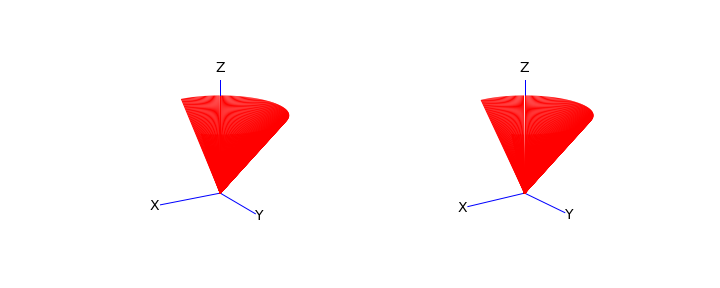
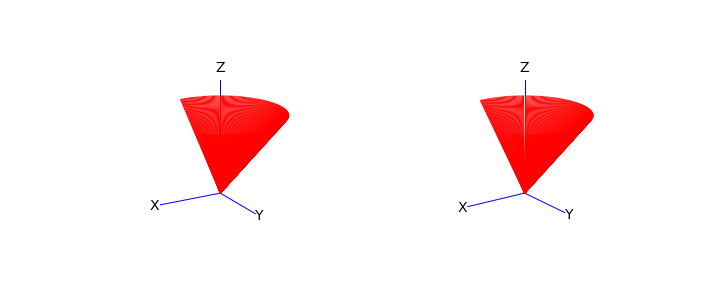
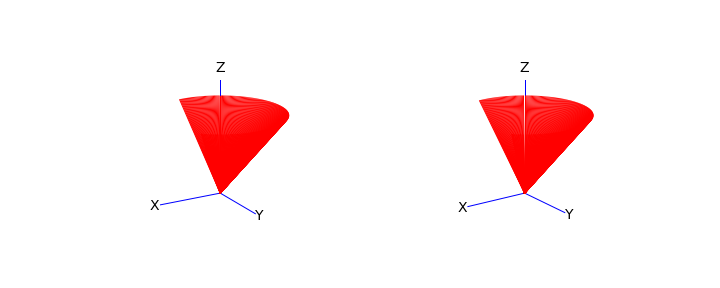
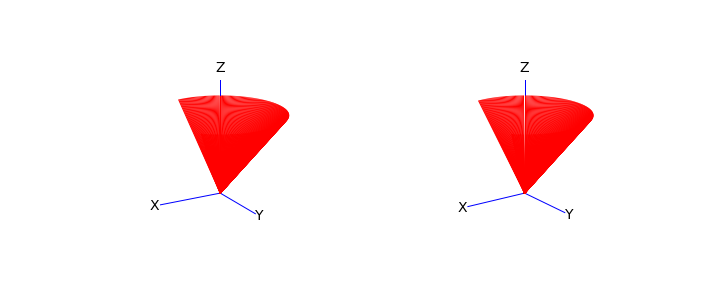
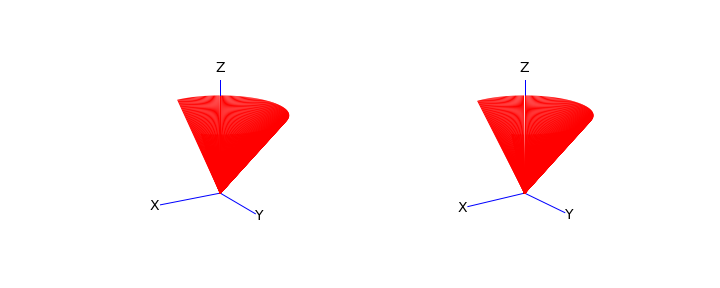
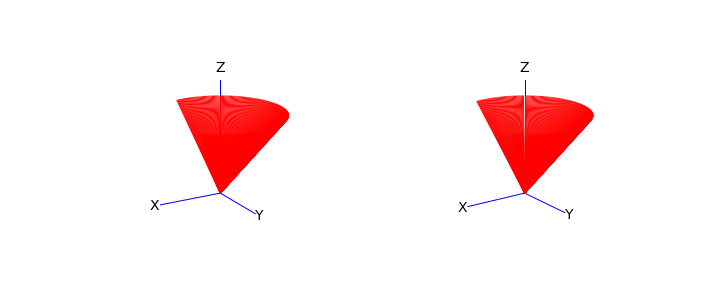
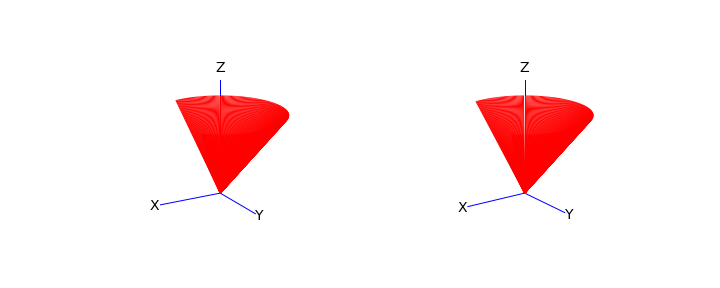
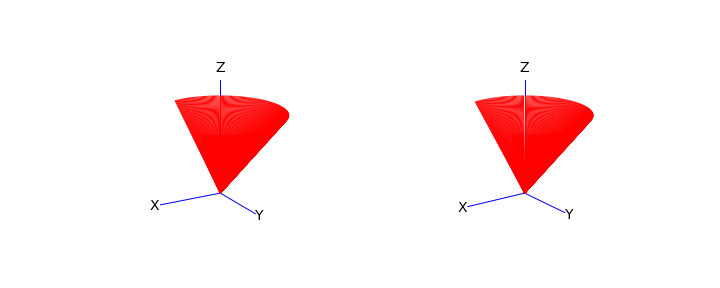
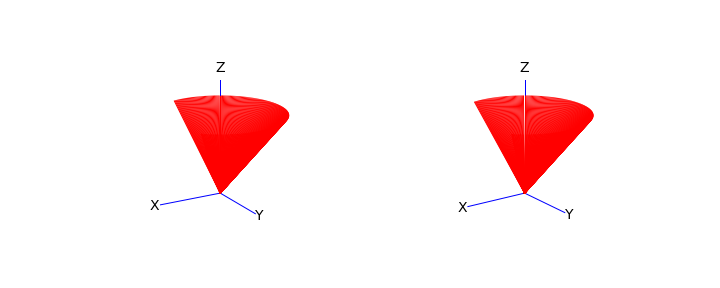
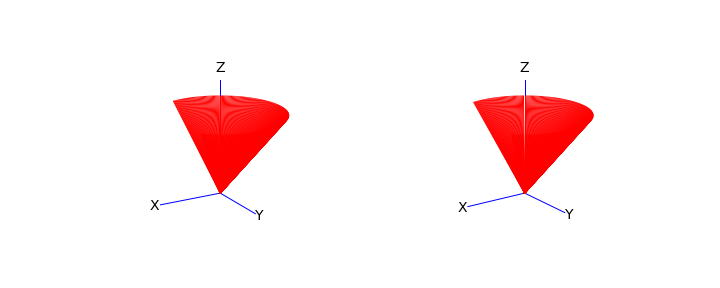
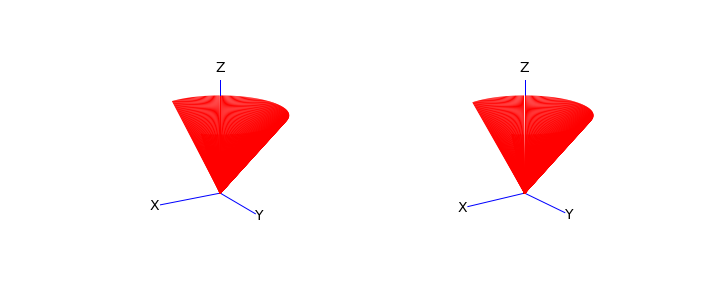
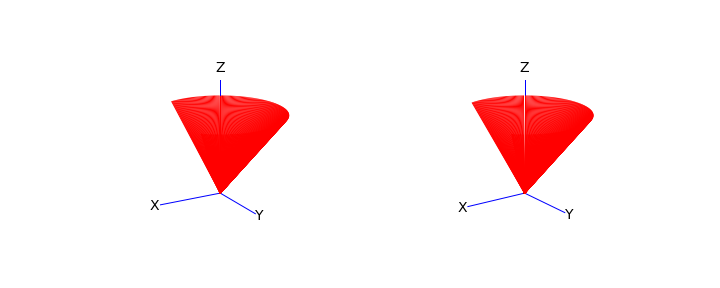
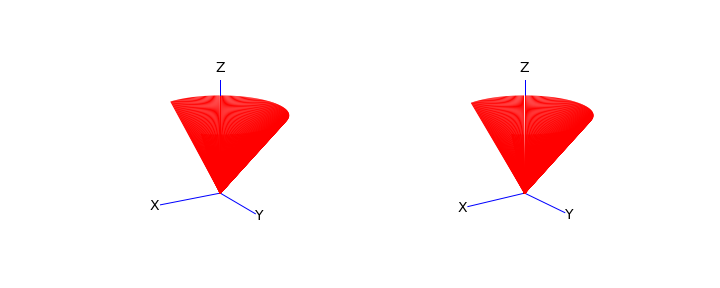
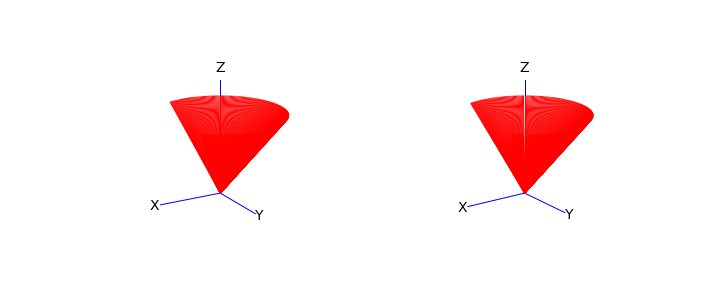
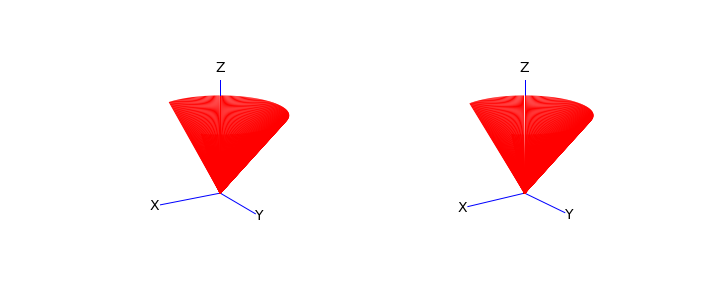
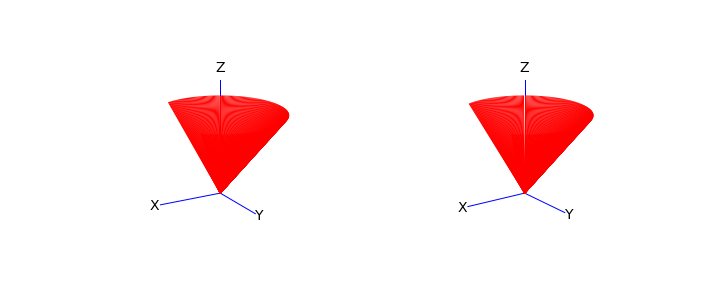
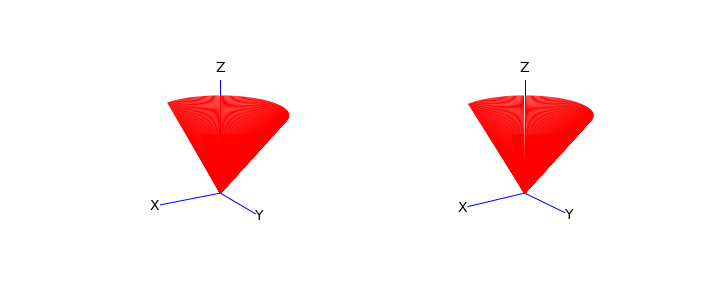
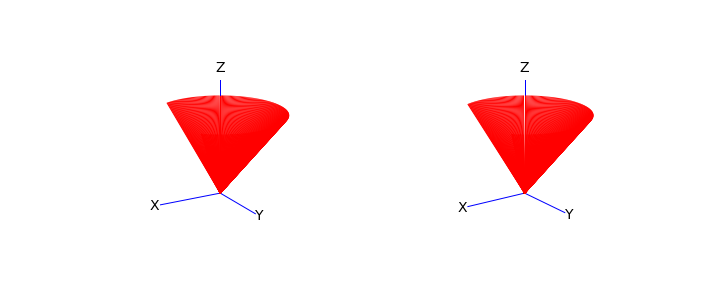
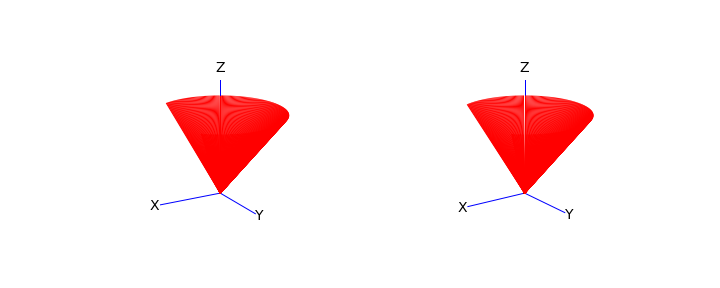
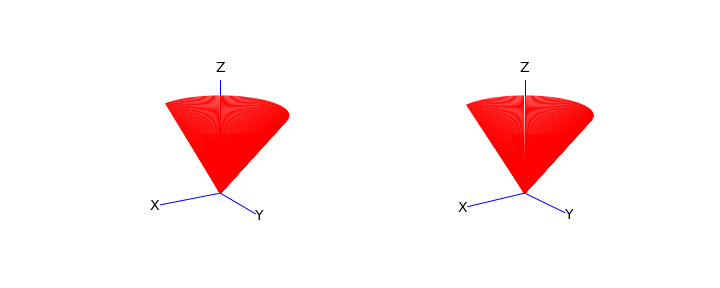
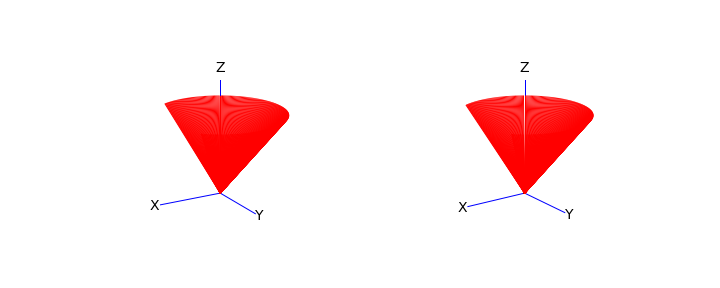
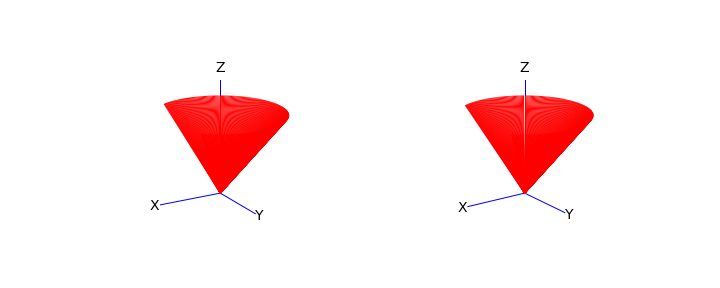
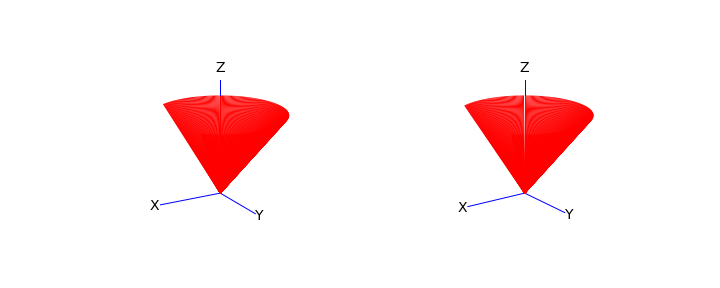
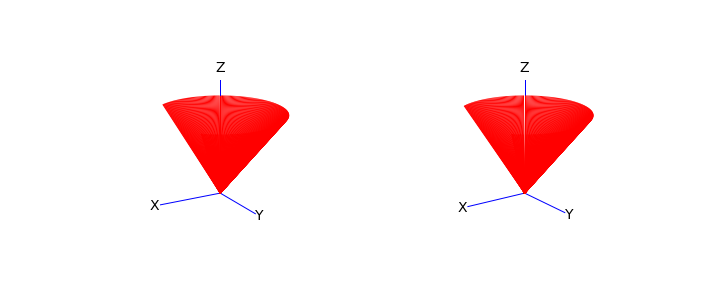
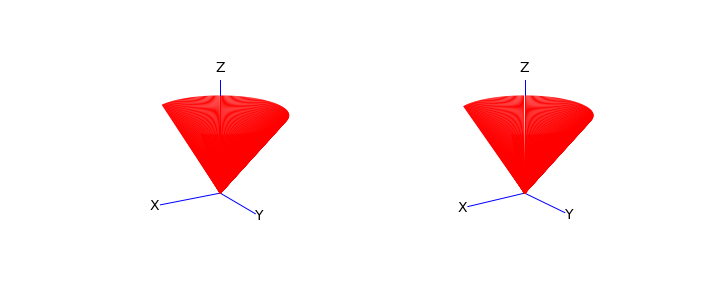
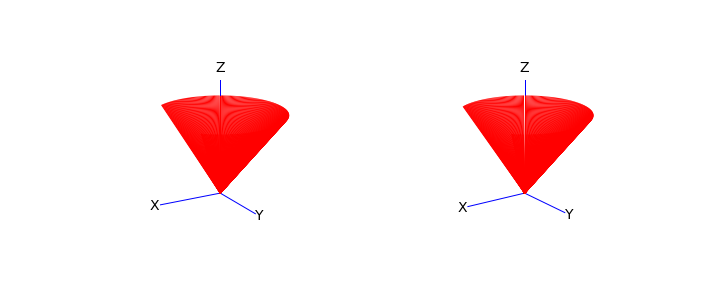
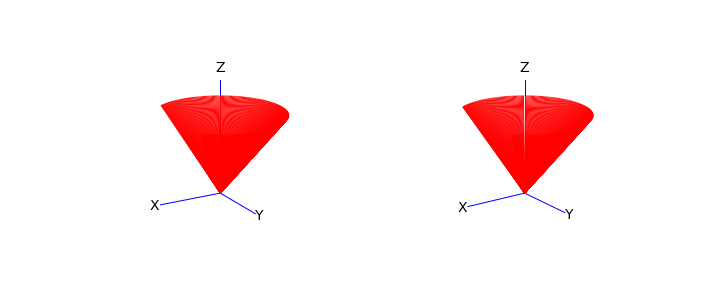
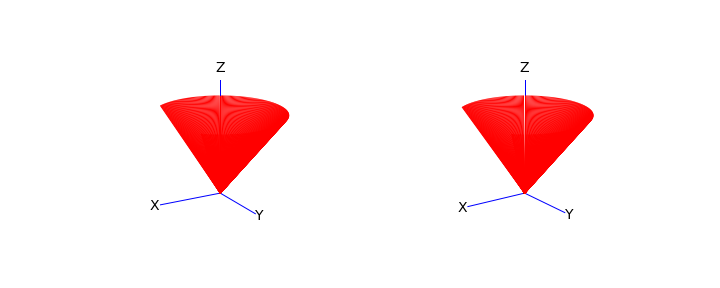
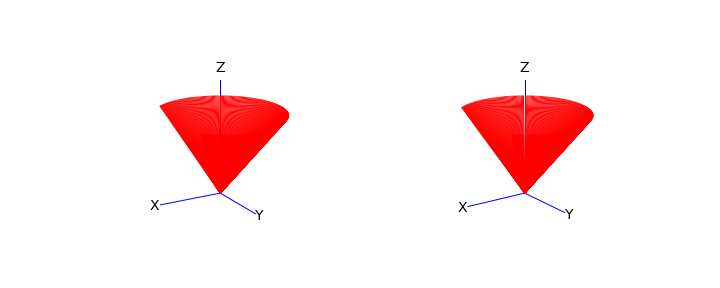
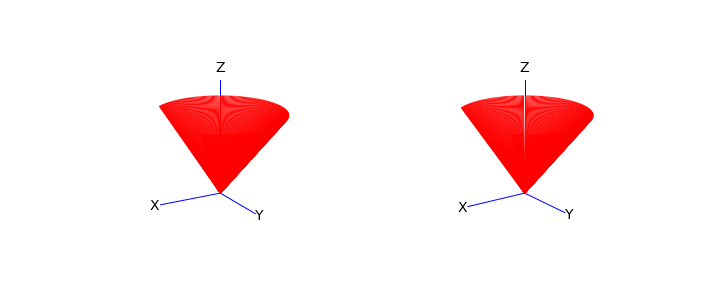
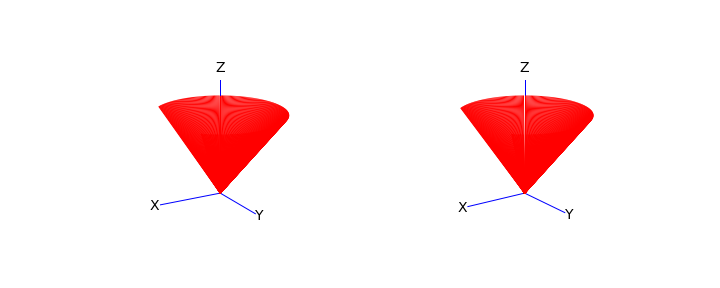
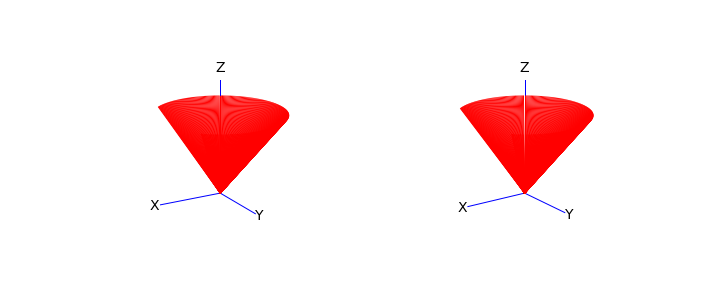
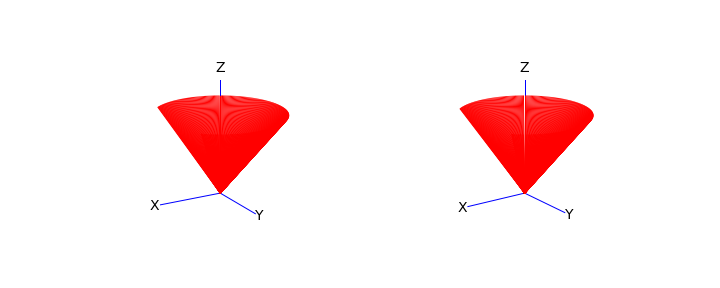
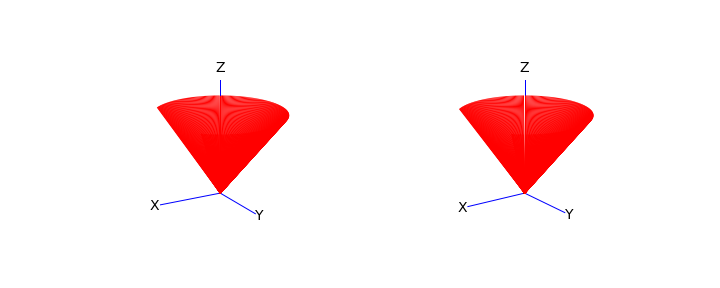
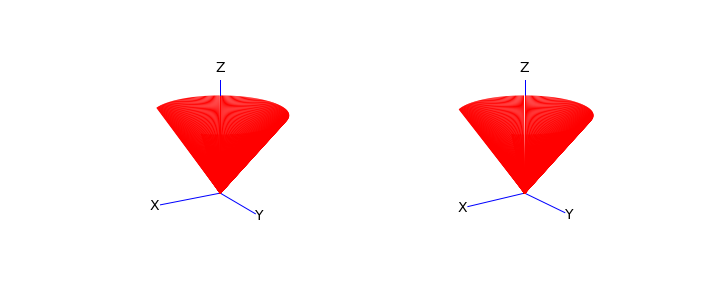
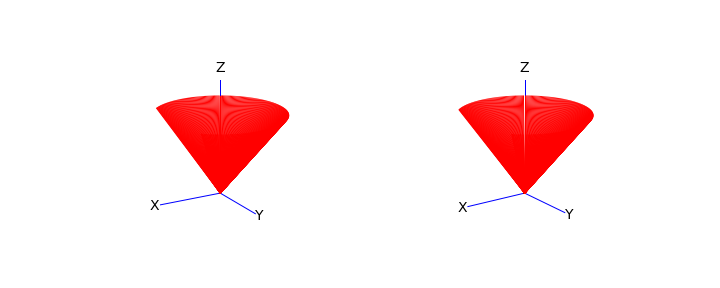
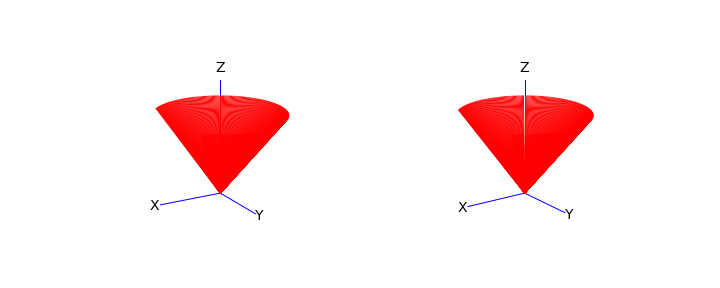
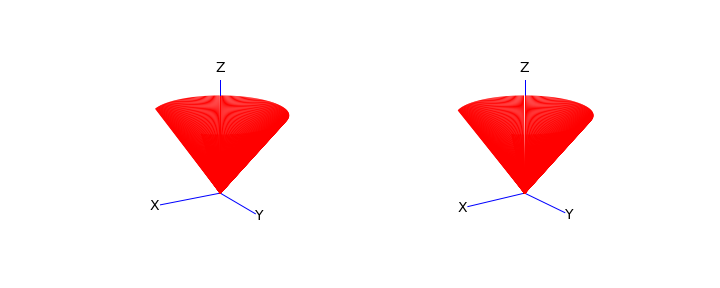
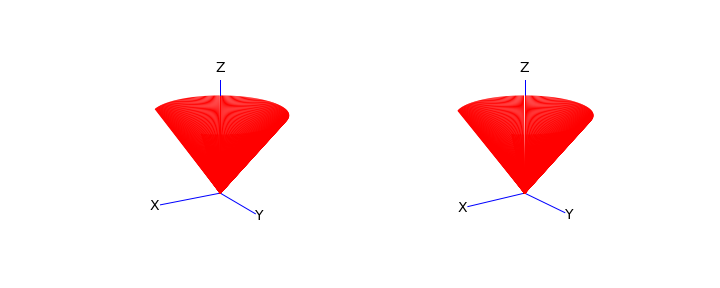
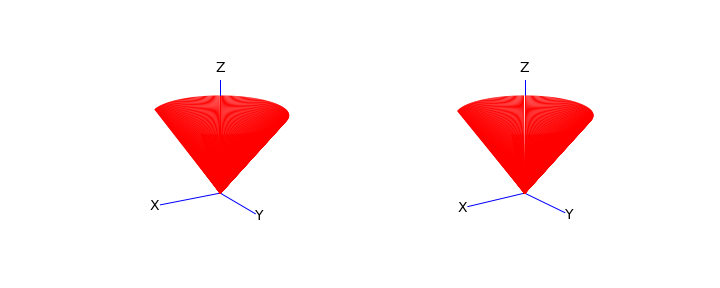
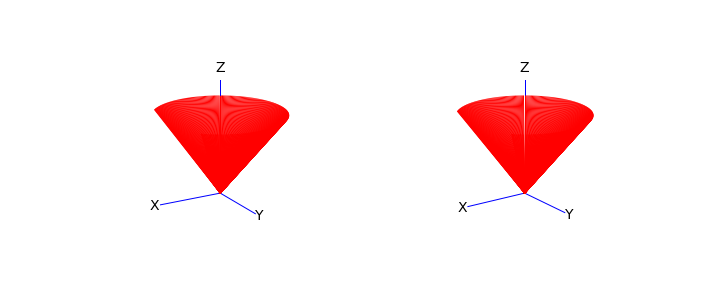
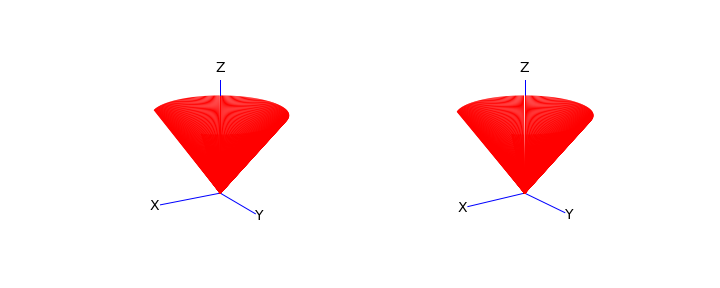
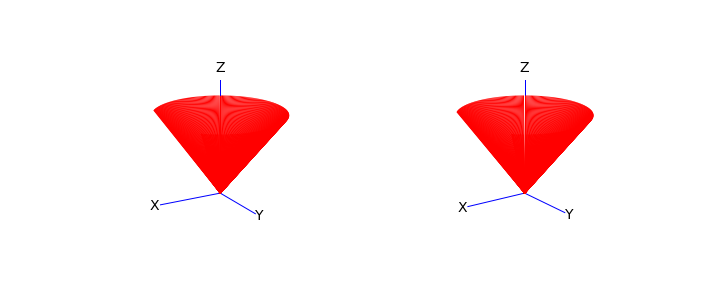
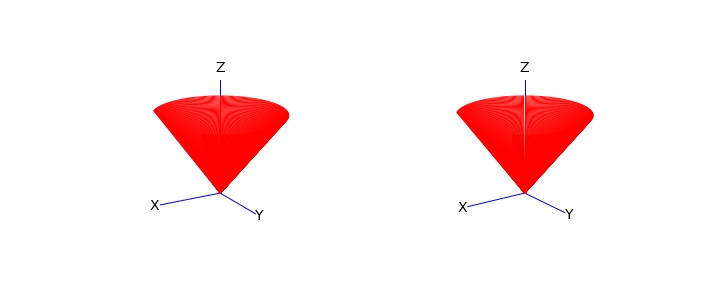
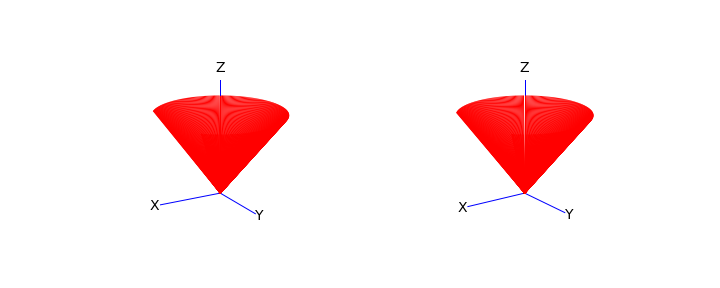
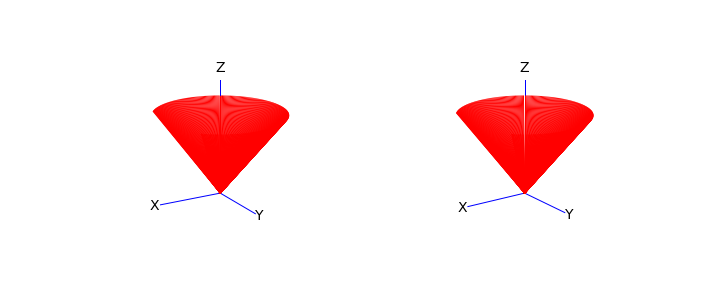
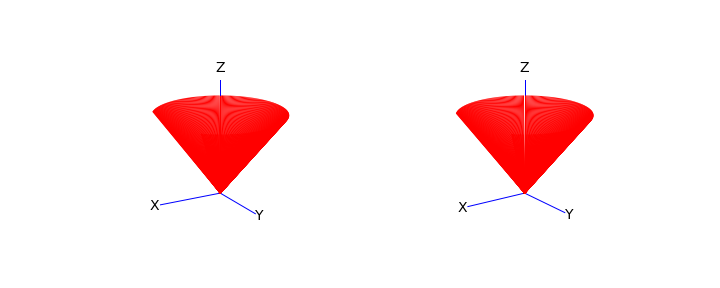
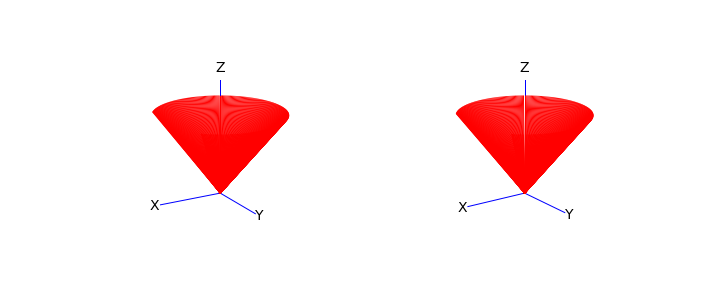
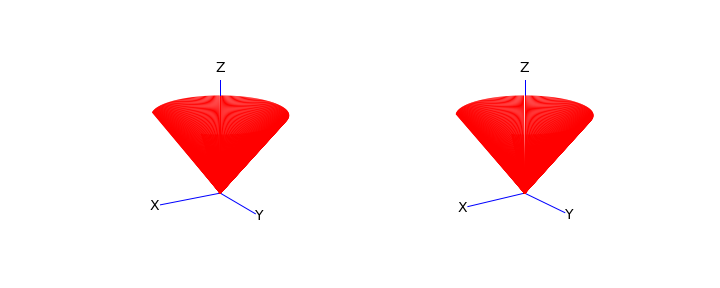
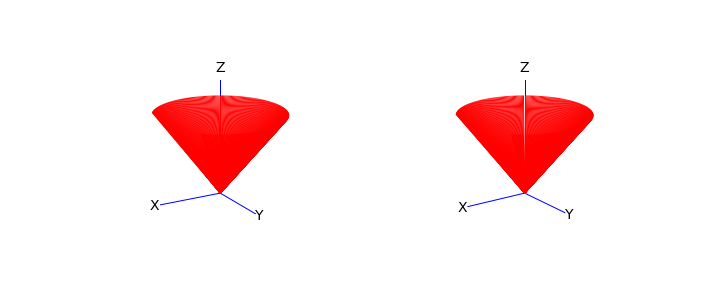
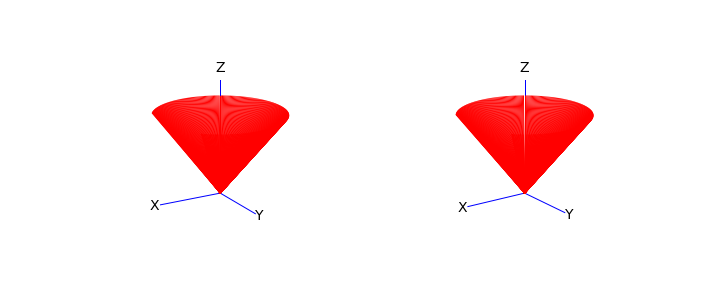
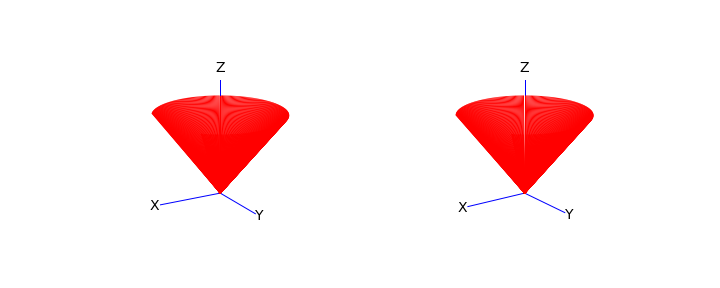
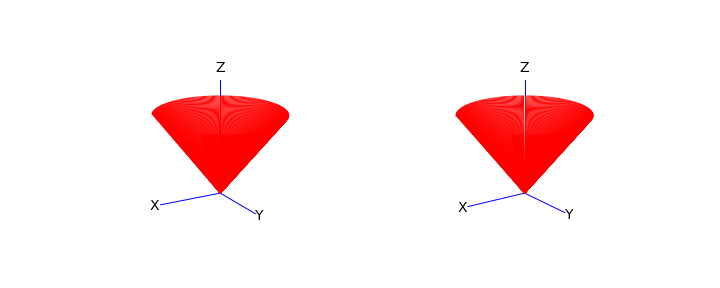
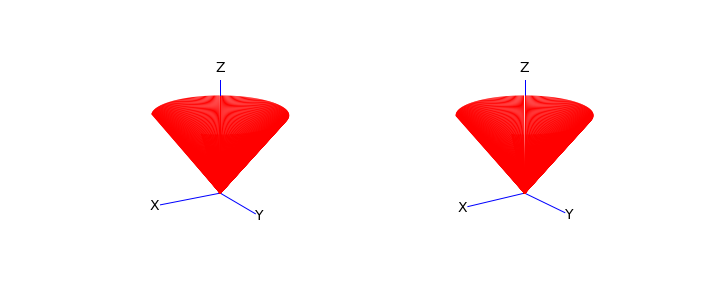
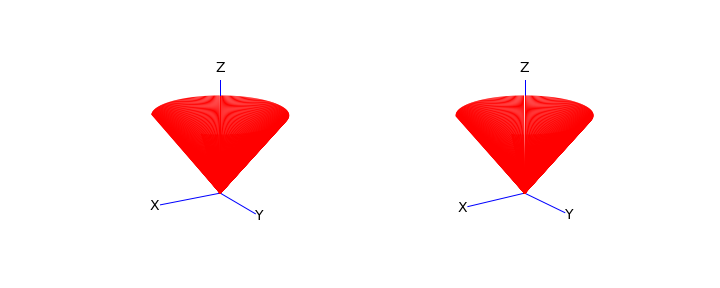
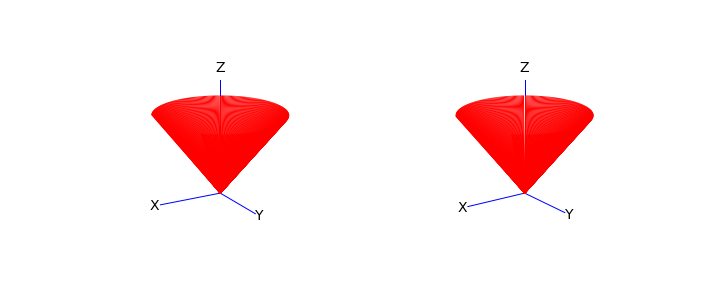
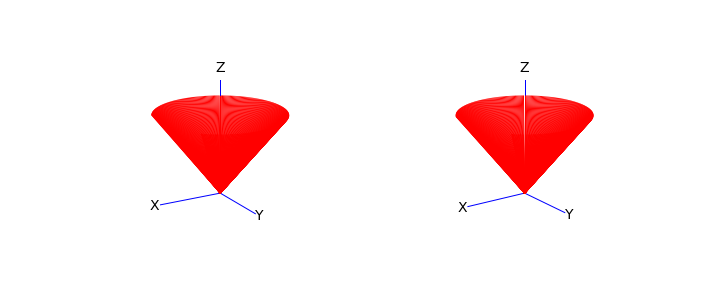
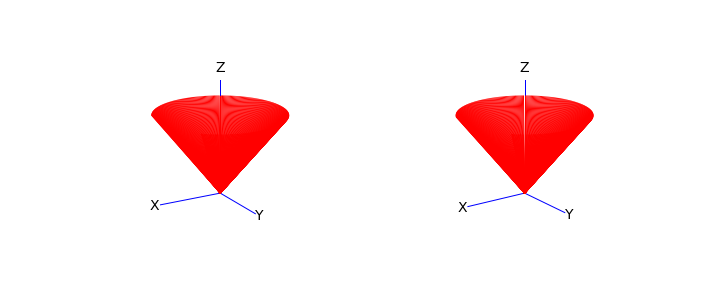
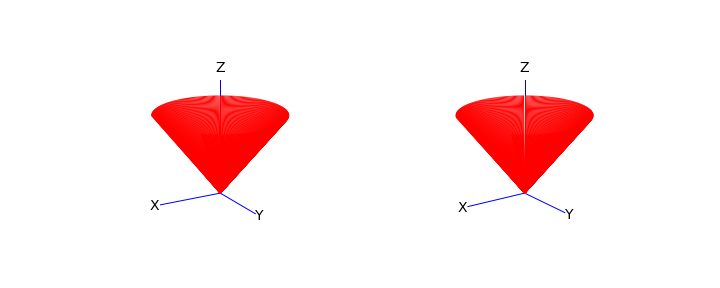
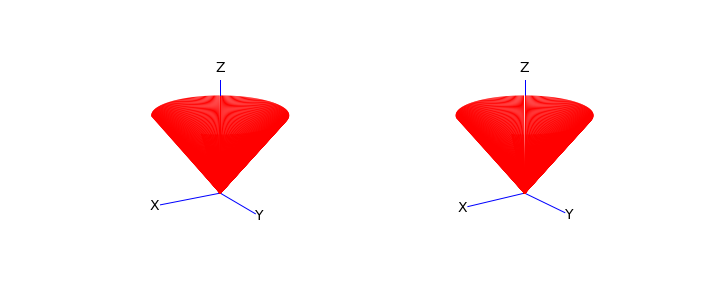
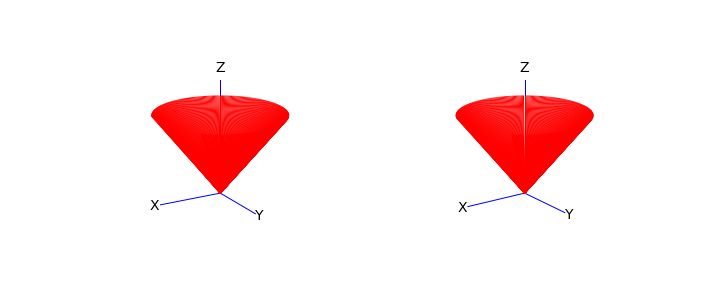
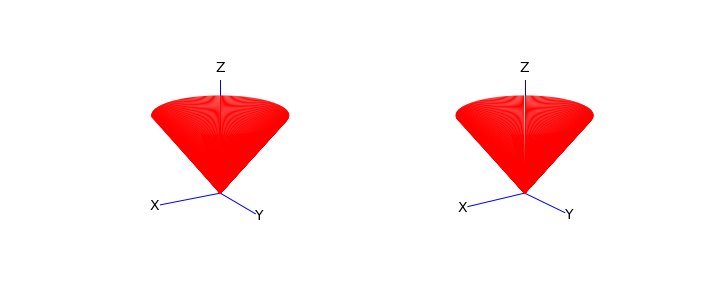
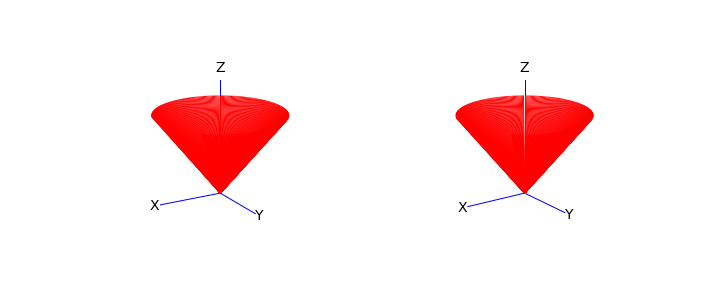
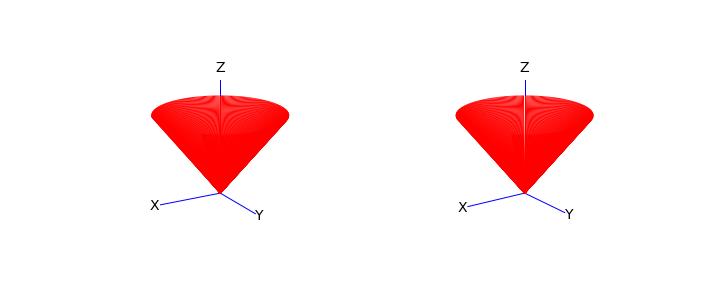
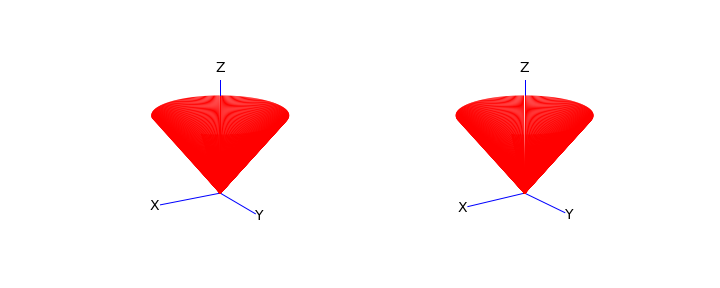
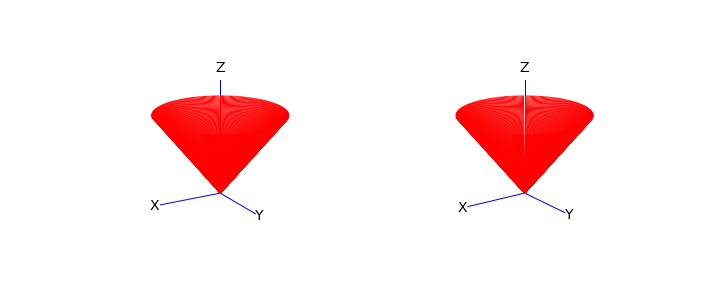
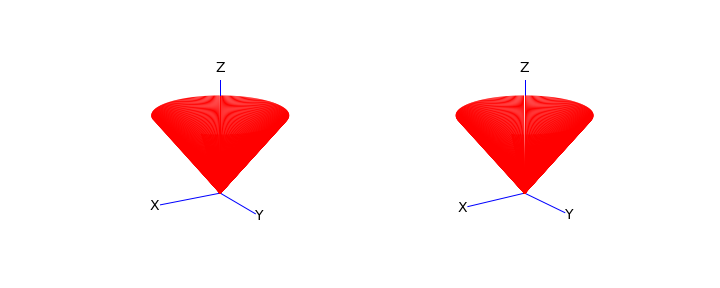
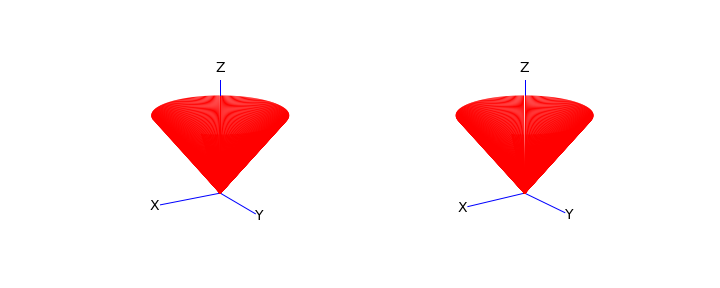
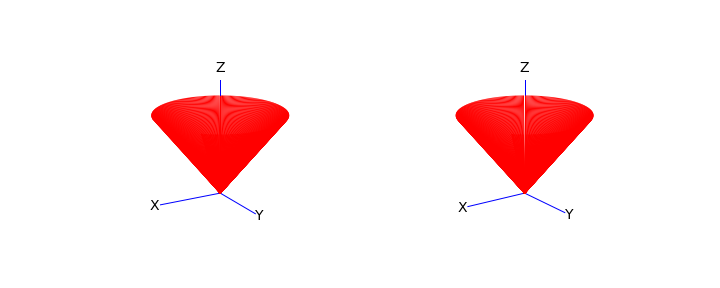
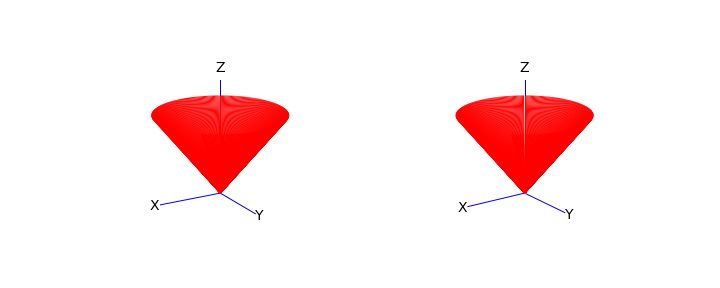
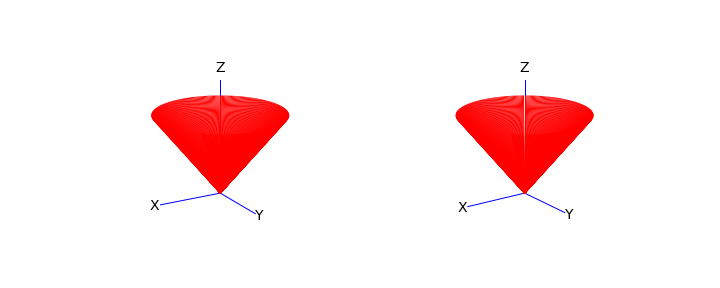
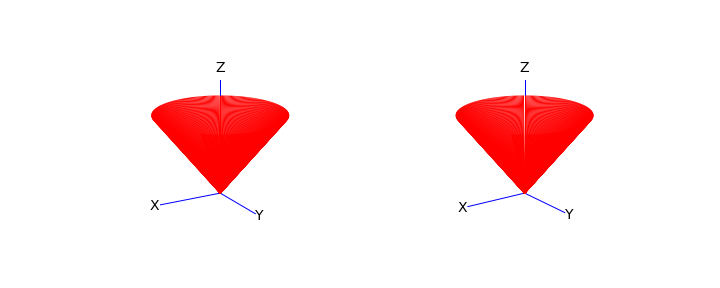
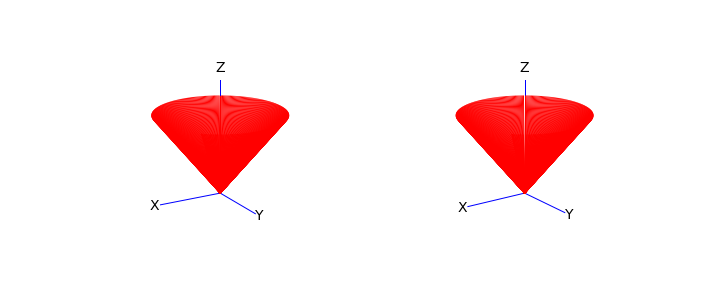
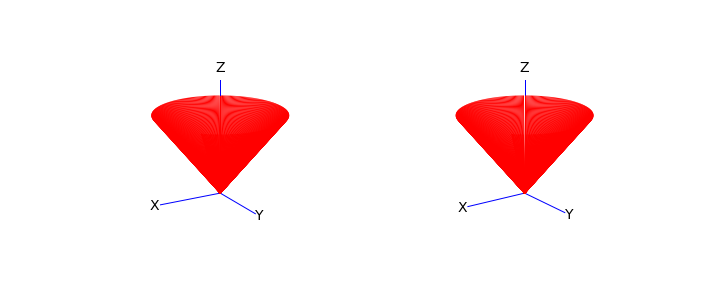
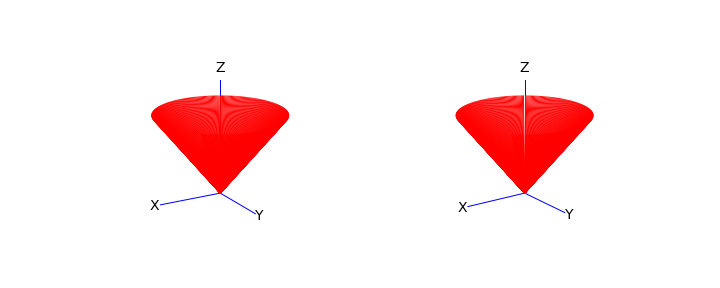
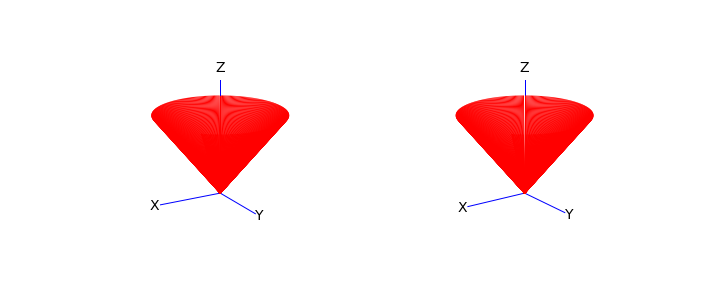
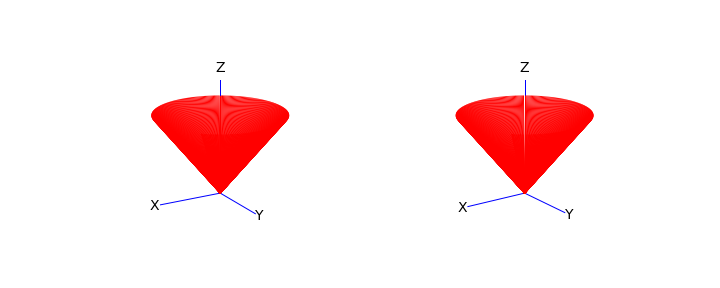
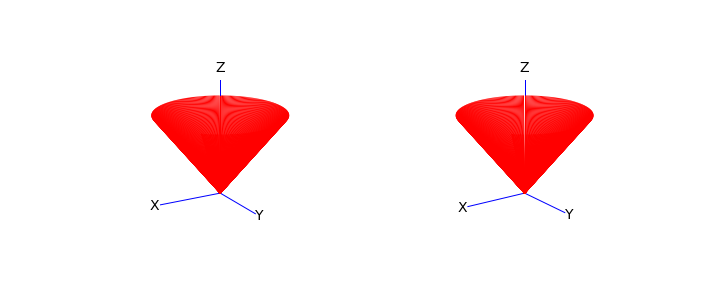
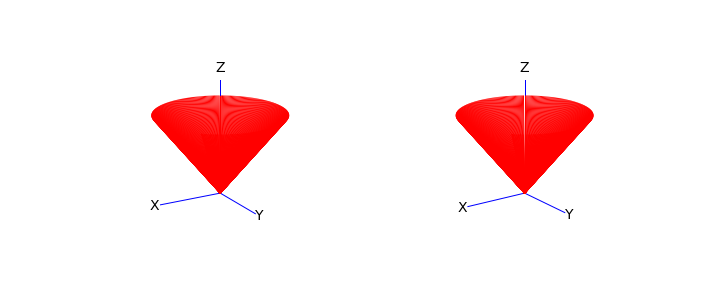
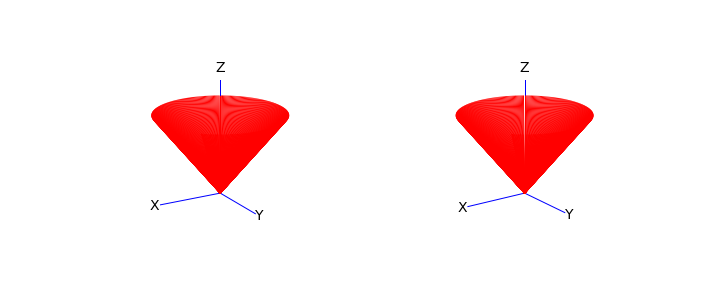
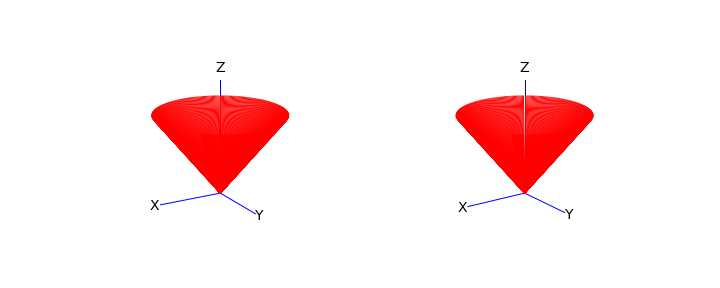
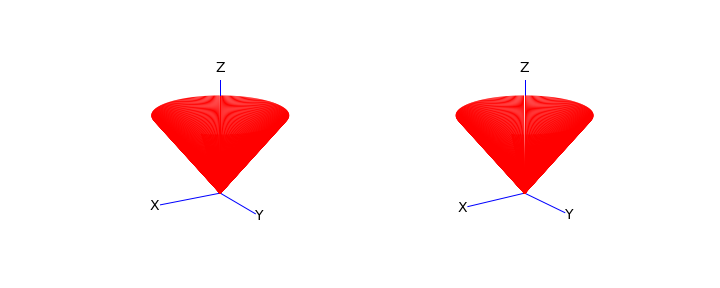
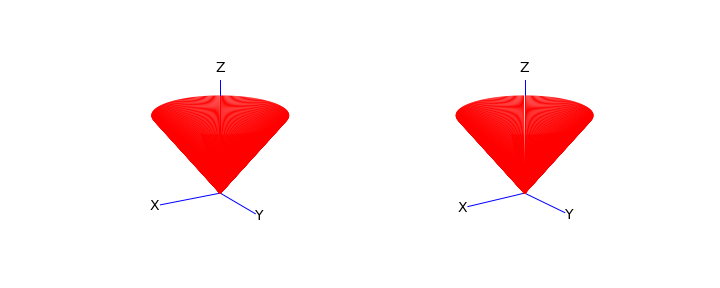
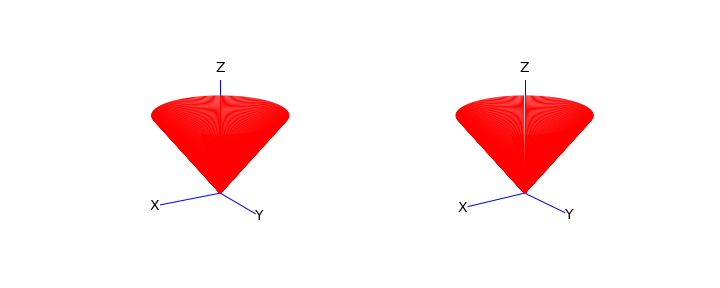
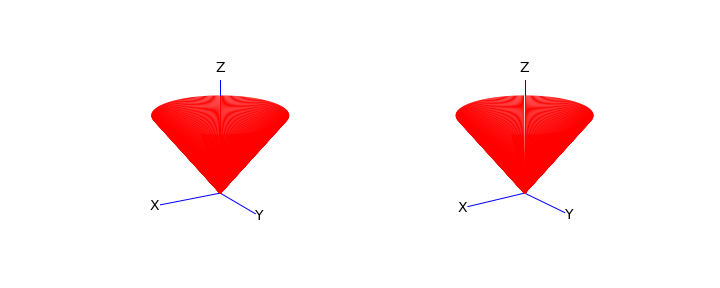
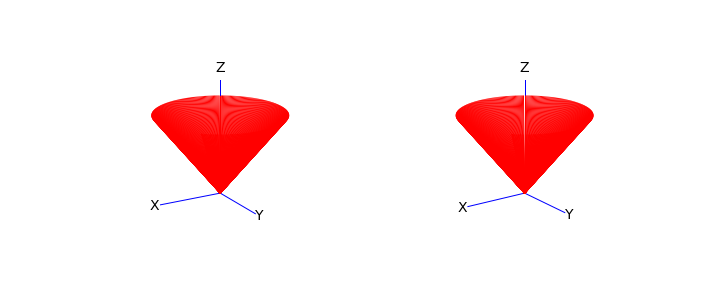
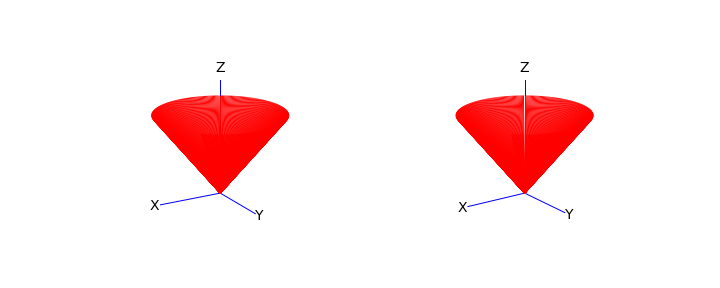
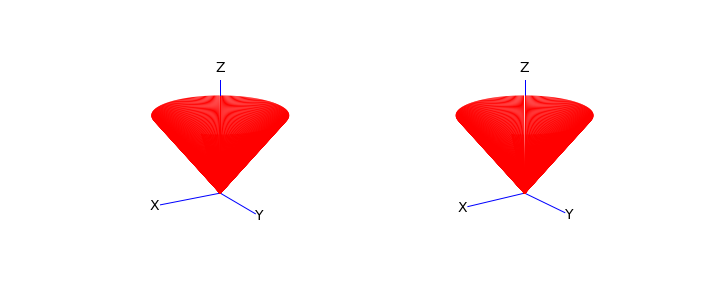
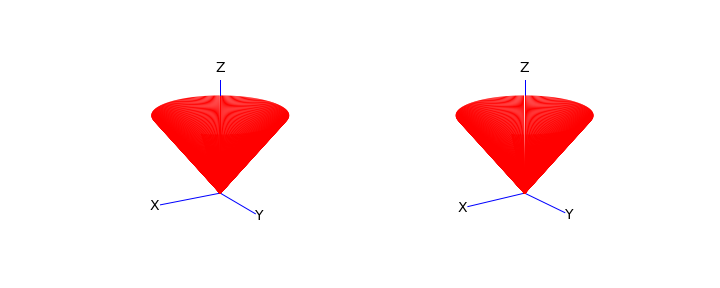
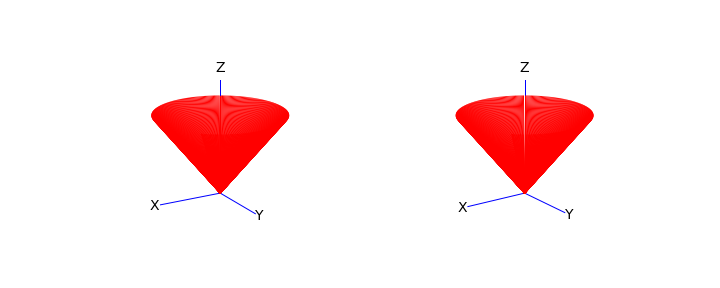
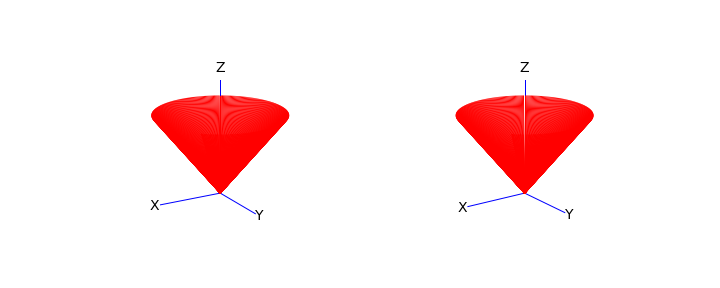
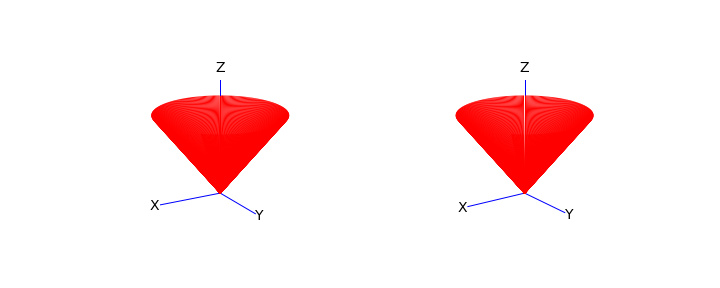
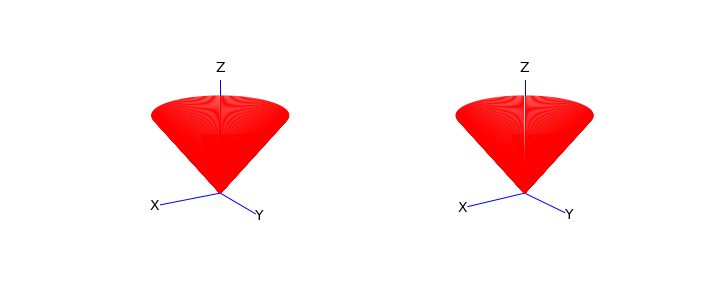
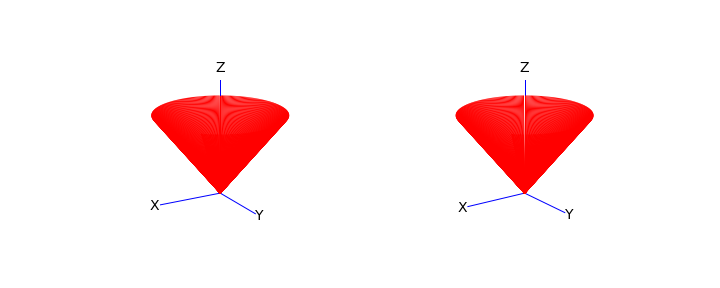
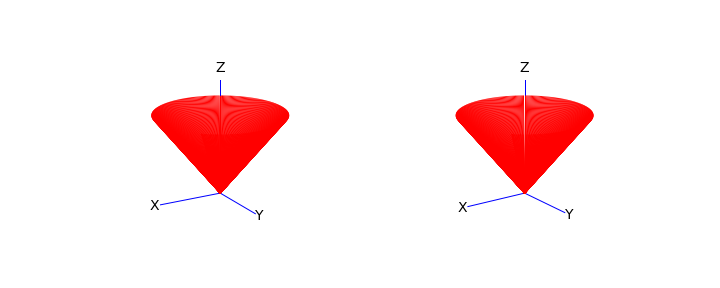
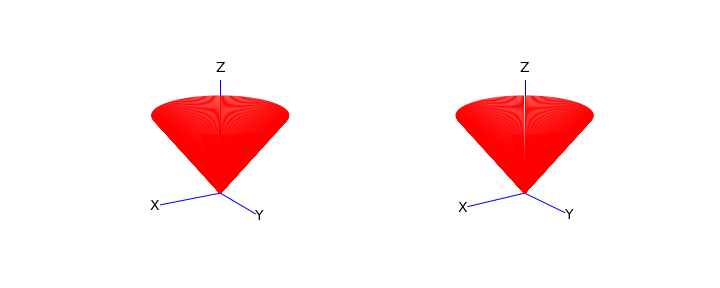
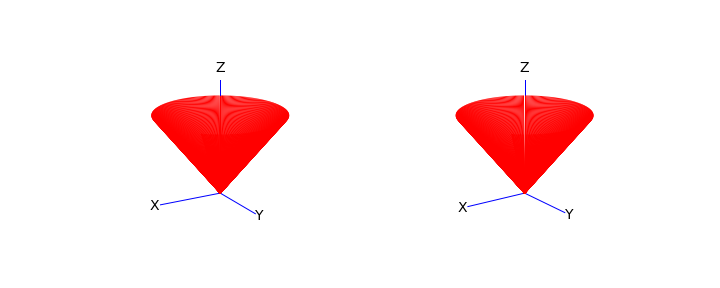
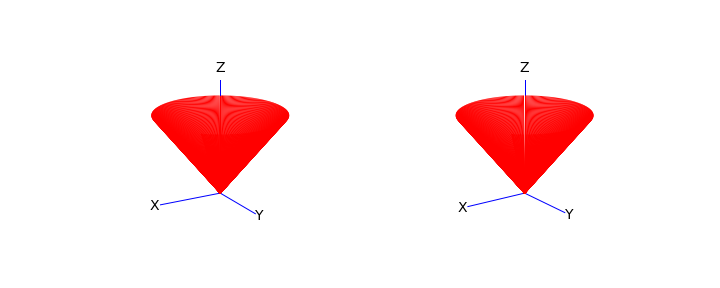
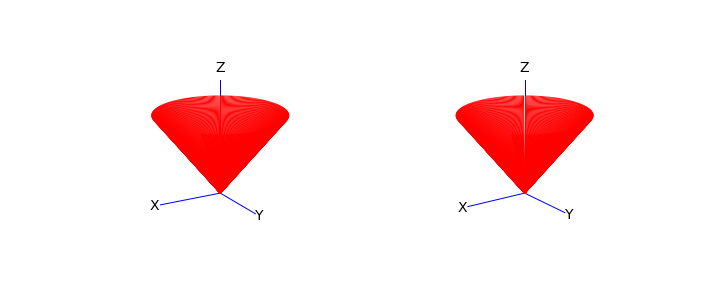
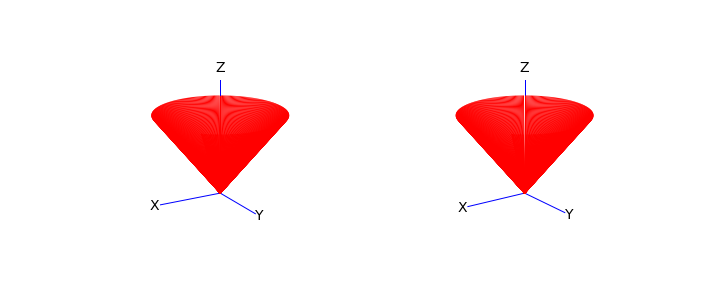
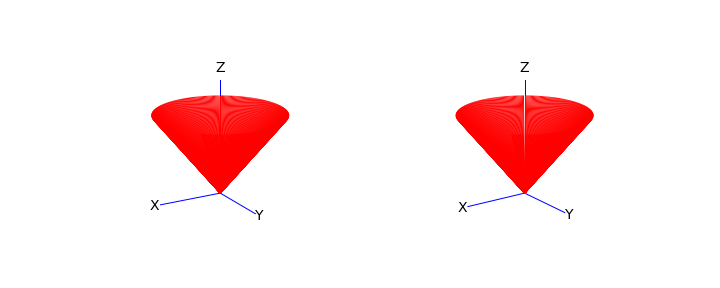
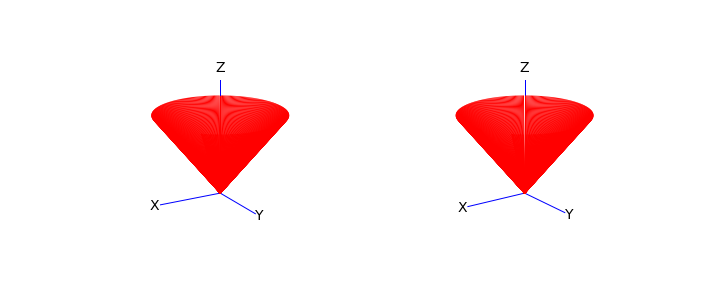
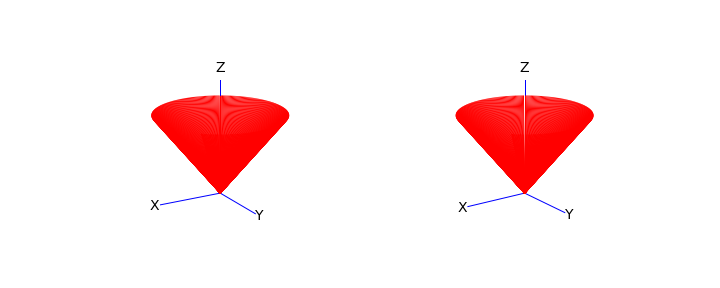
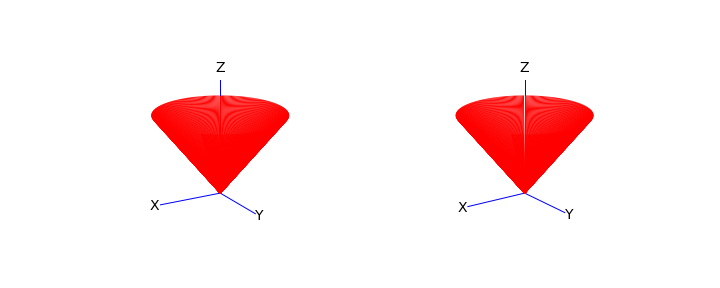
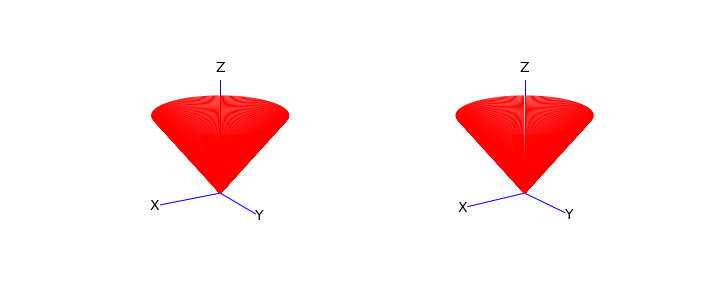
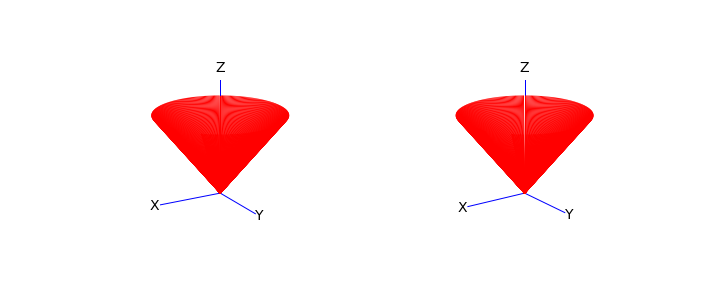
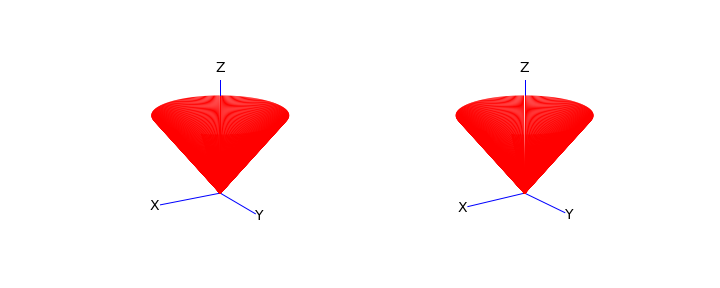
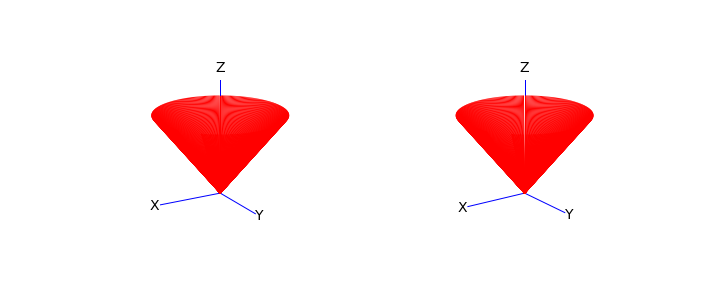
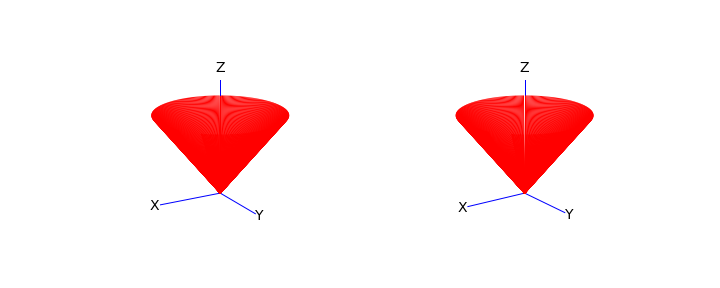
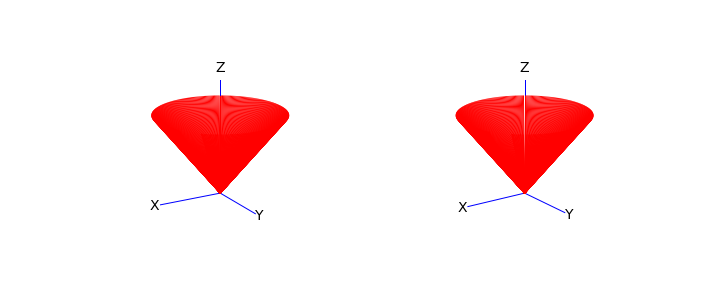
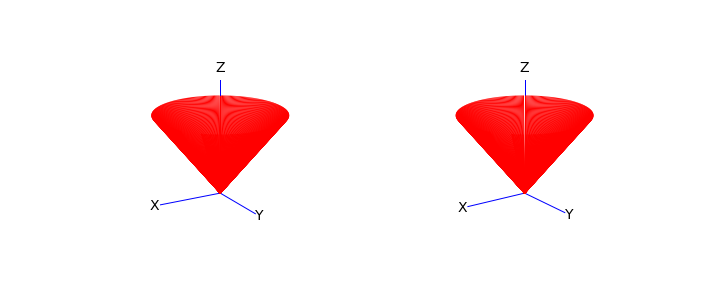
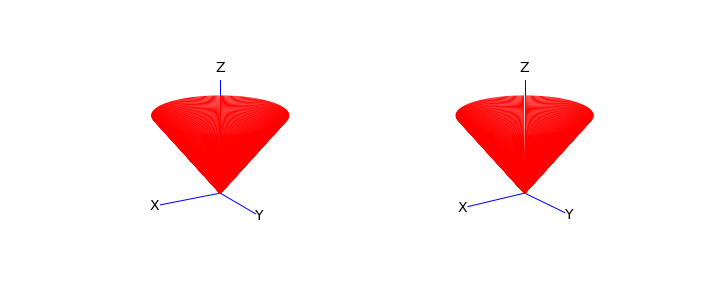
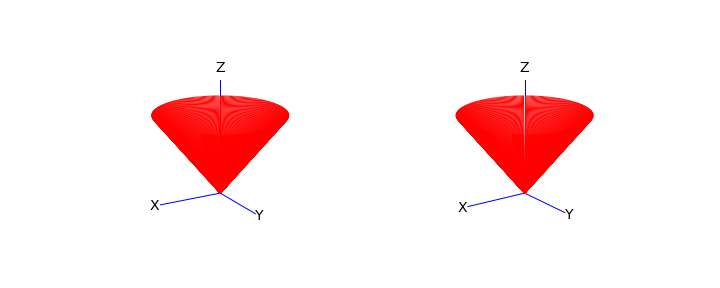
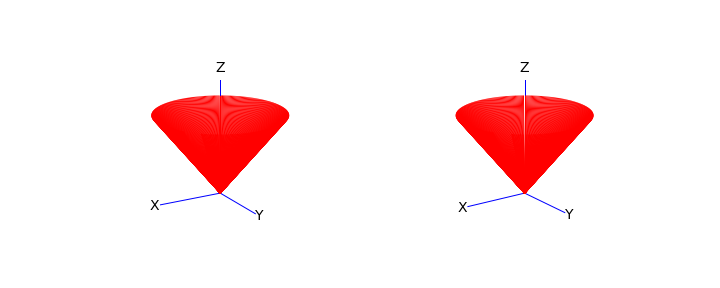
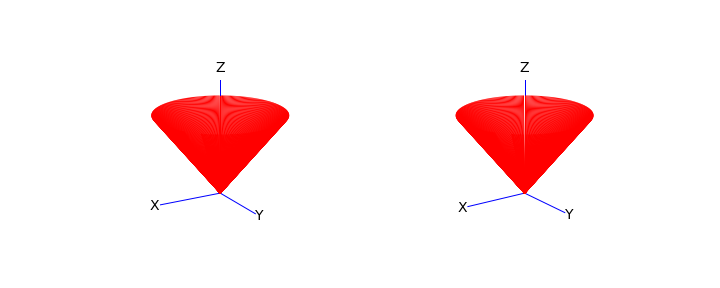
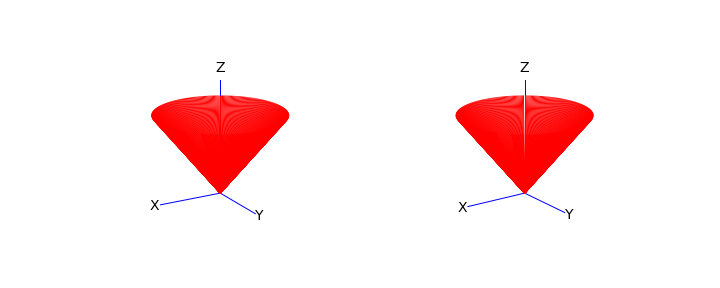
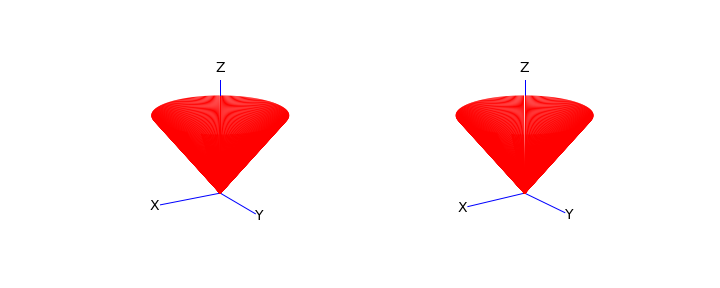
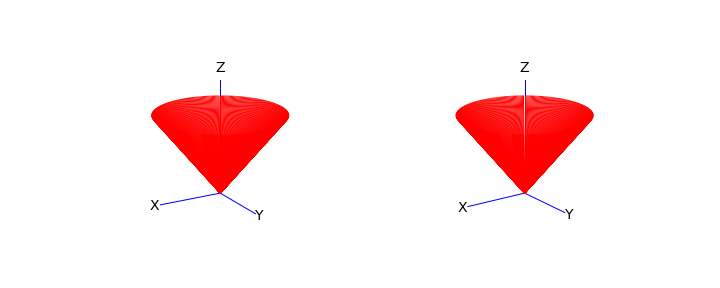
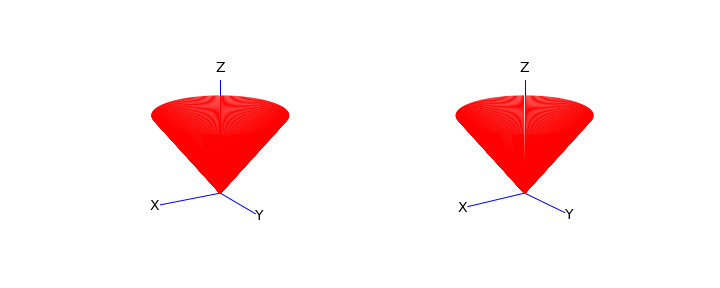
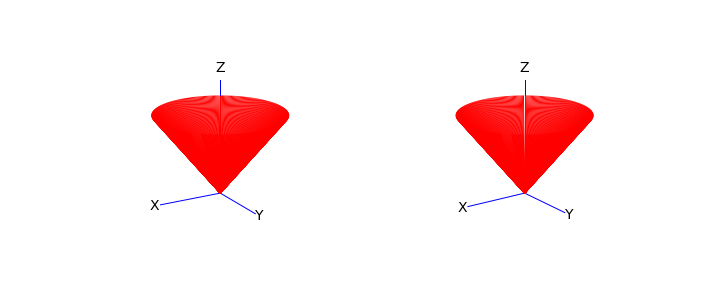
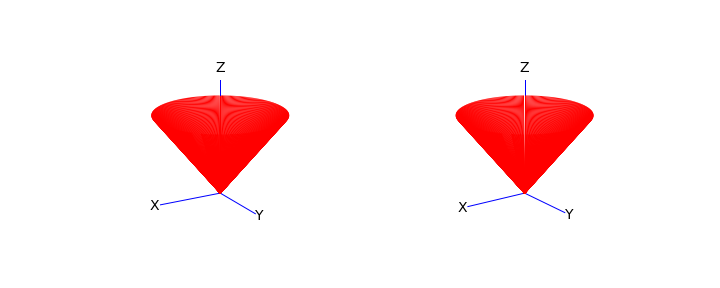
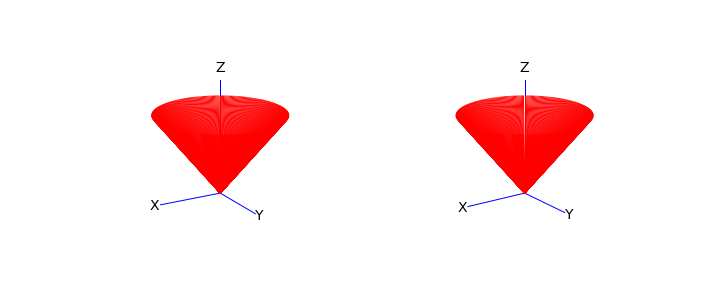
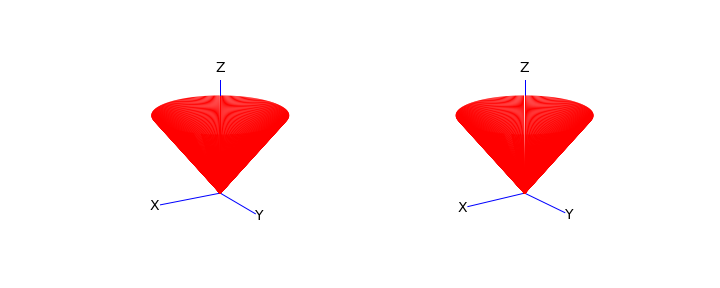
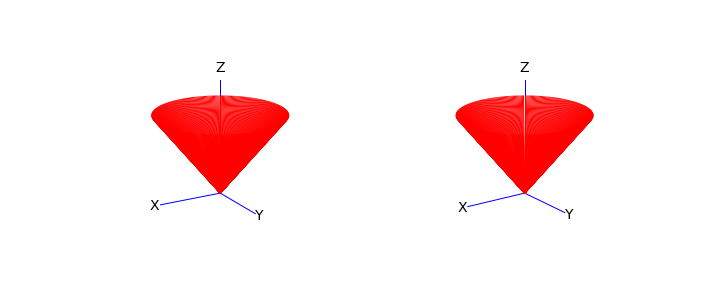
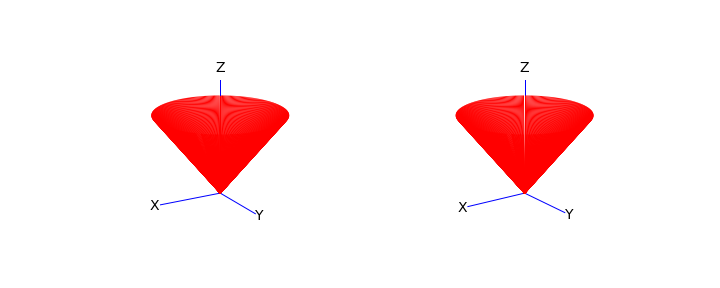
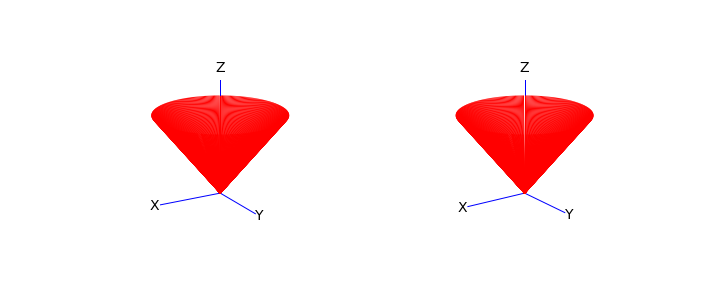
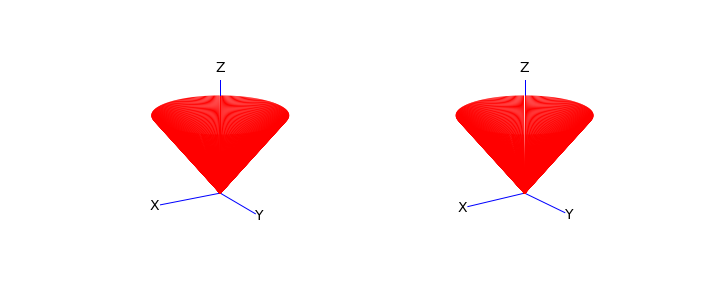
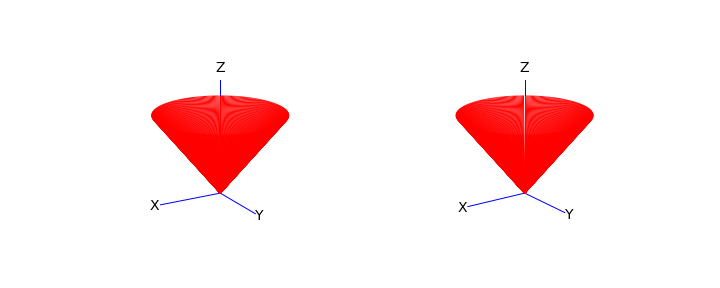

In [4]:
text_options = {'horizontalalignment': 'center',
                'verticalalignment': 'center',
                'fontsize': 14}

# produce figure
fig = plt.figure(figsize = (10,4), facecolor='none')
sp1 = fig.add_subplot(121, projection='3d', axisbg='none')
sp2 = fig.add_subplot(122, projection='3d', axisbg='none')
sp1.view_init(elev=20, azim=60)
sp1.axis('off')
sp2.view_init(elev=20, azim=55)
sp2.axis('off')
v1, = sp1.plot([0,sr[0]],[0,sr[1]],[0,sr[2]],'r')
v2, = sp2.plot([0,sr[0]],[0,sr[1]],[0,sr[2]],'r')

def p2(v,nam,clr):
    sp1.plot([0, v[0]], [0, v[1]], [0, v[2]], color=clr)
    sp2.plot([0, v[0]], [0, v[1]], [0, v[2]], color=clr)
    if nam:
        sp1.text(1.1*v[0],1.1*v[1],1.1*v[2],nam, **text_options)
        sp2.text(1.1*v[0],1.1*v[1],1.1*v[2],nam, **text_options)

p2(x0,'X','b')
p2(y0,'Y','b')
p2(z0,'Z','b')

p2(sun,'','r')

def update(i):
    psi = np.radians(i)
    sr = Rz(psi).dot(sun)
    p2(sr,'','r')
    x = ([0,sr[0]])
    y = ([0,sr[1]])
    z = ([0,sr[2]])
    v1.set_data(x, y)
    v2.set_data(x, y)

    return v1, v2,

FuncAnimation(fig, update, frames=359, interval=50)
